In [152]:
# House pricing data
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi
from matplotlib.dates import date2num
from datetime import datetime
import seaborn as sns
from scipy import stats
from numpy import log

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# housing data data
house_df = pd.read_csv('/Users/faisalhossain/PycharmProjects/Miami-ML/data/house_price_dataset.csv')
house_df.shape
house_df.head(5)

(1434, 279)

RegionID  SizeRank              RegionName    RegionType HouseType State  \
0    124381       134                 Flagami  Neighborhood     condo    FL   
1    269072       142           Little Havana  Neighborhood     condo    FL   
2    269228       190  Alameda - West Flagler  Neighborhood     condo    FL   
3    123423       220              Allapattah  Neighborhood     condo    FL   
4    268938       240               Coral Way  Neighborhood     condo    FL   

    City                                  Metro         CountyName   1/31/00  \
0  Miami  Miami-Fort Lauderdale-West Palm Beach  Miami-Dade County   75689.0   
1  Miami  Miami-Fort Lauderdale-West Palm Beach  Miami-Dade County   85415.0   
2  Miami  Miami-Fort Lauderdale-West Palm Beach  Miami-Dade County   95084.0   
3  Miami  Miami-Fort Lauderdale-West Palm Beach  Miami-Dade County  108714.0   
4  Miami  Miami-Fort Lauderdale-West Palm Beach  Miami-Dade County  122942.0   

   ...   9/30/21  10/31/21  11/30/21  12/31/21   1/31/22   2/28/22   3/31/22  \
0  ...  182571.0  185374.0  188026.0  190355.0  193537.0  196396.0  199930.0   
1  ...  186930.0  189428.0  192445.0  195758.0  199807.0  202847.0  206413.0   
2  ...  199807.0  203616.0  207055.0  210996.0  214659.0  217837.0  220257.0   
3  ...  174923.0  177794.0  180321.0  182751.0  186486.0  189622.0  193846.0   
4  ...  284164.0  289149.0  294029.0  299379.0  305622.0  310966.0  317094.0   

    4/30/22   5/31/22  6/30/22  
0  202928.0  208014.0   213124  
1  208877.0  213941.0   219143  
2  222513.0  227527.0   233381  
3  197279.0  203645.0   209279  
4  323029.0  332180.0   342727  

[5 rows x 279 columns]

In [3]:
# Dataset dimensions
house_df.shape
house_df.describe()

(1434, 279)

RegionID      SizeRank       1/31/00       2/29/00       3/31/00  \
count    1434.000000   1434.000000  9.750000e+02  9.790000e+02  9.800000e+02   
mean   410654.138075   7446.164575  1.665843e+05  1.671009e+05  1.678596e+05   
std    252744.798208   4639.830560  1.660228e+05  1.662585e+05  1.671387e+05   
min     12330.000000    134.000000  2.410600e+04  2.409600e+04  2.407200e+04   
25%    266406.000000   3646.000000  8.273850e+04  8.283650e+04  8.323325e+04   
50%    269208.000000   7007.000000  1.095810e+05  1.098690e+05  1.103890e+05   
75%    760907.000000  11329.000000  1.778125e+05  1.783490e+05  1.784095e+05   
max    764325.000000  17008.000000  1.479723e+06  1.468312e+06  1.463514e+06   

            4/30/00       5/31/00       6/30/00       7/31/00       8/31/00  \
count  9.800000e+02  9.800000e+02  9.800000e+02  9.800000e+02  9.800000e+02   
mean   1.694521e+05  1.710514e+05  1.725899e+05  1.741182e+05  1.757011e+05   
std    1.689669e+05  1.711935e+05  1.735398e+05  1.758052e+05  1.780679e+05   
min    2.420300e+04  2.459100e+04  2.511000e+04  2.542200e+04  2.558700e+04   
25%    8.368400e+04  8.450000e+04  8.496975e+04  8.544950e+04  8.603125e+04   
50%    1.115175e+05  1.122700e+05  1.130455e+05  1.139785e+05  1.146235e+05   
75%    1.795785e+05  1.805368e+05  1.826298e+05  1.839248e+05  1.856260e+05   
max    1.456677e+06  1.462292e+06  1.484469e+06  1.513984e+06  1.550255e+06   

       ...       9/30/21      10/31/21      11/30/21      12/31/21  \
count  ...  1.378000e+03  1.378000e+03  1.382000e+03  1.385000e+03   
mean   ...  6.351901e+05  6.496264e+05  6.621802e+05  6.758447e+05   
std    ...  1.149739e+06  1.162650e+06  1.173460e+06  1.195865e+06   
min    ...  6.856800e+04  7.050400e+04  7.235200e+04  7.395100e+04   
25%    ...  2.649842e+05  2.705458e+05  2.756050e+05  2.807230e+05   
50%    ...  3.674290e+05  3.753280e+05  3.827920e+05  3.902650e+05   
75%    ...  6.022265e+05  6.165435e+05  6.276475e+05  6.423380e+05   
max    ...  2.976444e+07  2.964720e+07  2.958977e+07  3.016698e+07   

            1/31/22       2/28/22       3/31/22       4/30/22       5/31/22  \
count  1.387000e+03  1.389000e+03  1.395000e+03  1.405000e+03  1.417000e+03   
mean   6.912290e+05  7.063412e+05  7.337796e+05  7.542926e+05  7.784152e+05   
std    1.219397e+06  1.250103e+06  1.314001e+06  1.350340e+06  1.396368e+06   
min    7.582700e+04  7.360500e+04  7.619500e+04  7.863100e+04  8.094100e+04   
25%    2.860105e+05  2.907120e+05  2.967860e+05  3.036850e+05  3.091580e+05   
50%    3.987450e+05  4.069640e+05  4.149470e+05  4.235920e+05  4.345750e+05   
75%    6.582175e+05  6.751810e+05  6.983465e+05  7.242610e+05  7.490270e+05   
max    3.061436e+07  3.154136e+07  3.269876e+07  3.393280e+07  3.527195e+07   

            6/30/22  
count  1.434000e+03  
mean   8.057913e+05  
std    1.449786e+06  
min    8.445200e+04  
25%    3.144568e+05  
50%    4.453765e+05  
75%    7.696048e+05  
max    3.645837e+07  

[8 rows x 272 columns]

single family home    374
3 bd                  296
2 bd                  250
condo                 172
4 bd                  160
1 bd                  124
5+ bd                  58
Name: HouseType, dtype: int64

single family home    26.1%
3 bd                  20.6%
2 bd                  17.4%
condo                 12.0%
4 bd                  11.2%
1 bd                   8.6%
5+ bd                  4.0%
Name: HouseType, dtype: object

<AxesSubplot: >

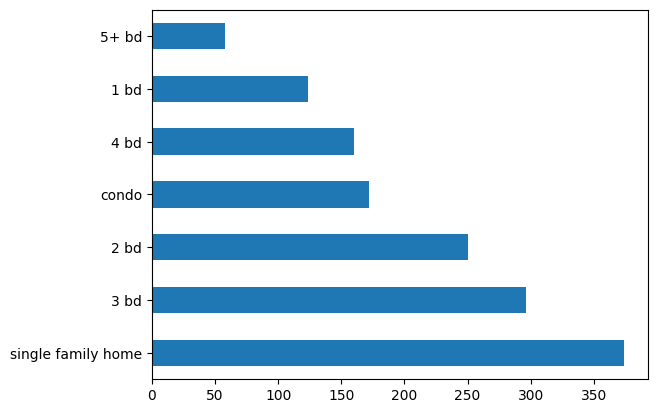

In [4]:
# Housing type distribution
house_df["HouseType"].value_counts()
house_df["HouseType"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
house_df["HouseType"].value_counts().plot(kind='barh')

['Miami',
 'North Miami',
 'Miami Beach',
 'Hollywood',
 'Boca Raton',
 'West Palm Beach',
 'Delray Beach',
 'Pompano Beach',
 'Fort Lauderdale',
 'North Miami Beach',
 'Coral Gables',
 'Plantation',
 'Lake Worth',
 'Miami Gardens',
 'Greenacres',
 'Oakland Park',
 'Jupiter',
 'Riviera Beach',
 'Cutler Bay',
 'Davie',
 'Boynton Beach']

Fort Lauderdale      296
Pompano Beach        124
West Palm Beach      119
Hollywood            116
Miami                108
Miami Gardens        103
Oakland Park          84
Greenacres            75
Miami Beach           73
Lake Worth            72
Jupiter               70
North Miami Beach     47
Boca Raton            38
Plantation            34
North Miami           30
Delray Beach          20
Riviera Beach          7
Cutler Bay             6
Coral Gables           5
Davie                  4
Boynton Beach          3
Name: City, dtype: int64

Fort Lauderdale      20.6%
Pompano Beach         8.6%
West Palm Beach       8.3%
Hollywood             8.1%
Miami                 7.5%
Miami Gardens         7.2%
Oakland Park          5.9%
Greenacres            5.2%
Miami Beach           5.1%
Lake Worth            5.0%
Jupiter               4.9%
North Miami Beach     3.3%
Boca Raton            2.6%
Plantation            2.4%
North Miami           2.1%
Delray Beach          1.4%
Riviera Beach         0.5%
Cutler Bay            0.4%
Coral Gables          0.3%
Davie                 0.3%
Boynton Beach         0.2%
Name: City, dtype: object

<AxesSubplot: >

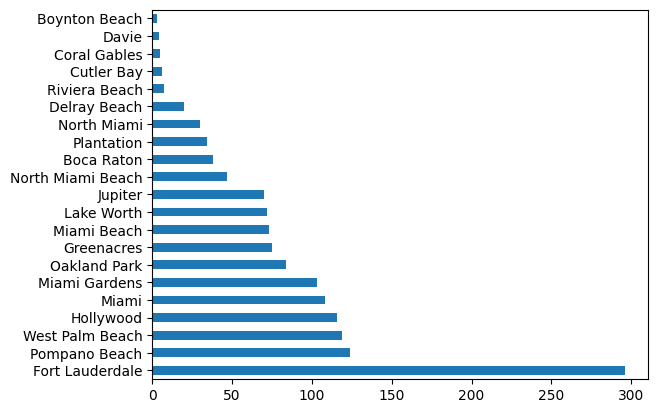

In [5]:
# City distribution
unique_city = list(dict(enumerate(house_df.City.unique())).values())
unique_city
house_df["City"].value_counts()
house_df["City"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
house_df["City"].value_counts().plot(kind='barh')

HouseType  Fort Lauderdale  Pompano Beach  Miami  Hollywood  \
0               condo               36           20.0     17         16   
1                1 bd               27           16.0     14         13   
2                2 bd               55           25.0     17         20   
3                3 bd               62           21.0     16         22   
4                4 bd               29           13.0     14         14   
5               5+ bd                8            0.0     13          4   
6  single family home               79           29.0     17         27   

   Oakland Park  Lake Worth  Miami Beach  Greenacres  West Palm Beach  ...  \
0          13.0        12.0           11           9                8  ...   
1           7.0         9.0           10           2                6  ...   
2          19.0        15.0            9          19               20  ...   
3          19.0        14.0           10          14               30  ...   
4           2.0         6.0            8           2               11  ...   
5           0.0         0.0            9           1                4  ...   
6          24.0        16.0           16          28               40  ...   

   Miami Gardens  North Miami Beach  Delray Beach  North Miami  Plantation  \
0              4                  4             3            3           3   
1              2                  4             3            3           3   
2             13                  9             3            5           4   
3             28                 11             4            6           7   
4             23                  6             1            5           7   
5              2                  1             1            2           3   
6             31                 12             5            6           7   

   Coral Gables  Davie  Cutler Bay  Riviera Beach  Boynton Beach  
0           1.0    1.0         1.0            1.0            0.0  
1           1.0    0.0         1.0            1.0            0.0  
2           1.0    1.0         1.0            1.0            0.0  
3           1.0    1.0         1.0            1.0            1.0  
4           0.0    0.0         1.0            1.0            1.0  
5           0.0    0.0         0.0            0.0            0.0  
6           1.0    1.0         1.0            2.0            1.0  

[7 rows x 22 columns]

<AxesSubplot: title={'center': 'City Composition'}, ylabel='HouseType'>

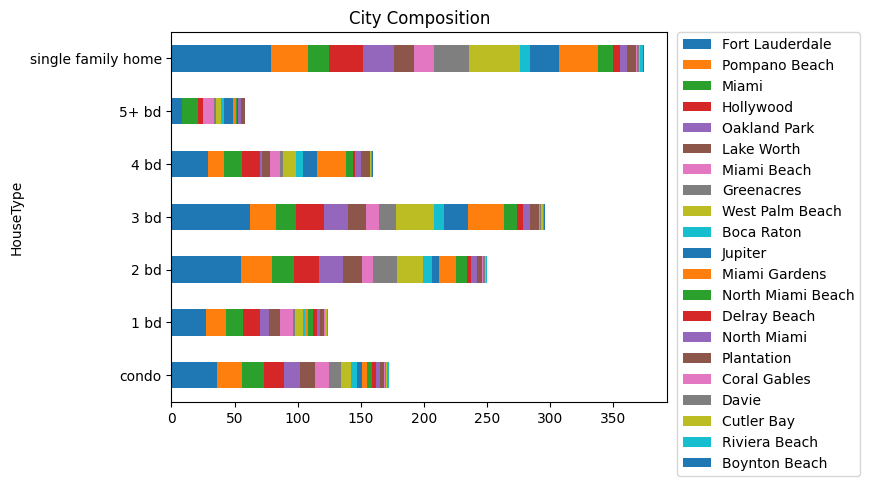

In [6]:
# City distribution - 2
home_df_city = pd.DataFrame(columns=['City', 'HouseType'])
home_df_city.City = house_df.City
home_df_city.HouseType = house_df.HouseType

houseTypes = ["condo", "1 bd", "2 bd", "3 bd", "4 bd", "5+ bd", "single family home"]

# Value count city in each home type
home_city_value_counts = pd.DataFrame()
for houseType in houseTypes:
    # Create value_count df
    houseType_value_counts = home_df_city[home_df_city.HouseType == houseType].value_counts()
    
    df = pd.DataFrame()
    df = houseType_value_counts.reset_index(name='counts')
    del df["HouseType"]
    
    # Tranpose
    df_t = df.set_index('City').T.reset_index()
    df_t = df_t.rename_axis(None, axis=1)
    df_t.columns.values[0] = "HouseType"
    df_t["HouseType"] = houseType
    
    # Merge
    home_city_value_counts = pd.concat([home_city_value_counts, df_t])

home_city_value_counts = home_city_value_counts.fillna(0).reset_index(drop=True)
home_city_value_counts

# Plot
home_city_value_counts.plot(x='HouseType', kind='barh', stacked=True, title='City Composition')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# home_city_value_counts.dfi.export("city-distribution.png")

In [7]:
# City distribution - 2 (as percentage)
home_df_city = pd.DataFrame(columns=['City', 'HouseType'])
home_df_city.City = house_df.City
home_df_city.HouseType = house_df.HouseType

houseTypes = ["condo", "1 bd", "2 bd", "3 bd", "4 bd", "5+ bd", "single family home"]

# Value count city in each home type
home_city_value_counts_percent = pd.DataFrame()
for houseType in houseTypes:
    # Create value_count df
    houseType_value_counts = home_df_city[home_df_city.HouseType == houseType].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    df = pd.DataFrame()
    df = houseType_value_counts.reset_index(name='counts')
    del df["HouseType"]
    
    # Tranpose
    df_t = df.set_index('City').T.reset_index()
    df_t = df_t.rename_axis(None, axis=1)
    df_t.columns.values[0] = "HouseType"
    df_t["HouseType"] = houseType
    
    # Merge
    home_city_value_counts_percent = pd.concat([home_city_value_counts_percent, df_t])

home_city_value_counts_percent = home_city_value_counts_percent.fillna("0%").reset_index(drop=True)
home_city_value_counts_percent

# home_city_value_counts_percent.dfi.export("city-distribution-percentage.png")
# home_city_value_counts_percent.to_csv("city-distribution-percentage.csv", encoding='utf-8')
# Todo: color scale the percentages by column (city)
# Note: because the histogram compares by whole where as color scale shows per city

HouseType Fort Lauderdale Pompano Beach  Miami Hollywood  \
0               condo           20.9%         11.6%   9.9%      9.3%   
1                1 bd           21.8%         12.9%  11.3%     10.5%   
2                2 bd           22.0%         10.0%   6.8%      8.0%   
3                3 bd           20.9%          7.1%   5.4%      7.4%   
4                4 bd           18.1%          8.1%   8.8%      8.8%   
5               5+ bd           13.8%            0%  22.4%      6.9%   
6  single family home           21.1%          7.8%   4.5%      7.2%   

  Oakland Park Lake Worth Miami Beach Greenacres West Palm Beach  ...  \
0         7.6%       7.0%        6.4%       5.2%            4.7%  ...   
1         5.6%       7.3%        8.1%       1.6%            4.8%  ...   
2         7.6%       6.0%        3.6%       7.6%            8.0%  ...   
3         6.4%       4.7%        3.4%       4.7%           10.1%  ...   
4         1.2%       3.8%        5.0%       1.2%            6.9%  ...   
5           0%         0%       15.5%       1.7%            6.9%  ...   
6         6.4%       4.3%        4.3%       7.5%           10.7%  ...   

  Miami Gardens North Miami Beach Delray Beach North Miami Plantation  \
0          2.3%              2.3%         1.7%        1.7%       1.7%   
1          1.6%              3.2%         2.4%        2.4%       2.4%   
2          5.2%              3.6%         1.2%        2.0%       1.6%   
3          9.5%              3.7%         1.4%        2.0%       2.4%   
4         14.4%              3.8%         0.6%        3.1%       4.4%   
5          3.4%              1.7%         1.7%        3.4%       5.2%   
6          8.3%              3.2%         1.3%        1.6%       1.9%   

  Coral Gables Davie Cutler Bay Riviera Beach Boynton Beach  
0         0.6%  0.6%       0.6%          0.6%            0%  
1         0.8%    0%       0.8%          0.8%            0%  
2         0.4%  0.4%       0.4%          0.4%            0%  
3         0.3%  0.3%       0.3%          0.3%          0.3%  
4           0%    0%       0.6%          0.6%          0.6%  
5           0%    0%         0%            0%            0%  
6         0.3%  0.3%       0.3%          0.5%          0.3%  

[7 rows x 22 columns]

City  condo  1 bd  2 bd  3 bd  4 bd  5+ bd  \
0     Fort Lauderdale   36.0  27.0  55.0  62.0  29.0    8.0   
1       Pompano Beach   20.0  16.0  25.0  21.0  13.0    0.0   
2               Miami   17.0  14.0  17.0  16.0  14.0   13.0   
3           Hollywood   16.0  13.0  20.0  22.0  14.0    4.0   
4        Oakland Park   13.0   7.0  19.0  19.0   2.0    0.0   
5          Lake Worth   12.0   9.0  15.0  14.0   6.0    0.0   
6         Miami Beach   11.0  10.0   9.0  10.0   8.0    9.0   
7          Greenacres    9.0   2.0  19.0  14.0   2.0    1.0   
8     West Palm Beach    8.0   6.0  20.0  30.0  11.0    4.0   
9          Boca Raton    5.0   2.0   7.0   8.0   5.0    3.0   
10            Jupiter    4.0   0.0   6.0  19.0  11.0    7.0   
11      Miami Gardens    4.0   2.0  13.0  28.0  23.0    2.0   
12  North Miami Beach    4.0   4.0   9.0  11.0   6.0    1.0   
13       Delray Beach    3.0   3.0   3.0   4.0   1.0    1.0   
14        North Miami    3.0   3.0   5.0   6.0   5.0    2.0   
15         Plantation    3.0   3.0   4.0   7.0   7.0    3.0   
16       Coral Gables    1.0   1.0   1.0   1.0   0.0    0.0   
17              Davie    1.0   0.0   1.0   1.0   0.0    0.0   
18         Cutler Bay    1.0   1.0   1.0   1.0   1.0    0.0   
19      Riviera Beach    1.0   1.0   1.0   1.0   1.0    0.0   
20      Boynton Beach    0.0   0.0   0.0   1.0   1.0    0.0   

    single family home  
0                 79.0  
1                 29.0  
2                 17.0  
3                 27.0  
4                 24.0  
5                 16.0  
6                 16.0  
7                 28.0  
8                 40.0  
9                  8.0  
10                23.0  
11                31.0  
12                12.0  
13                 5.0  
14                 6.0  
15                 7.0  
16                 1.0  
17                 1.0  
18                 1.0  
19                 2.0  
20                 1.0

<AxesSubplot: title={'center': 'City Composition'}, ylabel='City'>

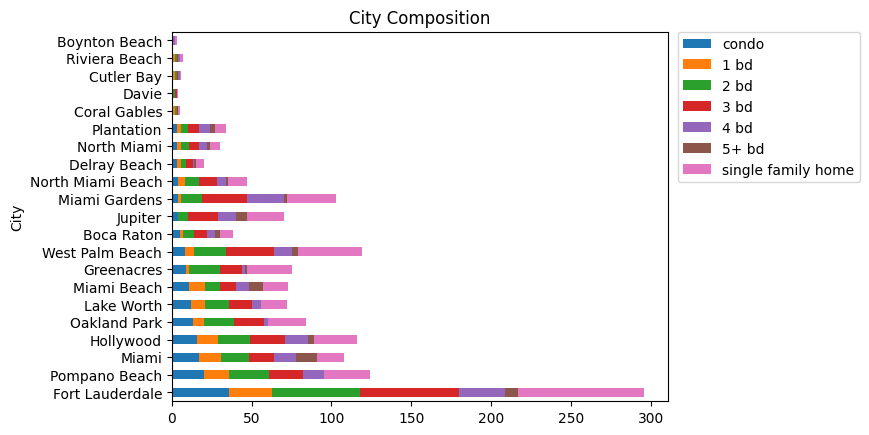

In [8]:
# # City distribution - 3 (fliped x and Y)
home_city_value_counts_t = home_city_value_counts.set_index('HouseType').T.reset_index()
home_city_value_counts_t = home_city_value_counts_t.rename_axis(None, axis=1)
home_city_value_counts_t.columns.values[0] = "City"

home_city_value_counts_t

home_city_value_counts_t.plot(x='City', kind='barh', stacked=True, title='City Composition')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

['Miami-Dade County', 'Broward County', 'Palm Beach County']

Broward County       658
Palm Beach County    404
Miami-Dade County    372
Name: CountyName, dtype: int64

Broward County       45.9%
Palm Beach County    28.2%
Miami-Dade County    25.9%
Name: CountyName, dtype: object

<AxesSubplot: >

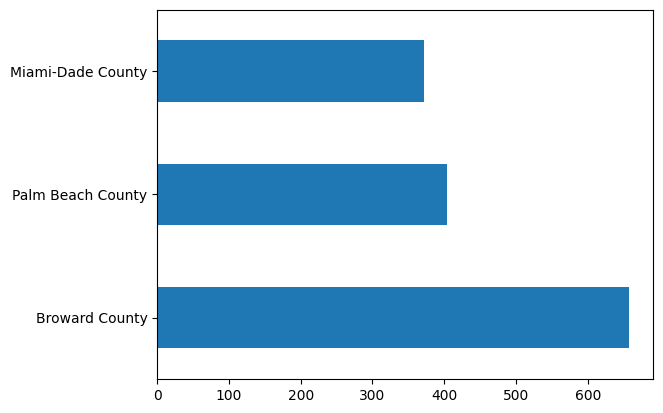

In [9]:
# County distribution
unique_county = list(dict(enumerate(house_df.CountyName.unique())).values())
unique_county
house_df["CountyName"].value_counts()
house_df["CountyName"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
house_df["CountyName"].value_counts().plot(kind='barh')

HouseType  Broward County  Palm Beach County  Miami-Dade County
0               condo              89                 42                 41
1                1 bd              66                 23                 35
2                2 bd             124                 71                 55
3                3 bd             132                 91                 73
4                4 bd              65                 38                 57
5               5+ bd              15                 16                 27
6  single family home             167                123                 84

<AxesSubplot: title={'center': 'County Distribution'}, ylabel='HouseType'>

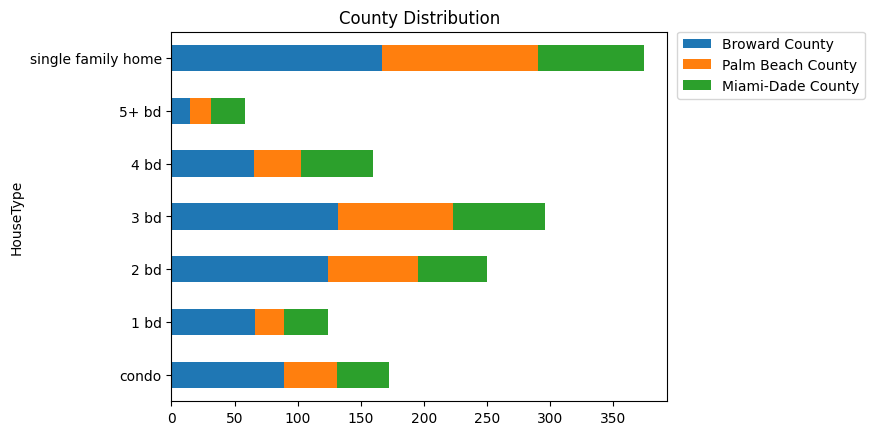

In [10]:
# County distribution - 2
home_df_county = pd.DataFrame(columns=['County', 'HouseType'])
home_df_county.County = house_df.CountyName
home_df_county.HouseType = house_df.HouseType

houseTypes = ["condo", "1 bd", "2 bd", "3 bd", "4 bd", "5+ bd", "single family home"]

# Value count county in each home type
home_county_value_counts = pd.DataFrame()
for houseType in houseTypes:
    # Create value_count df
    homeType_value_counts = home_df_county[home_df_county.HouseType == houseType].value_counts()
    
    df = pd.DataFrame()
    df = homeType_value_counts.reset_index(name='counts')
    del df["HouseType"]
    
    # Tranpose
    df_t = df.set_index('County').T.reset_index()
    df_t = df_t.rename_axis(None, axis=1)
    df_t.columns.values[0] = "HouseType"
    df_t["HouseType"] = houseType
    
    # Merge
    home_county_value_counts = pd.concat([home_county_value_counts, df_t])
    
home_county_value_counts = home_county_value_counts.fillna(0).reset_index(drop=True)
home_county_value_counts

# Plot
home_county_value_counts.plot(x='HouseType', kind='barh', stacked=True, title='County Distribution')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# home_county_value_counts.dfi.export("county-distribution.png")

County  condo  1 bd  2 bd  3 bd  4 bd  5+ bd  single family home
0     Broward County     89    66   124   132    65     15                 167
1  Palm Beach County     42    23    71    91    38     16                 123
2  Miami-Dade County     41    35    55    73    57     27                  84

<AxesSubplot: title={'center': 'County Distribution'}, ylabel='County'>

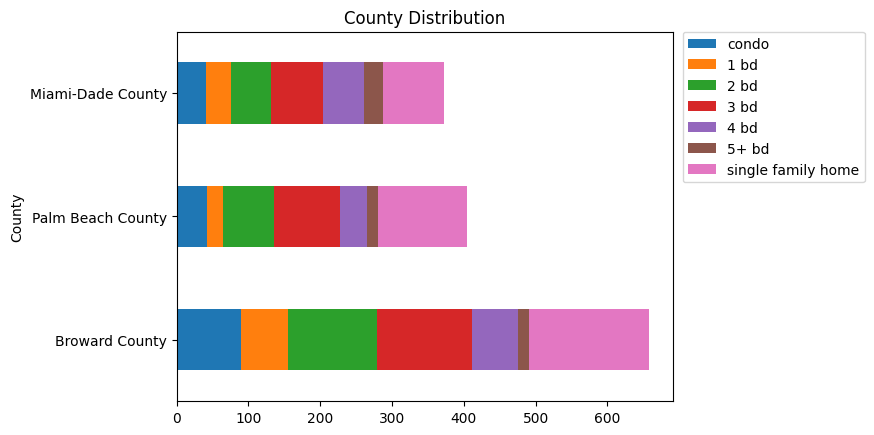

In [11]:
# County distribution 3 - Plot (fliped x and Y)
home_county_value_counts_t = home_county_value_counts.set_index('HouseType').T.reset_index()
home_county_value_counts_t = home_county_value_counts_t.rename_axis(None, axis=1)
home_county_value_counts_t.columns.values[0] = "County"

home_county_value_counts_t

home_county_value_counts_t.plot(x='County', kind='barh', stacked=True, title='County Distribution')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

In [12]:
# Region distribution
unique_region_name = list(dict(enumerate(house_df.RegionName.unique())).values())
print(len(unique_region_name))
unique_region_name

376


['Flagami',
 'Little Havana',
 'Alameda - West Flagler',
 'Allapattah',
 'Coral Way',
 'Central',
 'Little Haiti',
 'Brickell',
 'Liberty City',
 'Flamingo Lummus',
 'Hollywood Hills',
 'Wynwood - Edgewater',
 'Hollywood Lakes',
 'Sandalfoot Cove',
 'North Shore',
 'Villages of Palm Beach Lakes',
 'Downtown',
 'North Central',
 'Shenandoah',
 '441 Corridor',
 'Kings Point',
 'North-East Coconut Grove',
 'Oceanfront',
 'Palm Aire',
 'South Middle River',
 'Overtown',
 'Upper Eastside',
 'Highland Garden',
 'Water Catchment Area',
 'Cresthaven',
 'Emerald Hills',
 'South-West Coconut Grove',
 'Isle of Normandy',
 'Northwest Pompano',
 'Highlands',
 'City Center',
 'Park East',
 'Victoria Park',
 'North Ponce de Leon',
 'South Central Beach',
 'Imperial Point',
 'Plantation Park East',
 'Mirror Lake',
 'Lauderdale West',
 'Coral Ridge',
 'Coral Ridge Country Club',
 'Sunset Ridge',
 'Beach',
 'Walden',
 'Tropical Ridge',
 'Garden Isles',
 'Eastern Shores',
 'South Pointe',
 'Villages of O

In [13]:
# Region distribution - 2
house_df["RegionName"].value_counts()
house_df["RegionName"].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Downtown                20
Royal Poinciana         10
City Center             10
Lauderdale West          8
Country Club Estates     8
                        ..
South Flagler Drive      1
Villa Del Trio           1
Breakwater Surf          1
Sleepy River             1
Ritz Carlton             1
Name: RegionName, Length: 376, dtype: int64

Downtown                1.4%
Royal Poinciana         0.7%
City Center             0.7%
Lauderdale West         0.6%
Country Club Estates    0.6%
                        ... 
South Flagler Drive     0.1%
Villa Del Trio          0.1%
Breakwater Surf         0.1%
Sleepy River            0.1%
Ritz Carlton            0.1%
Name: RegionName, Length: 376, dtype: object

In [14]:
# Price df
house_prices_df = house_df.iloc[:,9:].reset_index(drop=True)
one_bd_price_df = house_df.loc[house_df['HouseType'] == "1 bd"].iloc[:,9:].reset_index(drop=True)
two_bd_price_df = house_df.loc[house_df['HouseType'] == "2 bd"].iloc[:,9:].reset_index(drop=True)
three_bd_price_df = house_df.loc[house_df['HouseType'] == "3 bd"].iloc[:,9:].reset_index(drop=True)
four_bd_price_df = house_df.loc[house_df['HouseType'] == "4 bd"].iloc[:,9:].reset_index(drop=True)
five_plus_bd_price_df = house_df.loc[house_df['HouseType'] == "5+ bd"].iloc[:,9:].reset_index(drop=True)
condo_price_df = house_df.loc[house_df['HouseType'] == "condo"].iloc[:,9:].reset_index(drop=True)
single_family_home_price_df = house_df.loc[house_df['HouseType'] == "single family home"].iloc[:,9:].reset_index(drop=True)

house_prices_df.shape
one_bd_price_df.shape
two_bd_price_df.shape
three_bd_price_df.shape
four_bd_price_df.shape
five_plus_bd_price_df.shape
condo_price_df.shape
single_family_home_price_df.shape

(1434, 270)

(124, 270)

(250, 270)

(296, 270)

(160, 270)

(58, 270)

(172, 270)

(374, 270)

In [15]:
house_prices_df.head(5)

1/31/00   2/29/00   3/31/00   4/30/00   5/31/00   6/30/00   7/31/00  \
0   75689.0   76063.0   76690.0   77655.0   78405.0   79056.0   79595.0   
1   85415.0   85603.0   85886.0   86331.0   86751.0   87277.0   87343.0   
2   95084.0   95268.0   95417.0   95860.0   96294.0   97137.0   97671.0   
3  108714.0  108565.0  108081.0  107949.0  107051.0  106962.0  106217.0   
4  122942.0  123113.0  122901.0  122840.0  122568.0  123147.0  123644.0   

    8/31/00   9/30/00  10/31/00  ...   9/30/21  10/31/21  11/30/21  12/31/21  \
0   80099.0   80341.0   80600.0  ...  182571.0  185374.0  188026.0  190355.0   
1   87229.0   86676.0   86887.0  ...  186930.0  189428.0  192445.0  195758.0   
2   98014.0   97868.0   97803.0  ...  199807.0  203616.0  207055.0  210996.0   
3  105962.0  105361.0  105426.0  ...  174923.0  177794.0  180321.0  182751.0   
4  124298.0  124538.0  125426.0  ...  284164.0  289149.0  294029.0  299379.0   

    1/31/22   2/28/22   3/31/22   4/30/22   5/31/22  6/30/22  
0  193537.0  196396.0  199930.0  202928.0  208014.0   213124  
1  199807.0  202847.0  206413.0  208877.0  213941.0   219143  
2  214659.0  217837.0  220257.0  222513.0  227527.0   233381  
3  186486.0  189622.0  193846.0  197279.0  203645.0   209279  
4  305622.0  310966.0  317094.0  323029.0  332180.0   342727  

[5 rows x 270 columns]

In [16]:
# House Price Tranposed
house_prices_df_T = house_prices_df.T.reset_index()
house_prices_df_T.columns = house_prices_df_T.columns.astype(str)
house_prices_df_T = house_prices_df_T.rename_axis(None, axis=1)
house_prices_df_T.columns.values[0] = "Date"
house_prices_df_T.Date = pd.to_datetime(house_prices_df_T.Date, format='%m/%d/%y')

house_prices_df_T.head(5)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
house_prices_df_T.describe()

Date        0        1        2         3         4        5   6  \
0 2000-01-31  75689.0  85415.0  95084.0  108714.0  122942.0  49521.0 NaN   
1 2000-02-29  76063.0  85603.0  95268.0  108565.0  123113.0  49703.0 NaN   
2 2000-03-31  76690.0  85886.0  95417.0  108081.0  122901.0  49833.0 NaN   
3 2000-04-30  77655.0  86331.0  95860.0  107949.0  122840.0  49993.0 NaN   
4 2000-05-31  78405.0  86751.0  96294.0  107051.0  122568.0  50169.0 NaN   

          7   8  ...  1424  1425  1426  1427  1428  1429  1430      1431  \
0  214705.0 NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN  652558.0   
1  215467.0 NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN  659562.0   
2  216207.0 NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN  664520.0   
3  217773.0 NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN  669414.0   
4  219102.0 NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN  670789.0   

       1432  1433  
0  698320.0   NaN  
1  701483.0   NaN  
2  702443.0   NaN  
3  701378.0   NaN  
4  701216.0   NaN  

[5 rows x 1435 columns]

0         1         2         3         4         5         6  \
count    270.00    270.00    270.00    270.00    270.00    269.00    136.00   
mean  136248.74 146804.73 157187.10 154221.68 216252.27  91629.11  75297.21   
std    40929.60  43888.85  47188.51  57990.97  54597.88  31614.19  29549.06   
min    75689.00  83571.00  87959.00  75304.00 122568.00  49521.00  39000.00   
25%    99677.75 106210.75 114905.75 114748.75 162567.50  63319.00  50038.50   
50%   132501.50 146814.50 154808.50 147731.50 230170.00  86846.00  71768.50   
75%   162648.50 171841.00 182693.25 171355.00 259455.75 110506.00  89654.25   
max   219015.00 234281.00 254645.00 290682.00 342727.00 158841.00 157633.00   

              7         8         9  ...       1424       1425       1426  \
count    270.00    161.00    270.00  ...      37.00     173.00      23.00   
mean  380594.28  80746.96 240384.29  ...  912747.78 2884832.84 4450294.00   
std    81092.90  43808.82  55905.39  ...  216988.82  649086.42  541392.19   
min   214705.00  33789.00 119272.00  ...  743218.00 2013683.00 3750244.00   
25%   315029.50  44022.00 201447.25  ...  757125.00 2270770.00 4002467.00   
50%   394821.50  62961.00 247593.50  ...  801521.00 2913225.00 4328762.00   
75%   436505.75 114412.00 276565.75  ... 1002194.00 3246353.00 4830515.50   
max   540868.00 204043.00 356629.00  ... 1471601.00 4966794.00 5522970.00   

            1427        1428        1429       1430       1431       1432  \
count      81.00        4.00       19.00      13.00     270.00     270.00   
mean  1386629.89 10975917.75  9748569.89 8674219.69  966228.37 1039926.10   
std    272477.04   420681.50  1076308.50  650608.84  174114.98  185890.41   
min   1168495.00 10517511.00  8176107.00 7661766.00  652558.00  698320.00   
25%   1218325.00 10703141.25  8853196.00 8207400.00  877826.75  955376.75   
50%   1305047.00 10956926.00  9679820.00 8641309.00  974910.50 1034682.00   
75%   1377588.00 11229702.50 10768857.50 9151661.00 1026168.00 1096806.75   
max   2369091.00 11472308.00 11468763.00 9742720.00 1889180.00 2034164.00   

            1433  
count     141.00  
mean  2269395.79  
std    508988.41  
min   1550500.00  
25%   1898927.00  
50%   2320962.00  
75%   2496485.00  
max   4062203.00  

[8 rows x 1434 columns]

In [125]:
# Price df - with house type
len_df = len(house_df.columns)
house_prices_df = house_df.iloc[:,np.r_[4,9:len_df]].reset_index(drop=True)
house_prices_df
one_bd_price_df = house_prices_df[house_prices_df['HouseType'] == "1 bd"].reset_index(drop=True)
two_bd_price_df = house_prices_df[house_prices_df['HouseType'] == "2 bd"].reset_index(drop=True)
three_bd_price_df = house_prices_df[house_prices_df['HouseType'] == "3 bd"].reset_index(drop=True)
four_bd_price_df = house_prices_df[house_prices_df['HouseType'] == "4 bd"].reset_index(drop=True)
five_plus_bd_price_df = house_prices_df[house_prices_df['HouseType'] == "5+ bd"].reset_index(drop=True)
condo_price_df = house_prices_df[house_prices_df['HouseType'] == "condo"].reset_index(drop=True)
single_family_home_price_df = house_prices_df[house_prices_df['HouseType'] == "single family home"].reset_index(drop=True)

# Prepare data
house_prices_df_melted = pd.melt(house_prices_df, id_vars=['HouseType'], var_name=['Date'])
house_prices_df_melted.columns = ["HouseType","Date", "Price"]
house_prices_df_melted.Date = pd.to_datetime(house_prices_df_melted.Date, format='%m/%d/%y')
house_prices_df_melted['Year'] = [d.year for d in house_prices_df_melted.Date] 
house_prices_df_melted

years = house_prices_df_melted.Year.unique()
houseTypes = house_prices_df_melted.HouseType.unique()

# Remove outliers per year
house_prices_df_melted_clean = pd.DataFrame()

for year in years:
    year_filtered_df = house_prices_df_melted[house_prices_df_melted.Year == year]
    year_filtered_df = year_filtered_df.dropna()
    
    q_low = year_filtered_df["Price"].quantile(0.01)
    q_hi  = year_filtered_df["Price"].quantile(0.99)
    year_filtered_df = year_filtered_df[(year_filtered_df["Price"] < q_hi) & (year_filtered_df["Price"] > q_low)]
    
    house_prices_df_melted_clean = pd.concat([house_prices_df_melted_clean, year_filtered_df], ignore_index=True)
    
house_prices_df_melted_clean


HouseType   1/31/00   2/29/00   3/31/00   4/30/00   5/31/00   6/30/00  \
0        condo  75689.00  76063.00  76690.00  77655.00  78405.00  79056.00   
1        condo  85415.00  85603.00  85886.00  86331.00  86751.00  87277.00   
2        condo  95084.00  95268.00  95417.00  95860.00  96294.00  97137.00   
3        condo 108714.00 108565.00 108081.00 107949.00 107051.00 106962.00   
4        condo 122942.00 123113.00 122901.00 122840.00 122568.00 123147.00   
...        ...       ...       ...       ...       ...       ...       ...   
1429     5+ bd       NaN       NaN       NaN       NaN       NaN       NaN   
1430     5+ bd       NaN       NaN       NaN       NaN       NaN       NaN   
1431     5+ bd 652558.00 659562.00 664520.00 669414.00 670789.00 668747.00   
1432     5+ bd 698320.00 701483.00 702443.00 701378.00 701216.00 701616.00   
1433     5+ bd       NaN       NaN       NaN       NaN       NaN       NaN   

       7/31/00   8/31/00   9/30/00  ...    9/30/21   10/31/21    11/30/21  \
0     79595.00  80099.00  80341.00  ...  182571.00  185374.00   188026.00   
1     87343.00  87229.00  86676.00  ...  186930.00  189428.00   192445.00   
2     97671.00  98014.00  97868.00  ...  199807.00  203616.00   207055.00   
3    106217.00 105962.00 105361.00  ...  174923.00  177794.00   180321.00   
4    123644.00 124298.00 124538.00  ...  284164.00  289149.00   294029.00   
...        ...       ...       ...  ...        ...        ...         ...   
1429       NaN       NaN       NaN  ... 9679820.00 9959366.00 10171138.00   
1430       NaN       NaN       NaN  ... 8207400.00 8357568.00  8520446.00   
1431 673174.00 672761.00 673548.00  ... 1299859.00 1355327.00  1412558.00   
1432 705322.00 706924.00 709602.00  ... 1394482.00 1444873.00  1495757.00   
1433       NaN       NaN       NaN  ... 3100075.00 3187583.00  3270254.00   

        12/31/21     1/31/22     2/28/22     3/31/22     4/30/22     5/31/22  \
0      190355.00   193537.00   196396.00   199930.00   202928.00   208014.00   
1      195758.00   199807.00   202847.00   206413.00   208877.00   213941.00   
2      210996.00   214659.00   217837.00   220257.00   222513.00   227527.00   
3      182751.00   186486.00   189622.00   193846.00   197279.00   203645.00   
4      299379.00   305622.00   310966.00   317094.00   323029.00   332180.00   
...          ...         ...         ...         ...         ...         ...   
1429 10403311.00 10648391.00 10889324.00 10971896.00 10994753.00 11156463.00   
1430  8641309.00  8825088.00  8951990.00  9151661.00  9277452.00  9555436.00   
1431  1464832.00  1493607.00  1524557.00  1591969.00  1686545.00  1800381.00   
1432  1550874.00  1597293.00  1645086.00  1721376.00  1812937.00  1930108.00   
1433  3349771.00  3428132.00  3510008.00  3645342.00  3773837.00  3941770.00   

       6/30/22  
0       213124  
1       219143  
2       233381  
3       209279  
4       342727  
...        ...  
1429  11468763  
1430   9742720  
1431   1889180  
1432   2034164  
1433   4062203  

[1434 rows x 271 columns]

HouseType       Date       Price  Year
0          condo 2000-01-31    75689.00  2000
1          condo 2000-01-31    85415.00  2000
2          condo 2000-01-31    95084.00  2000
3          condo 2000-01-31   108714.00  2000
4          condo 2000-01-31   122942.00  2000
...          ...        ...         ...   ...
387175     5+ bd 2022-06-30 11468763.00  2022
387176     5+ bd 2022-06-30  9742720.00  2022
387177     5+ bd 2022-06-30  1889180.00  2022
387178     5+ bd 2022-06-30  2034164.00  2022
387179     5+ bd 2022-06-30  4062203.00  2022

[387180 rows x 4 columns]

HouseType       Date      Price  Year
0          condo 2000-01-31   75689.00  2000
1          condo 2000-01-31   85415.00  2000
2          condo 2000-01-31   95084.00  2000
3          condo 2000-01-31  108714.00  2000
4          condo 2000-01-31  122942.00  2000
...          ...        ...        ...   ...
308119     5+ bd 2022-06-30 5522970.00  2022
308120     5+ bd 2022-06-30 2369091.00  2022
308121     5+ bd 2022-06-30 1889180.00  2022
308122     5+ bd 2022-06-30 2034164.00  2022
308123     5+ bd 2022-06-30 4062203.00  2022

[308124 rows x 4 columns]

<AxesSubplot: xlabel='Year', ylabel='Price'>

Text(0.5, 1.0, 'Year-wise Box Plot\n(The Trend)')

[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020'),
 Text(21, 0, '2021'),
 Text(22, 0, '2022')]

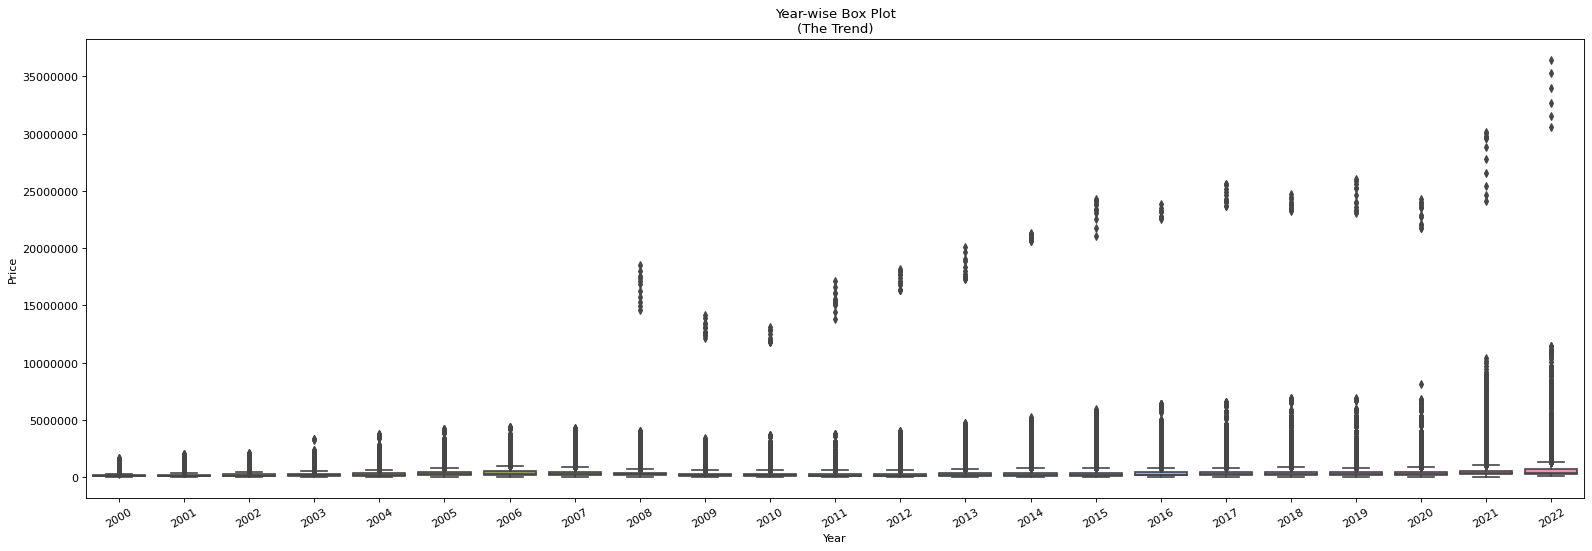

In [120]:
# Box Plots
fig, axes = plt.subplots(1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Price', data=house_prices_df_melted)

# Set Title
axes.set_title('Year-wise Box Plot\n(The Trend)')
axes.set_xticklabels(axes.get_xticklabels(),rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<AxesSubplot: xlabel='Year', ylabel='Price'>

Text(0.5, 1.0, 'Year-wise Box Plot\n(The Trend) - Outliers Removed')

[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020'),
 Text(21, 0, '2021'),
 Text(22, 0, '2022')]

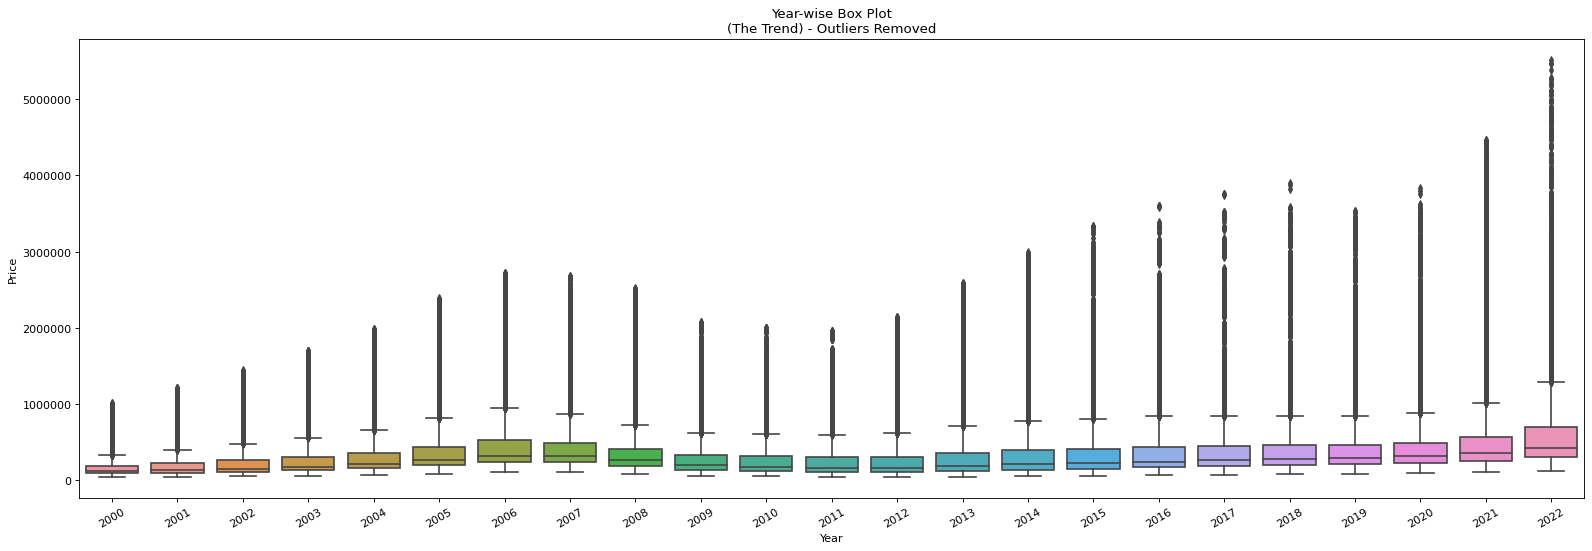

In [123]:
# Box Plots - outliers removed
fig, axes = plt.subplots(1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Price', data=house_prices_df_melted_clean)

# Set Title
axes.set_title('Year-wise Box Plot\n(The Trend) - Outliers Removed')
axes.set_xticklabels(axes.get_xticklabels(),rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0.5, 1.0, 'Year-wise Box Plot\n(The Trend) - Outliers Removed')

[Text(0, 0, '2000'),
 Text(1, 0, '2001'),
 Text(2, 0, '2002'),
 Text(3, 0, '2003'),
 Text(4, 0, '2004'),
 Text(5, 0, '2005'),
 Text(6, 0, '2006'),
 Text(7, 0, '2007'),
 Text(8, 0, '2008'),
 Text(9, 0, '2009'),
 Text(10, 0, '2010'),
 Text(11, 0, '2011'),
 Text(12, 0, '2012'),
 Text(13, 0, '2013'),
 Text(14, 0, '2014'),
 Text(15, 0, '2015'),
 Text(16, 0, '2016'),
 Text(17, 0, '2017'),
 Text(18, 0, '2018'),
 Text(19, 0, '2019'),
 Text(20, 0, '2020'),
 Text(21, 0, '2021'),
 Text(22, 0, '2022')]

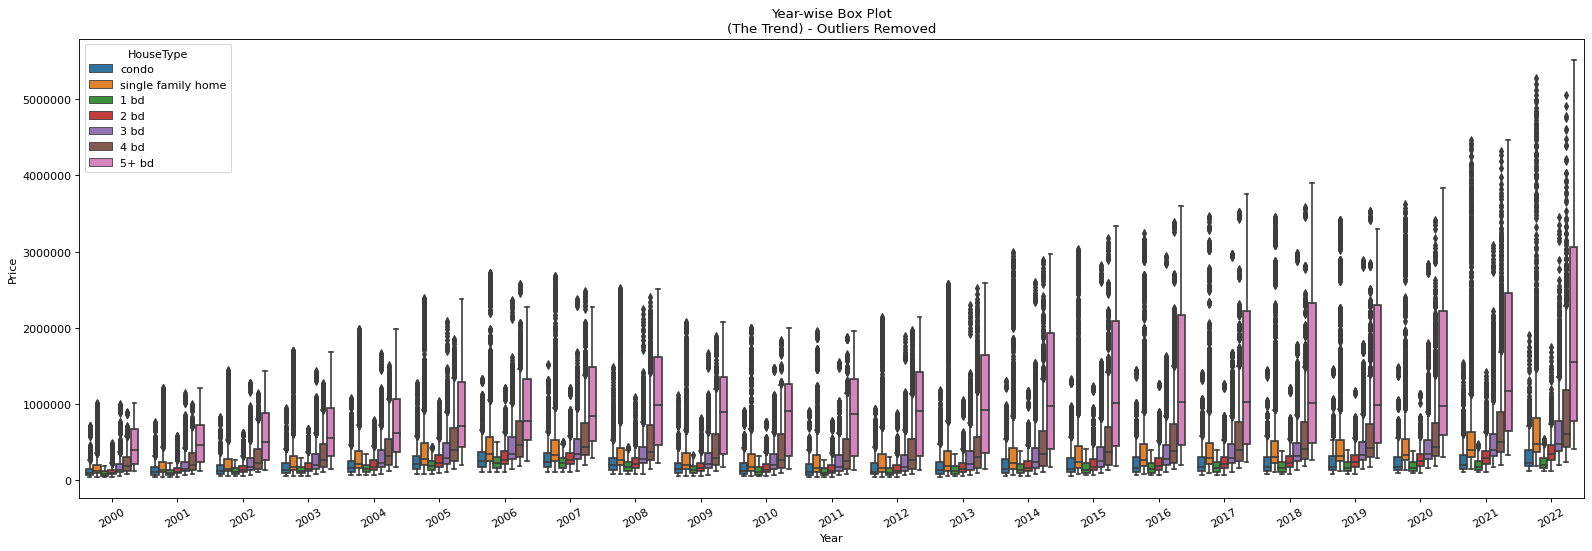

In [124]:
# Boxplot per year, by house type
fig, axes = plt.subplots(1, figsize=(20,7), dpi= 80)
ax = sns.boxplot(x="Year", y="Price", hue="HouseType", data=house_prices_df_melted_clean)

# Set Title
axes.set_title('Year-wise Box Plot\n(The Trend) - Outliers Removed')
axes.set_xticklabels(axes.get_xticklabels(),rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2000\nOutliers Removed')

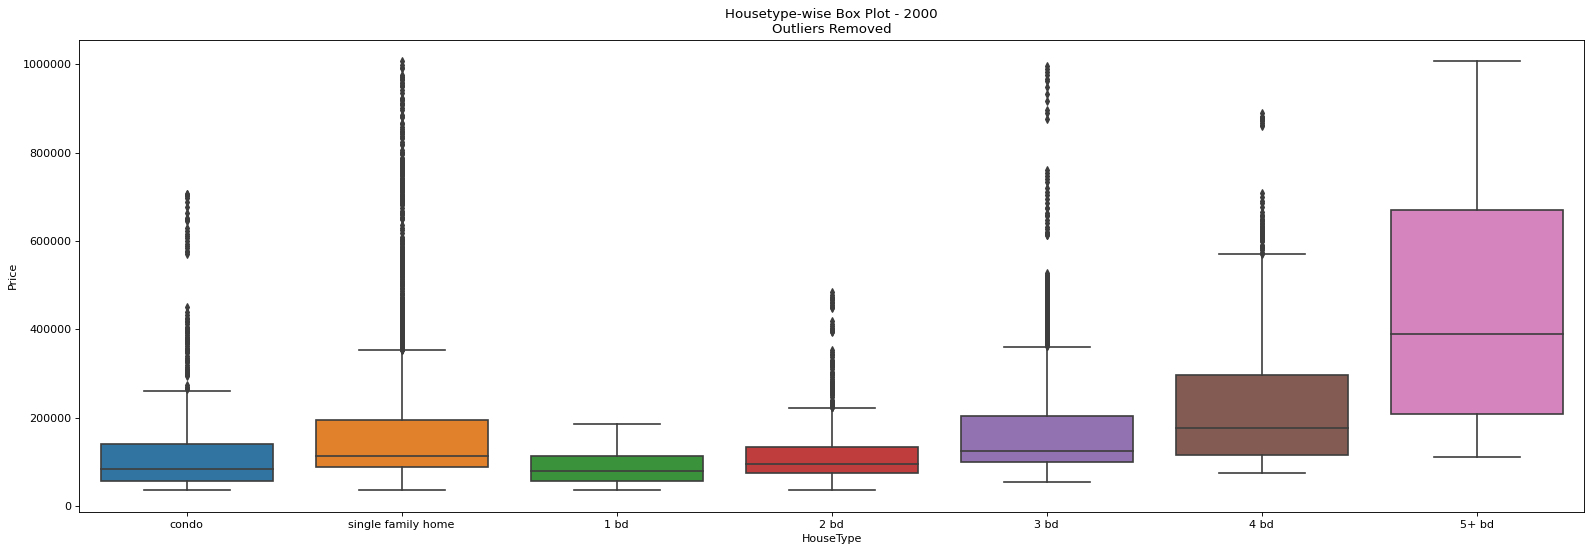

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2001\nOutliers Removed')

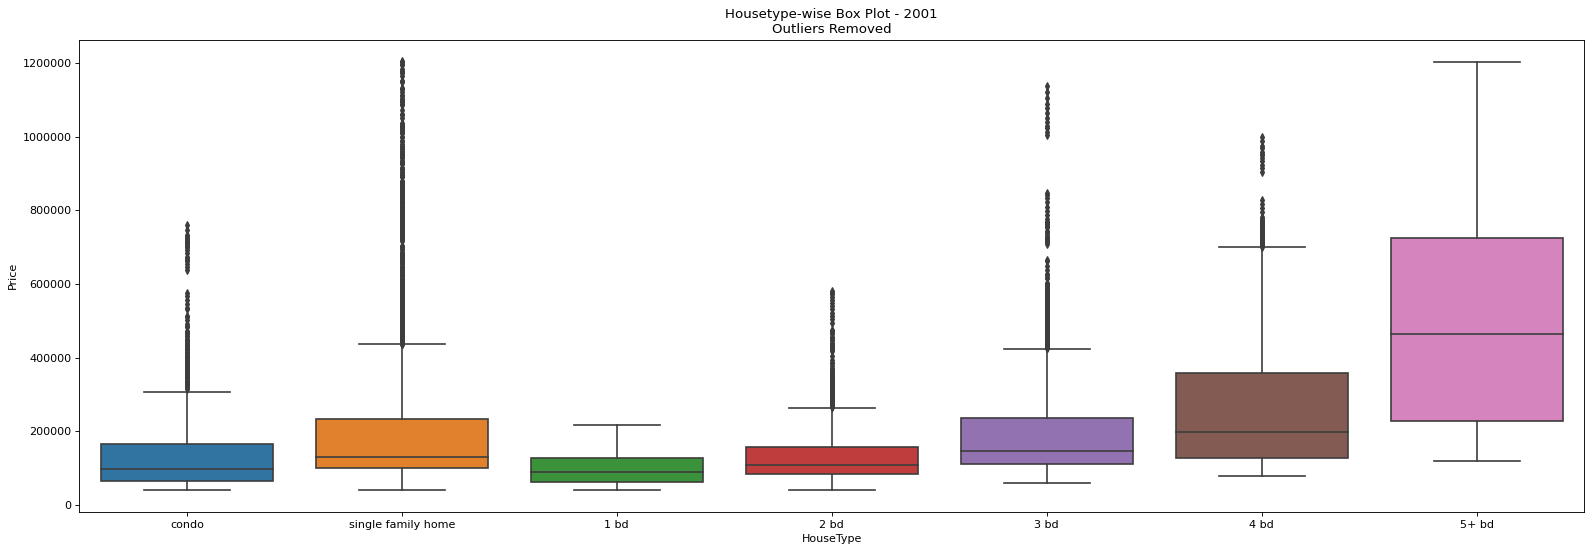

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2002\nOutliers Removed')

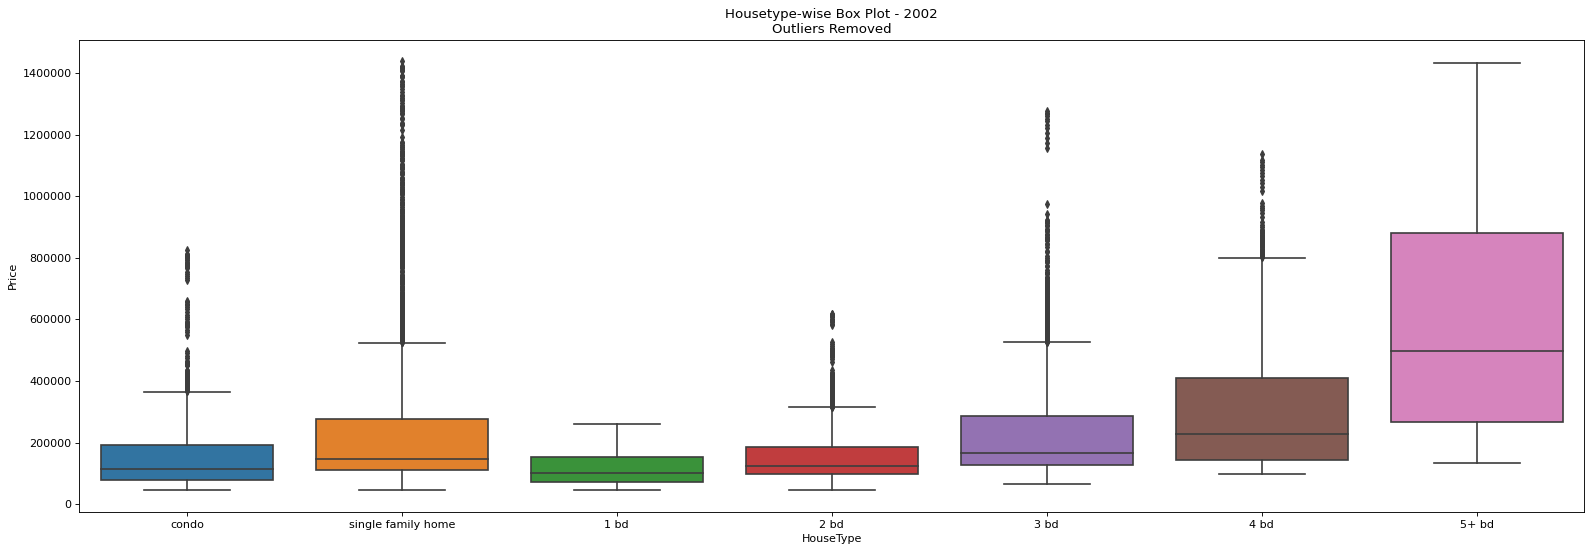

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2003\nOutliers Removed')

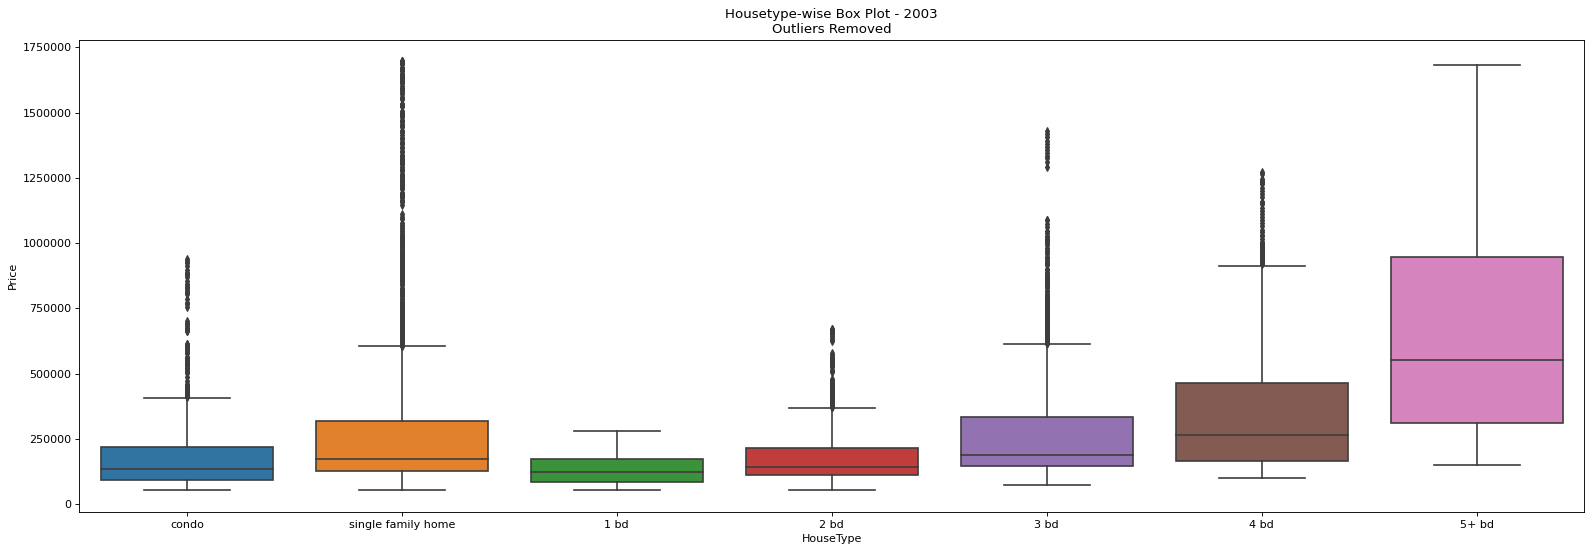

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2004\nOutliers Removed')

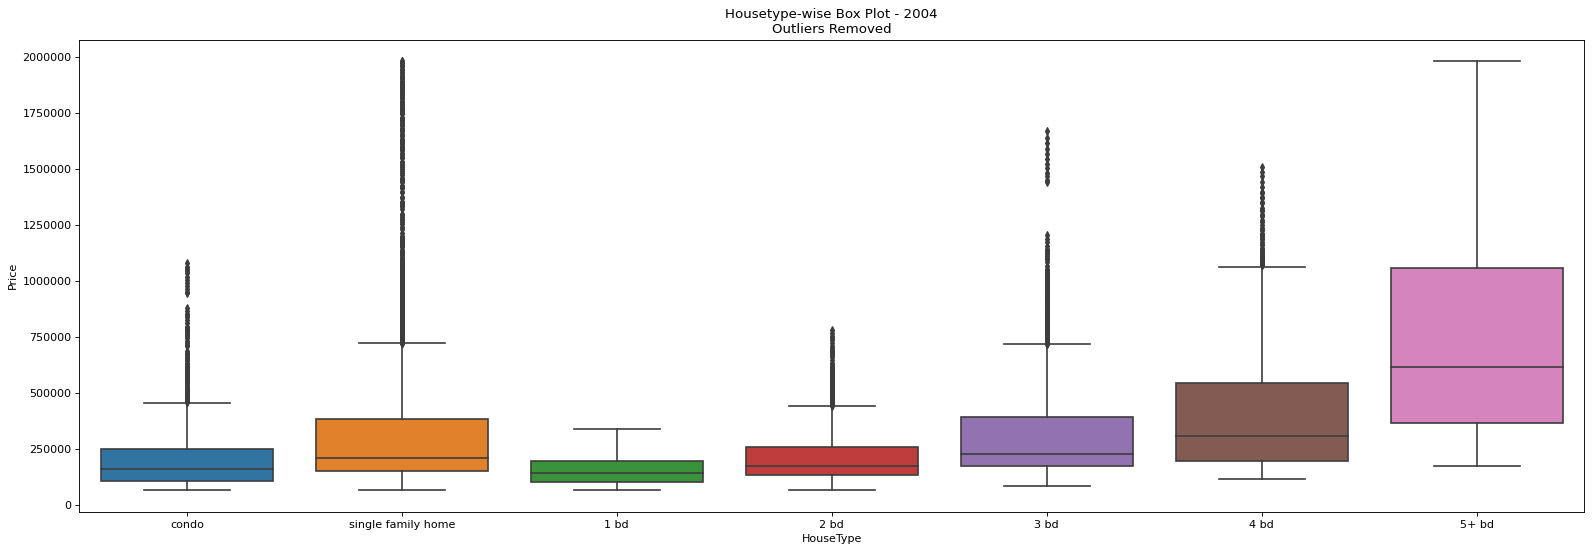

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2005\nOutliers Removed')

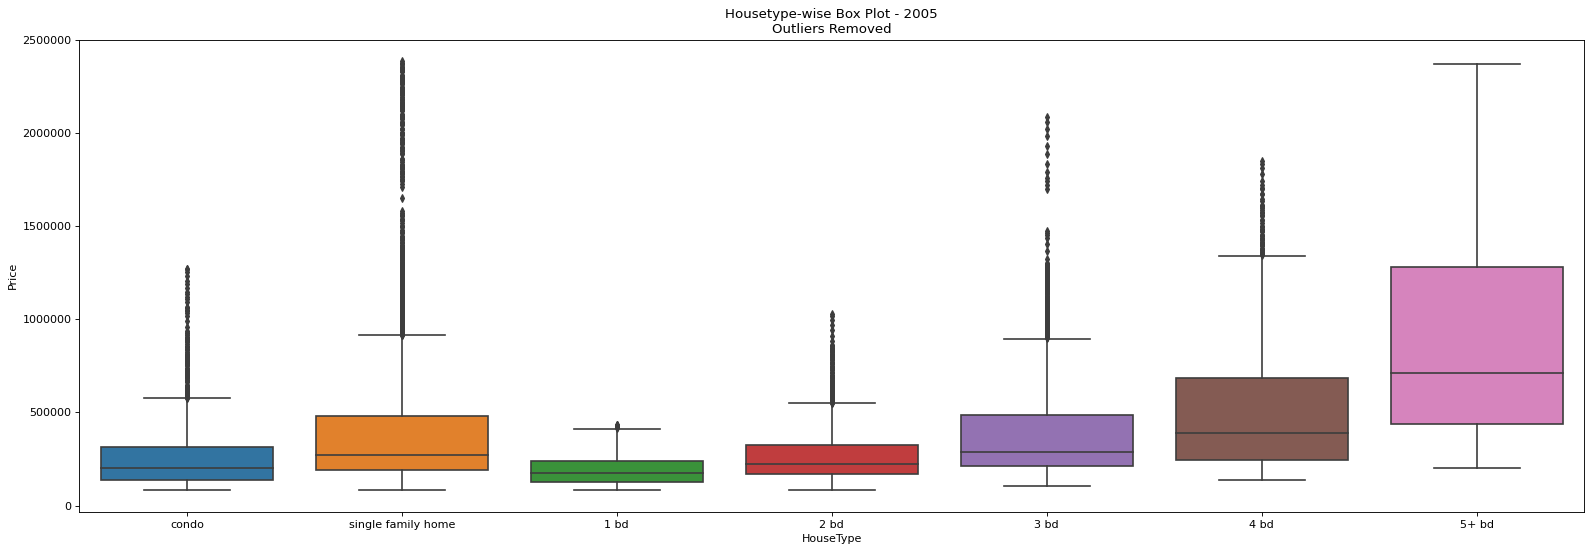

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2006\nOutliers Removed')

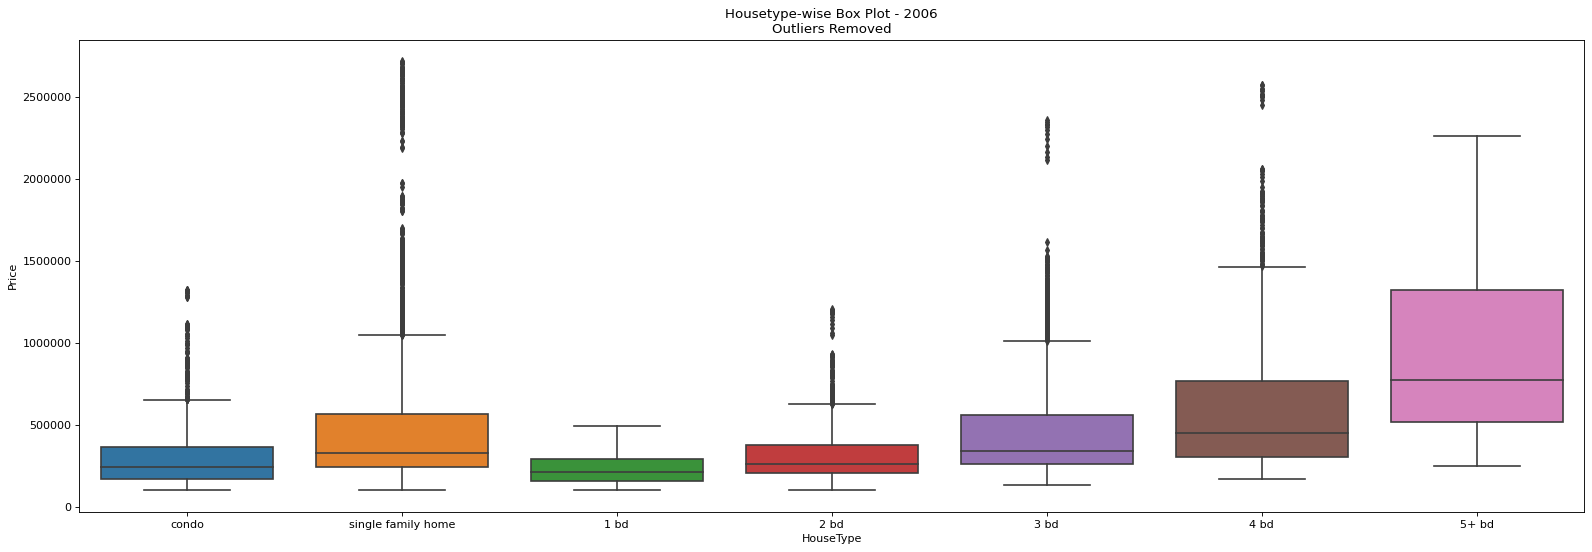

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2007\nOutliers Removed')

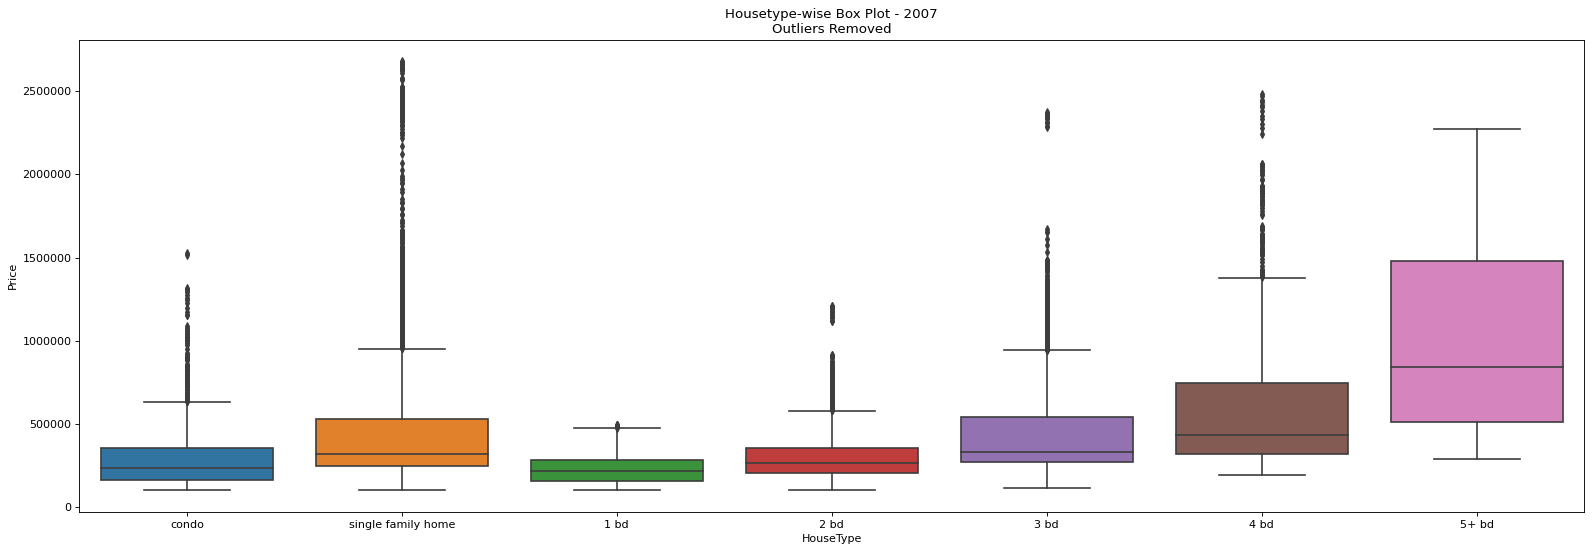

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2008\nOutliers Removed')

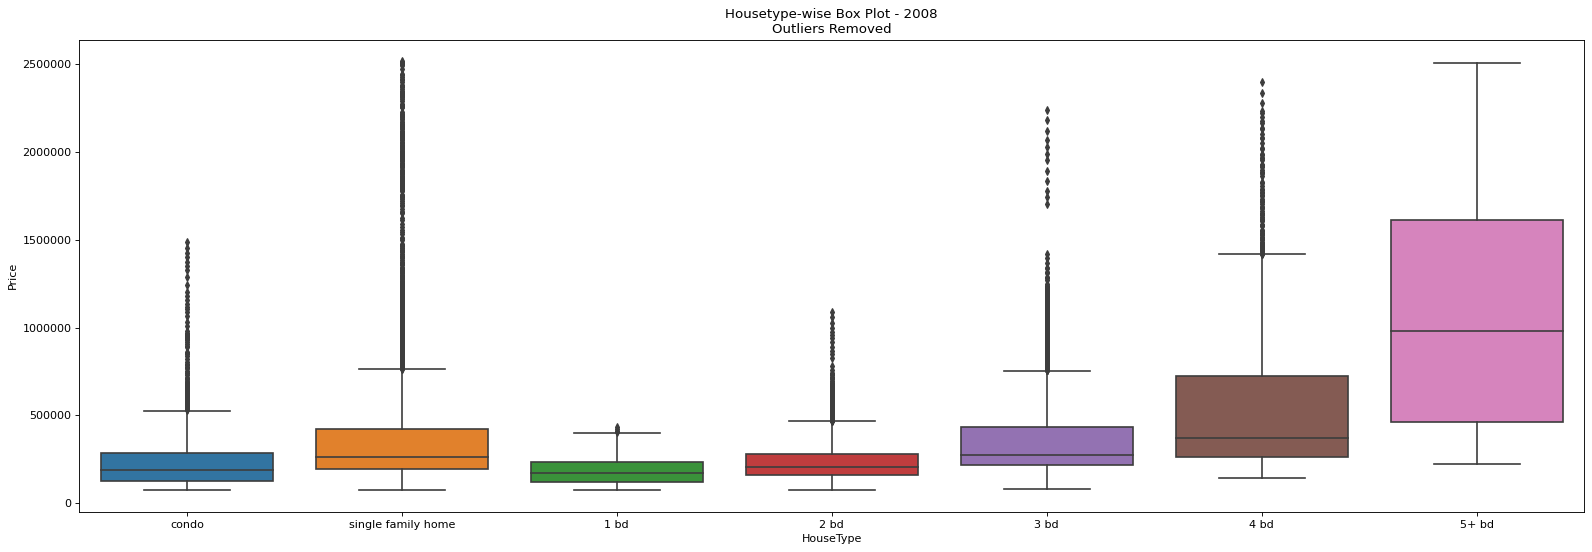

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2009\nOutliers Removed')

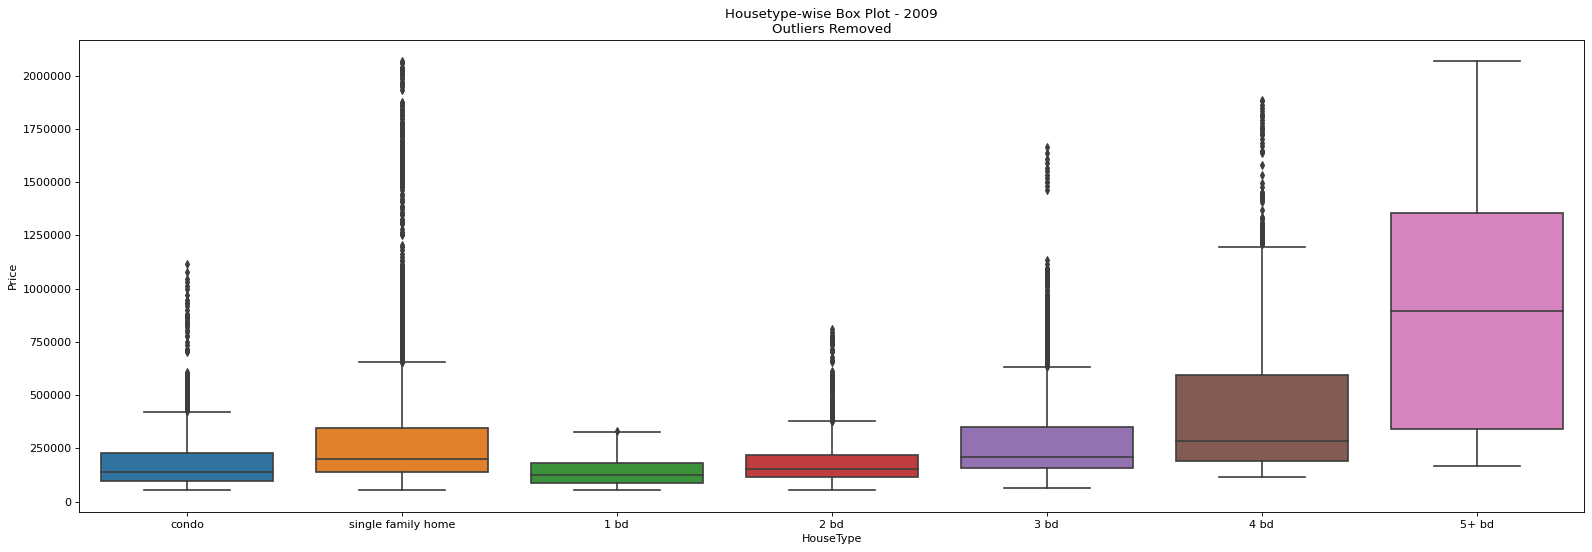

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2010\nOutliers Removed')

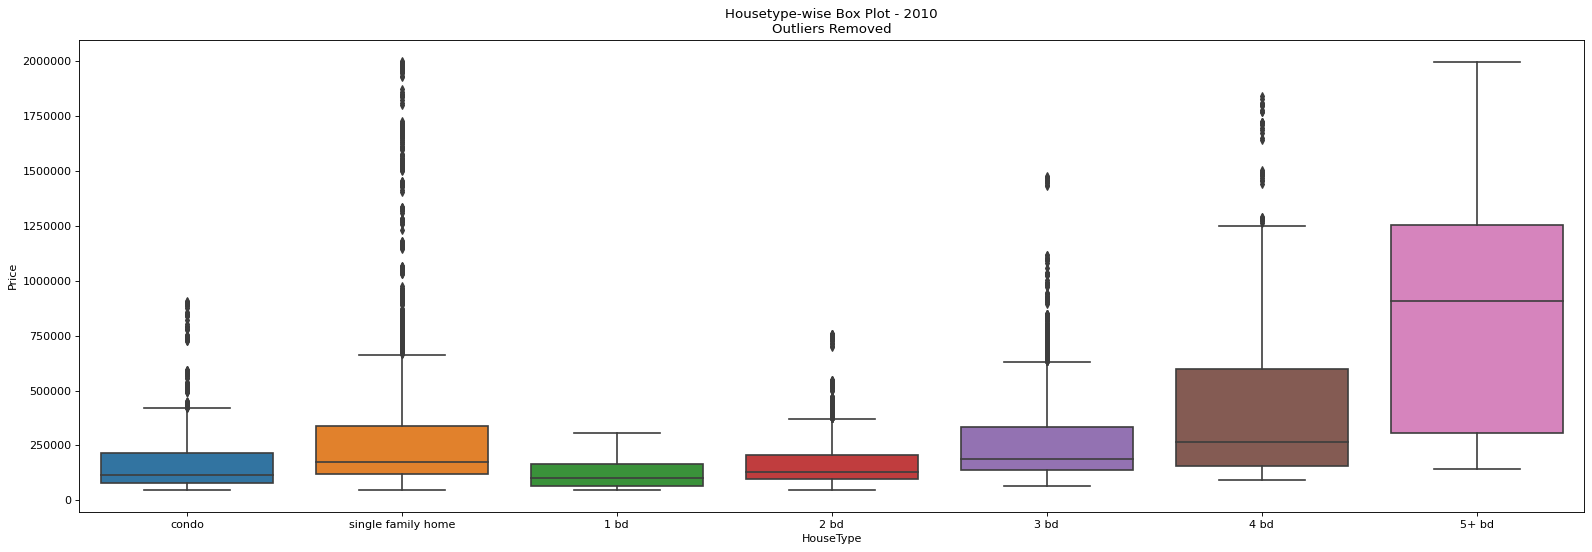

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2011\nOutliers Removed')

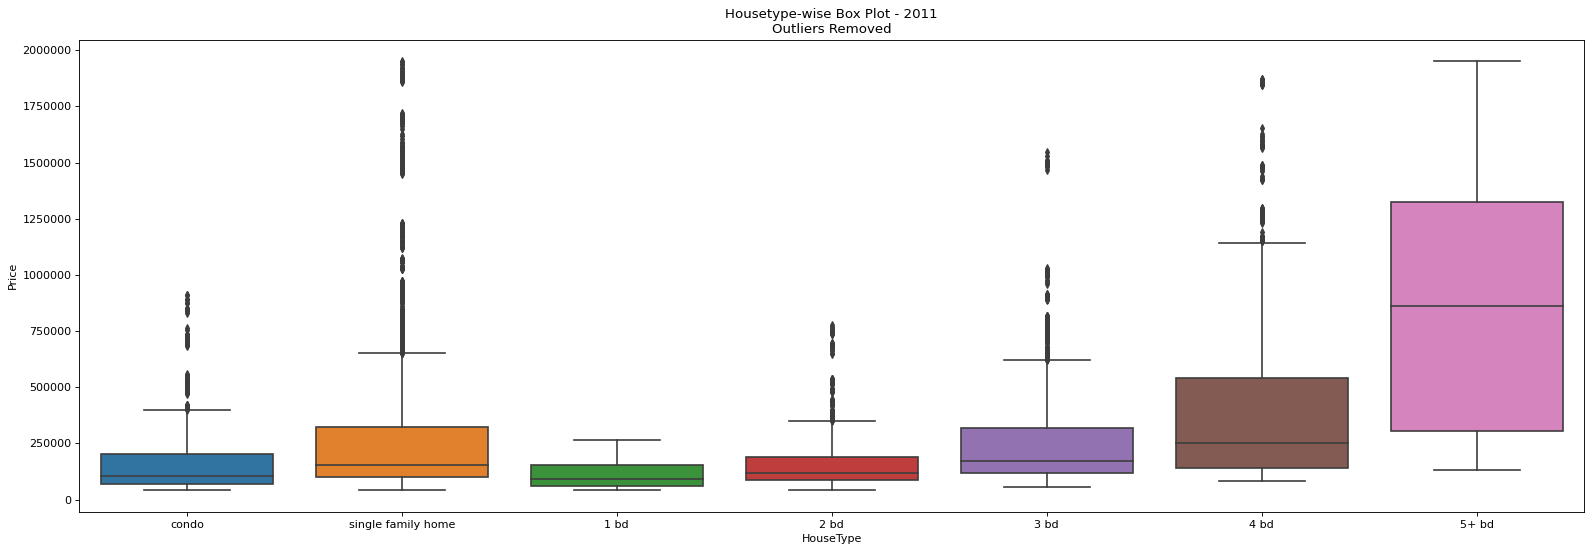

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2012\nOutliers Removed')

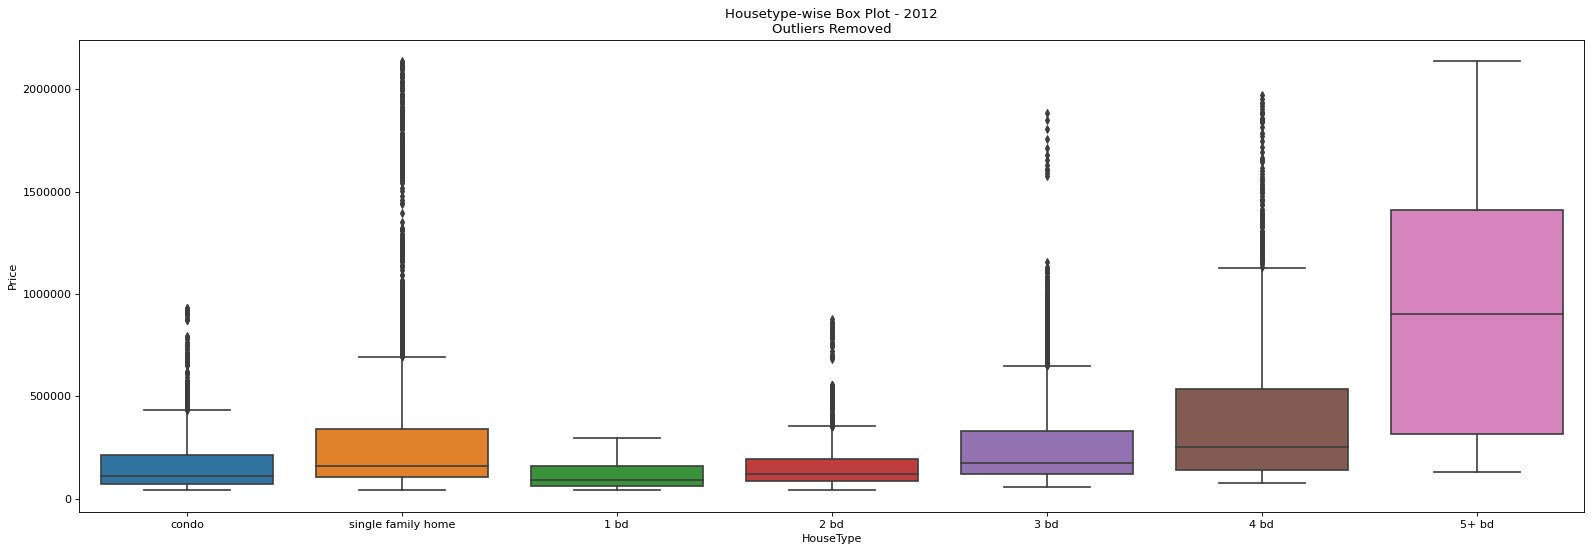

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2013\nOutliers Removed')

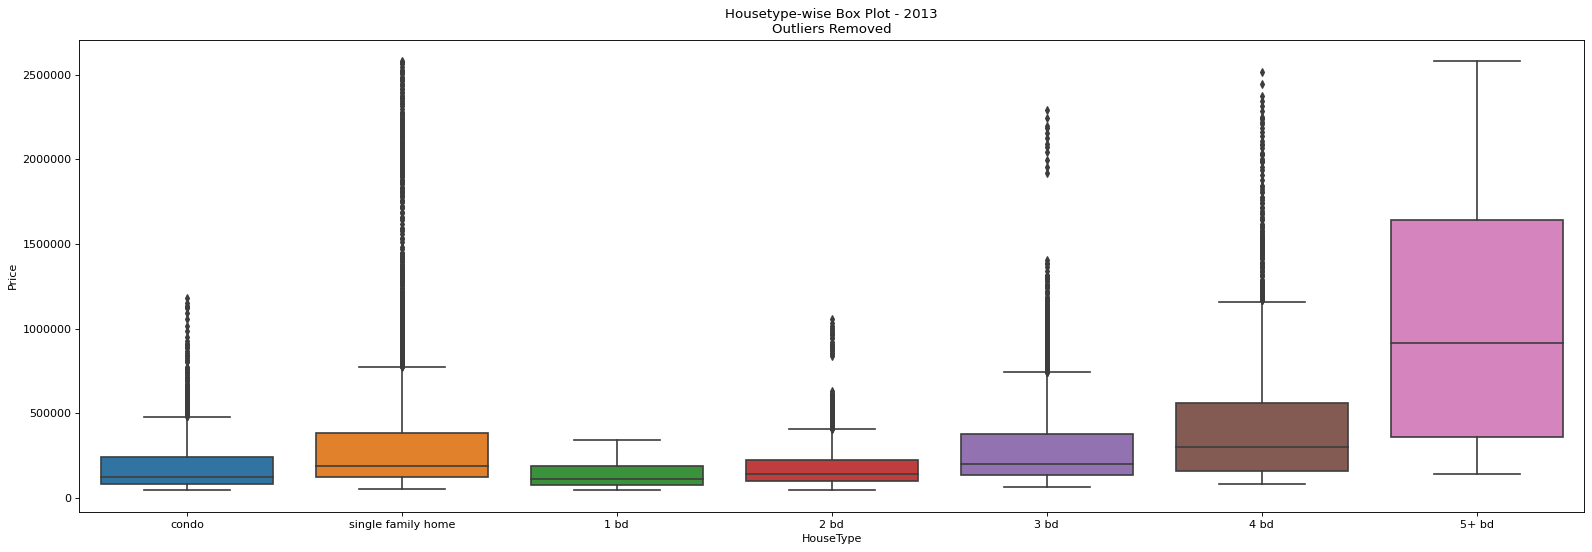

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2014\nOutliers Removed')

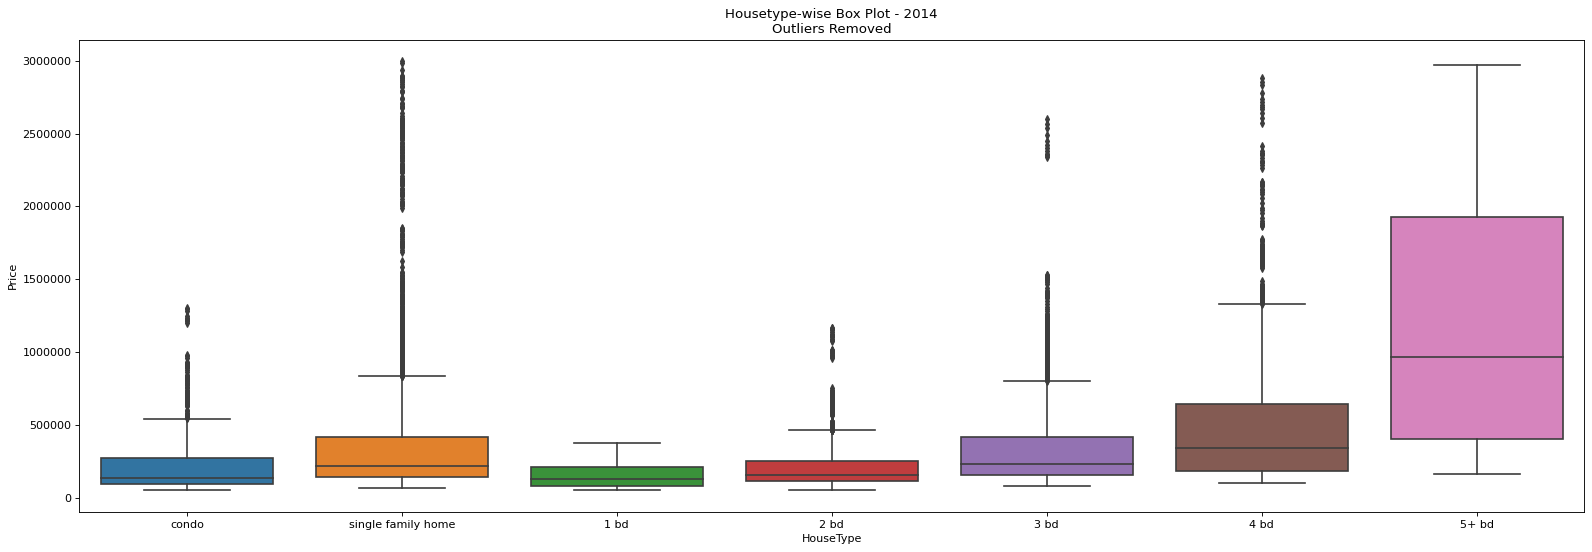

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2015\nOutliers Removed')

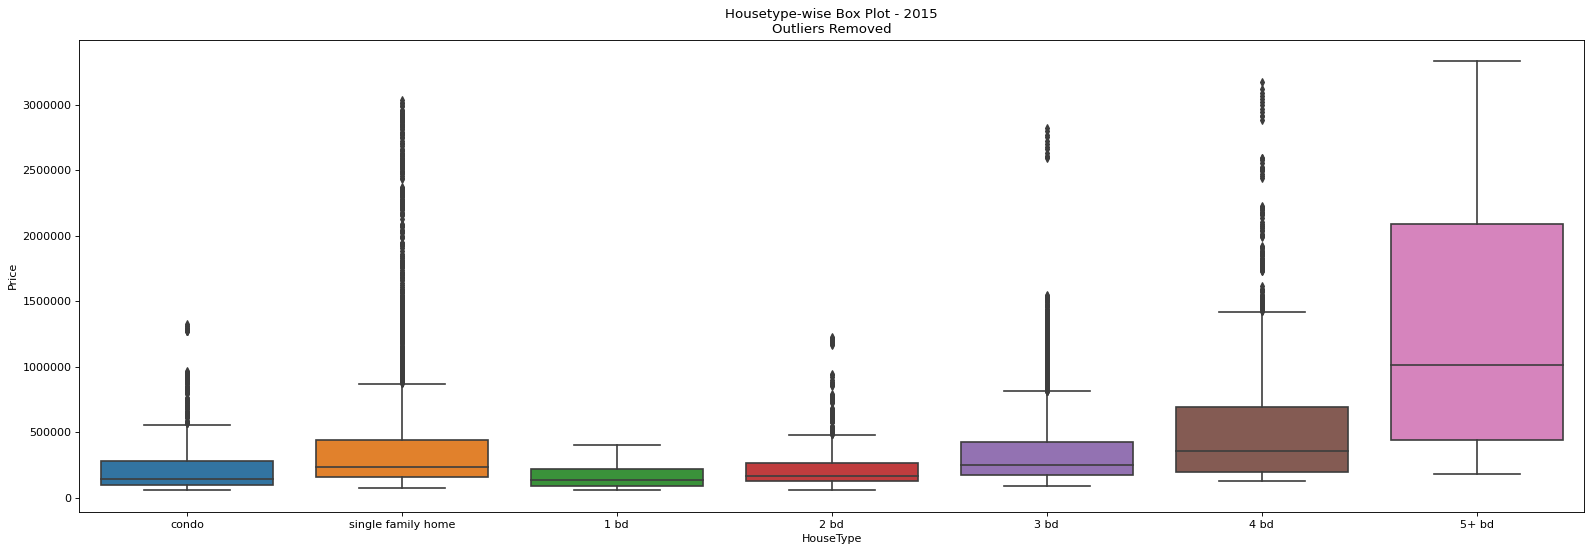

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2016\nOutliers Removed')

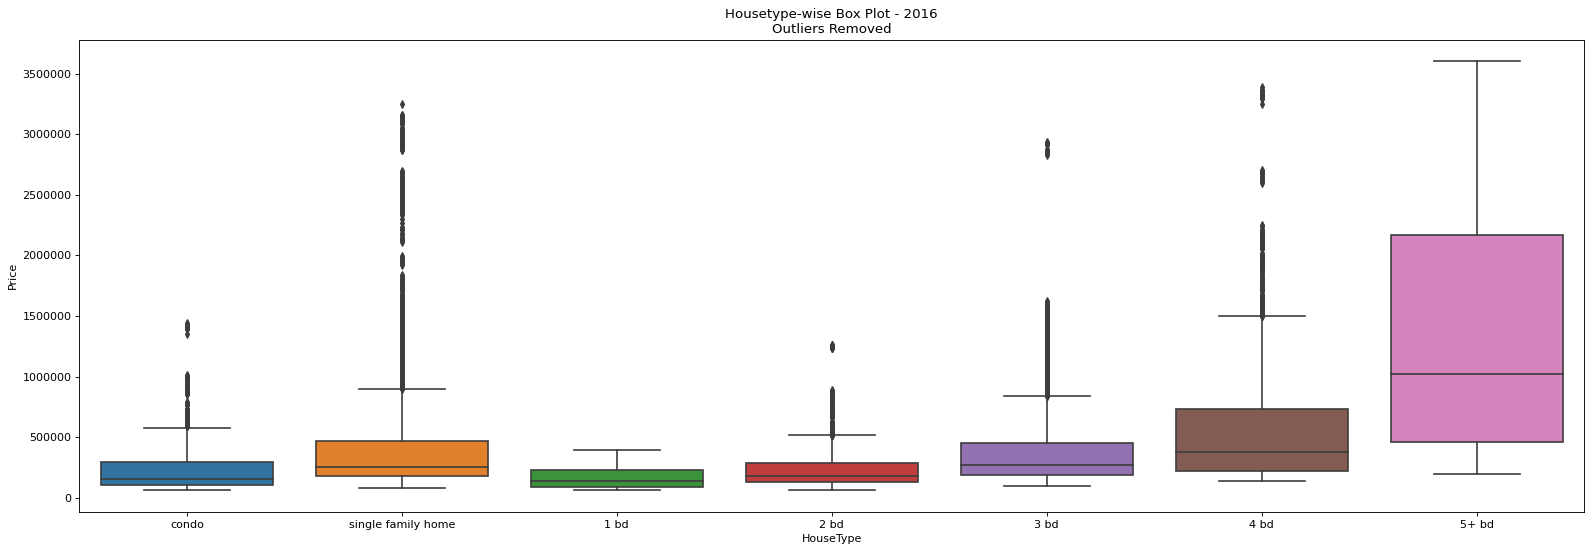

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2017\nOutliers Removed')

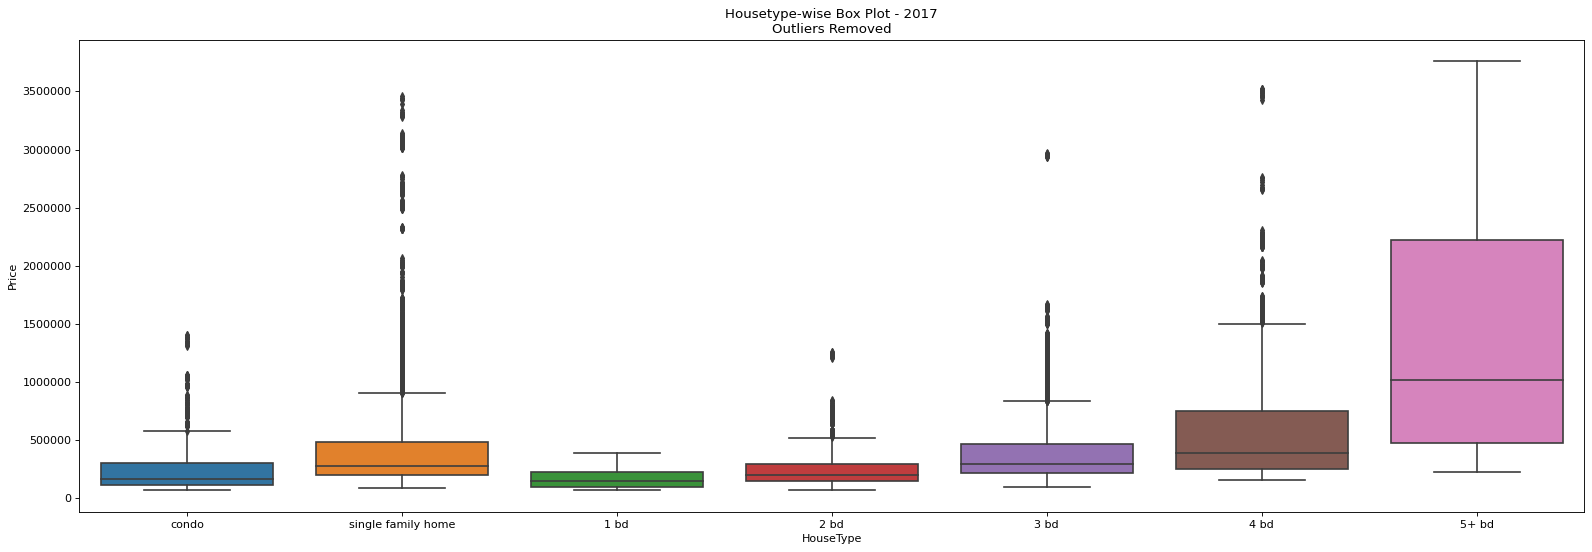

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2018\nOutliers Removed')

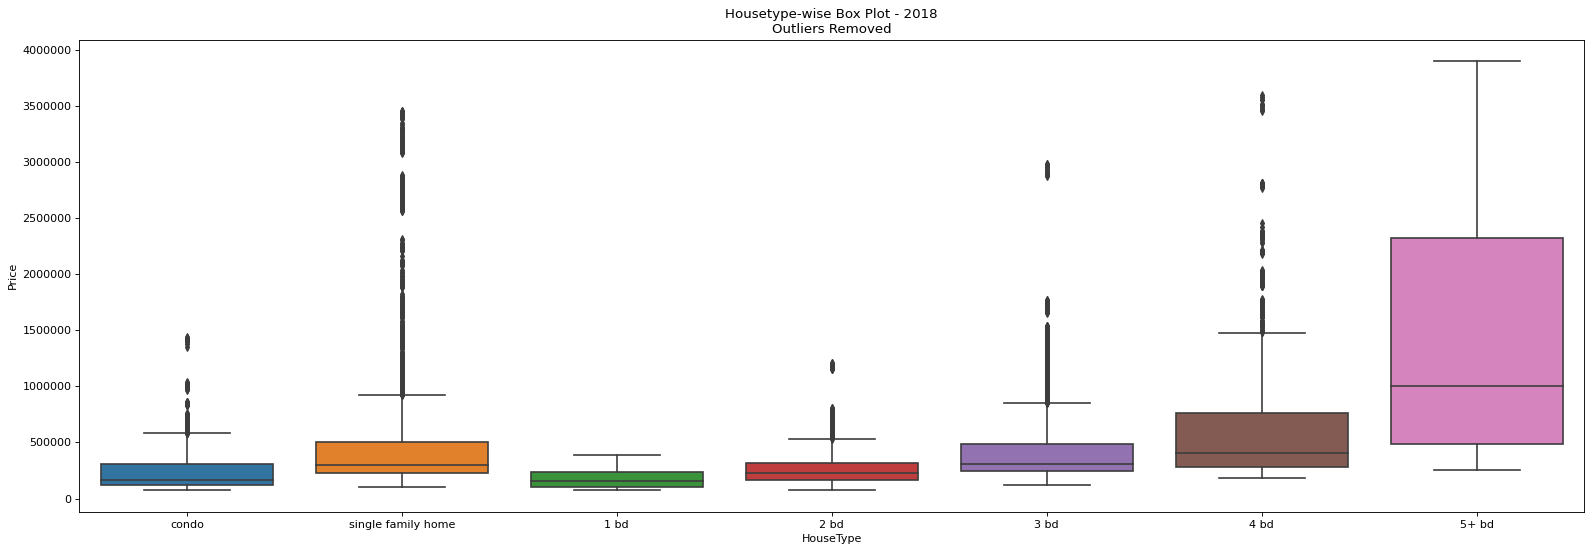

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2019\nOutliers Removed')

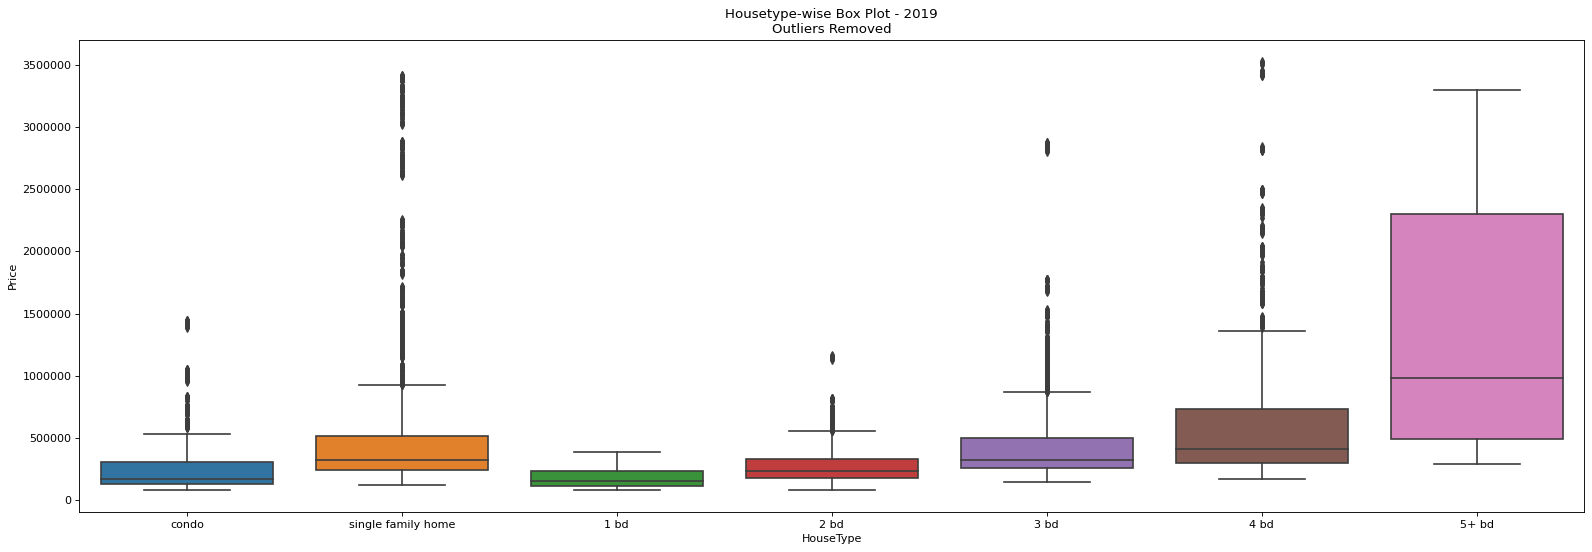

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2020\nOutliers Removed')

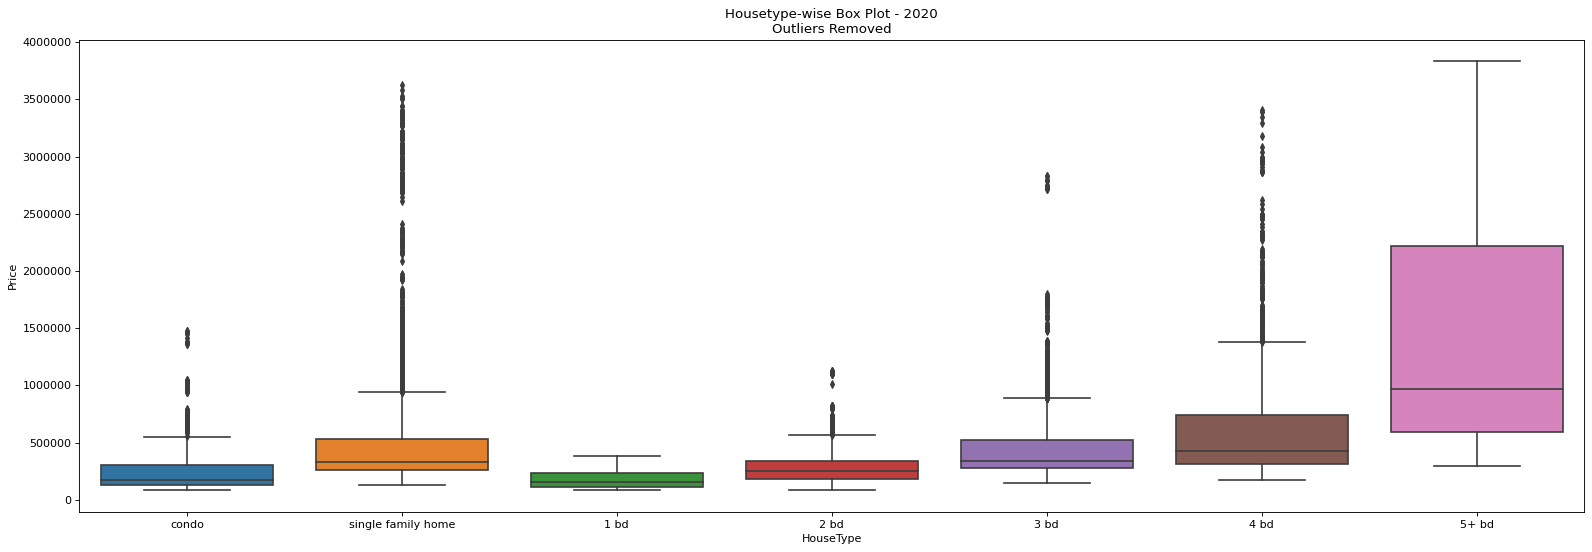

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2021\nOutliers Removed')

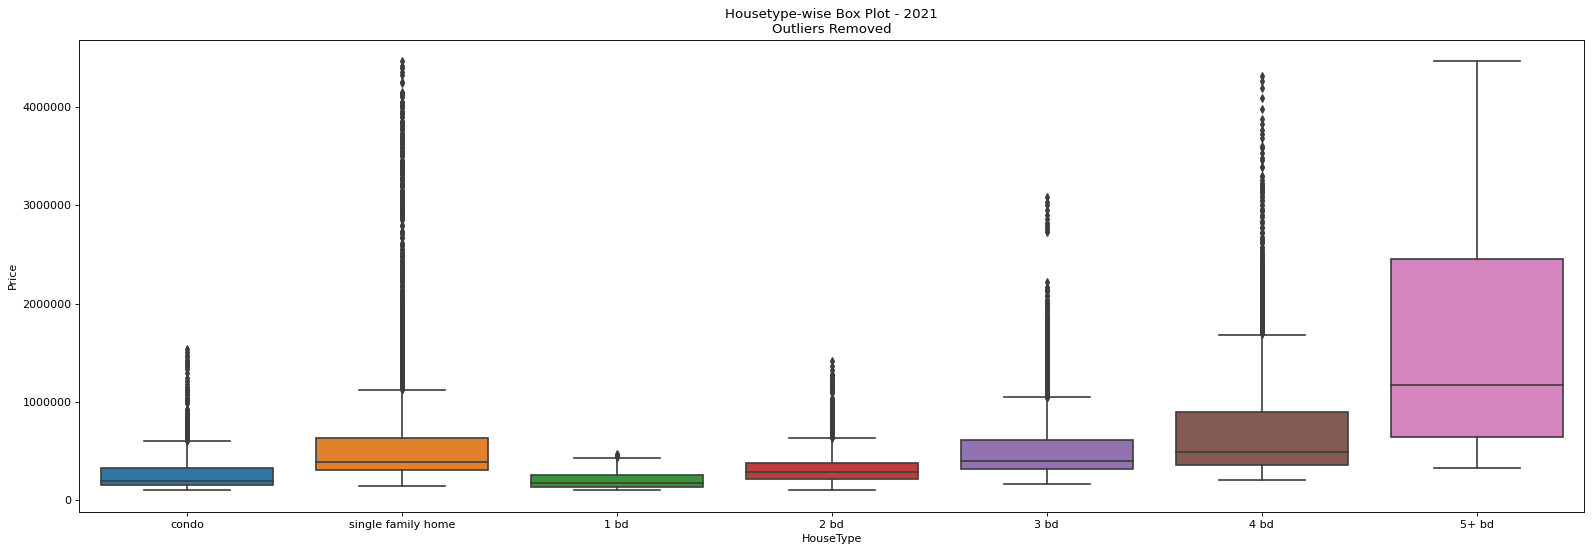

Text(0.5, 1.0, 'Housetype-wise Box Plot - 2022\nOutliers Removed')

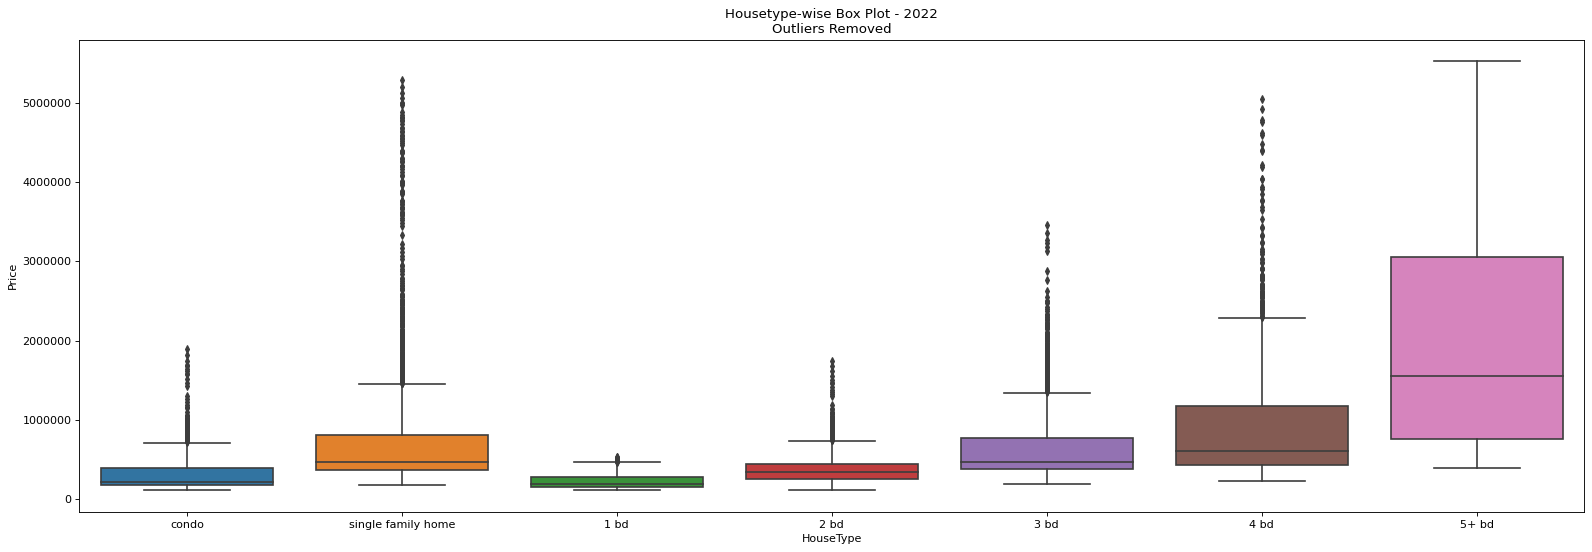

In [136]:
# Boxplot per year, by house type
for year in years:
    house_price__cleaned_year_df = house_prices_df_melted_clean[house_prices_df_melted_clean.Year == year]
    
    # Draw Plot
    fig, axes = plt.subplots(1, figsize=(20,7), dpi= 80)
    ax = sns.boxplot(x="HouseType", y="Price", data=house_price__cleaned_year_df, dodge=False)

    # Set Title
    axes.set_title(f'Housetype-wise Box Plot - {year}\nOutliers Removed')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

<AxesSubplot: xlabel='Date', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot\nOutliers Removed')

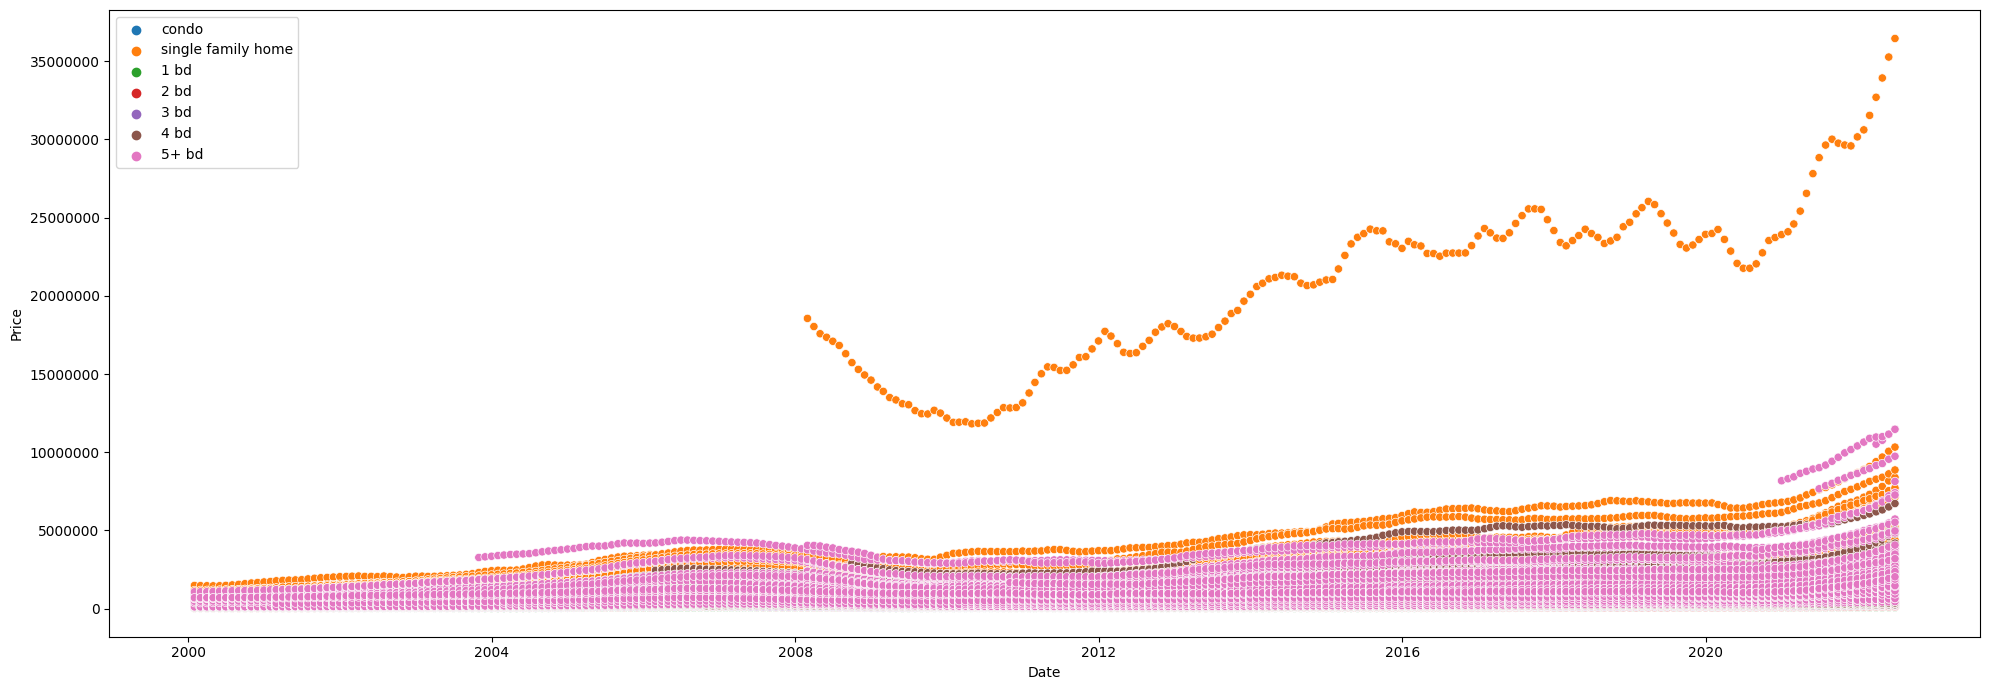

<AxesSubplot: xlabel='Year', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot\nOutliers Removed')

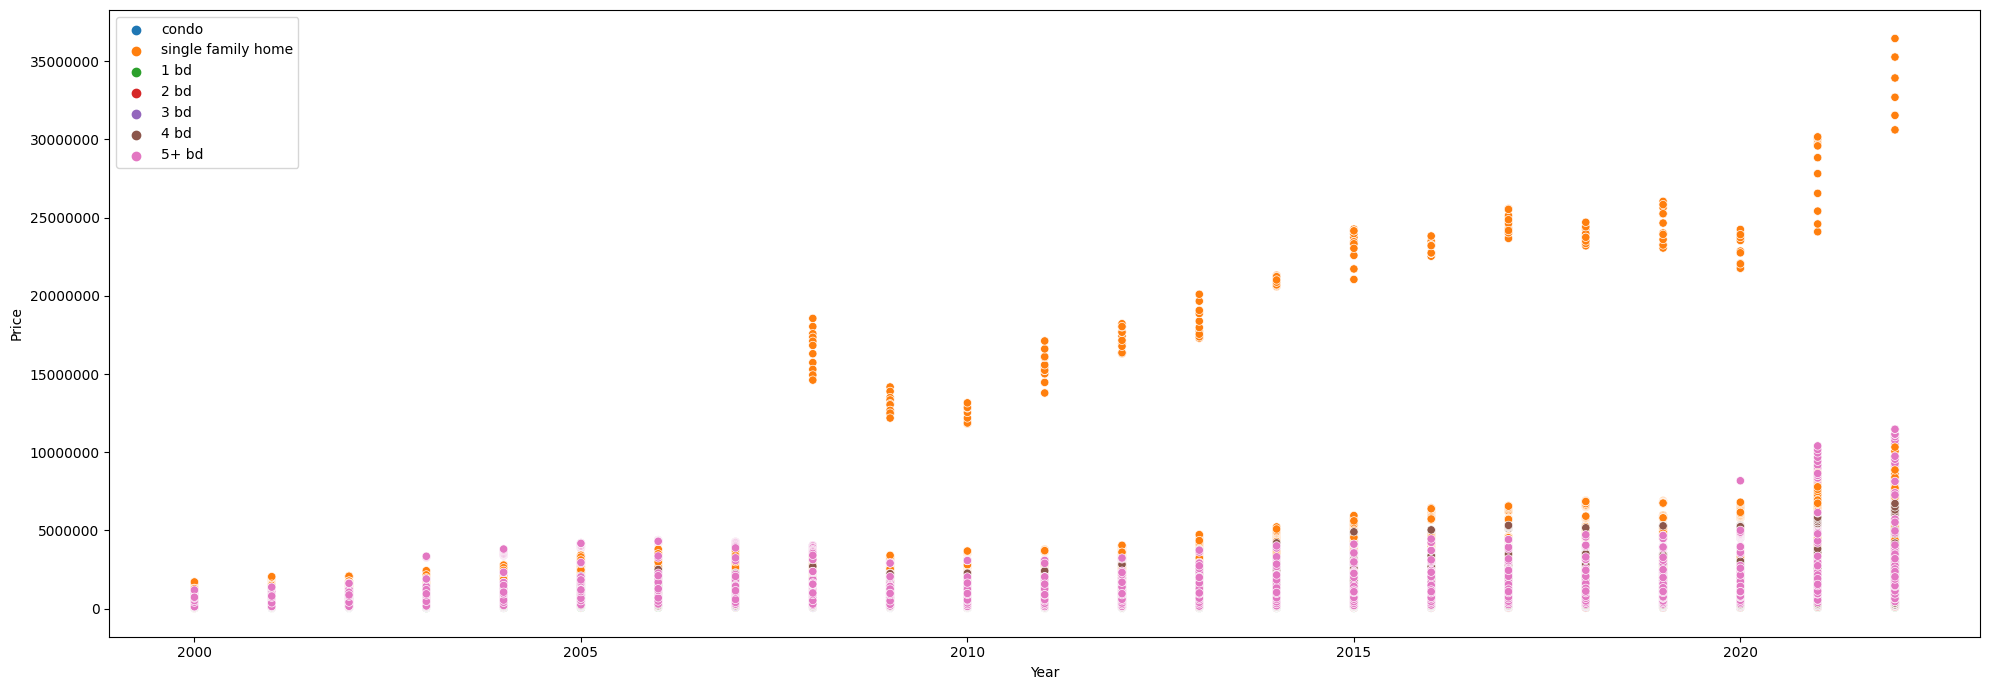

In [146]:
# Scatter plot

# By date
sns.scatterplot(x="Date", y="Price", hue='HouseType', data=house_prices_df_melted, legend=True)
plt.legend(loc='upper left')
axes.set_title(f'Scatter Plot - by Date')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# By year
sns.scatterplot(x="Year", y="Price", hue='HouseType', data=house_prices_df_melted, legend=True)
plt.legend(loc='upper left')
axes.set_title(f'Scatter Plot - by Year')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<AxesSubplot: xlabel='Date', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot- by Date\nOutliers Removed')

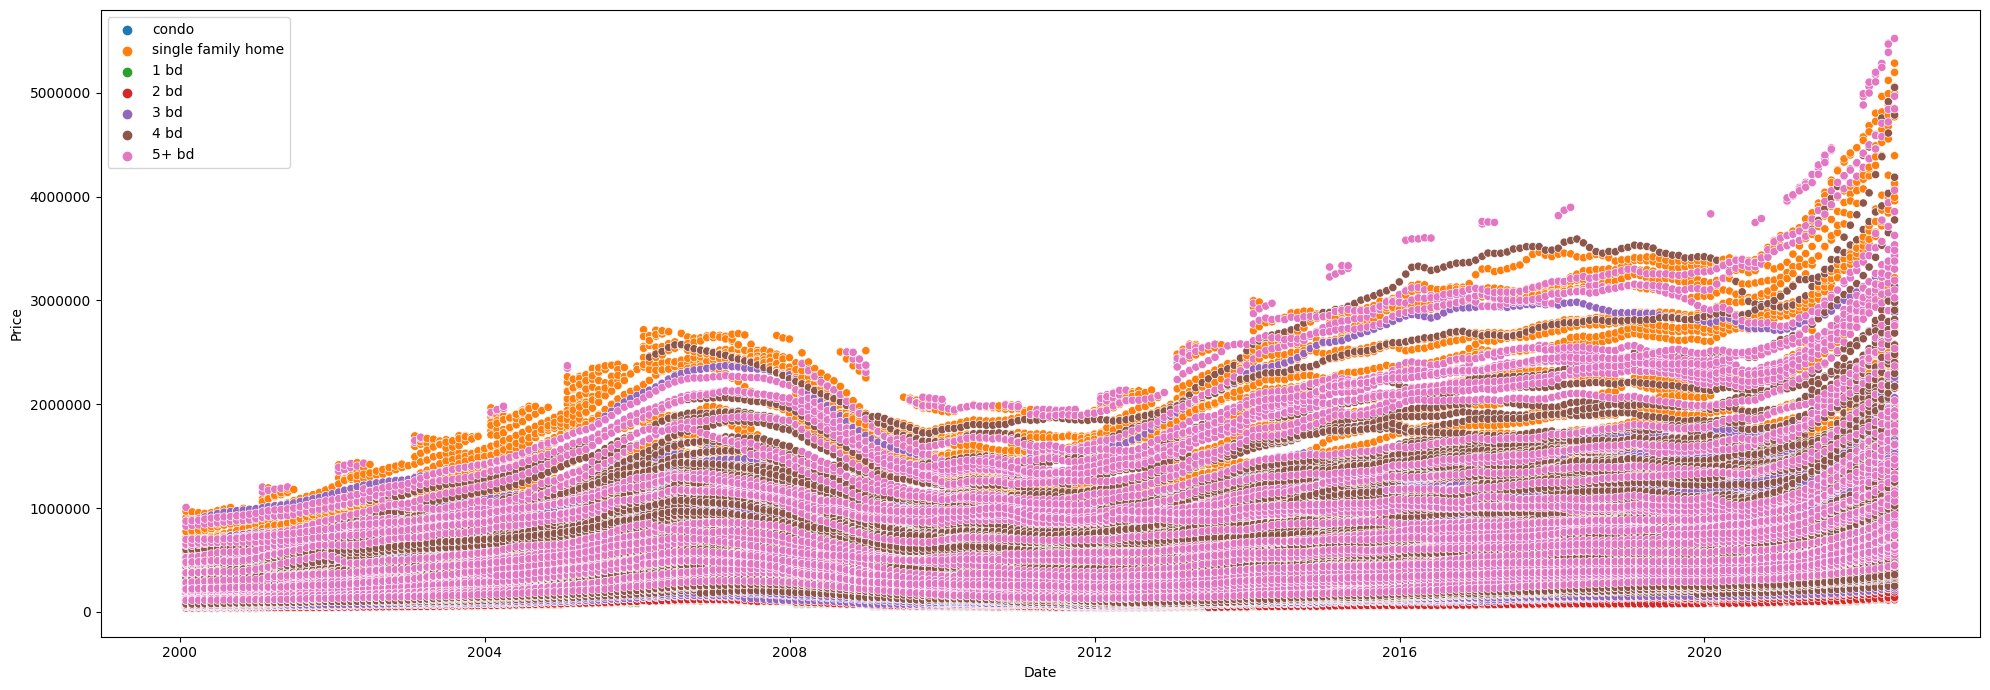

<AxesSubplot: xlabel='Year', ylabel='Price'>

Text(0.5, 1.0, 'Scatter Plot - by Year\nOutliers Removed')

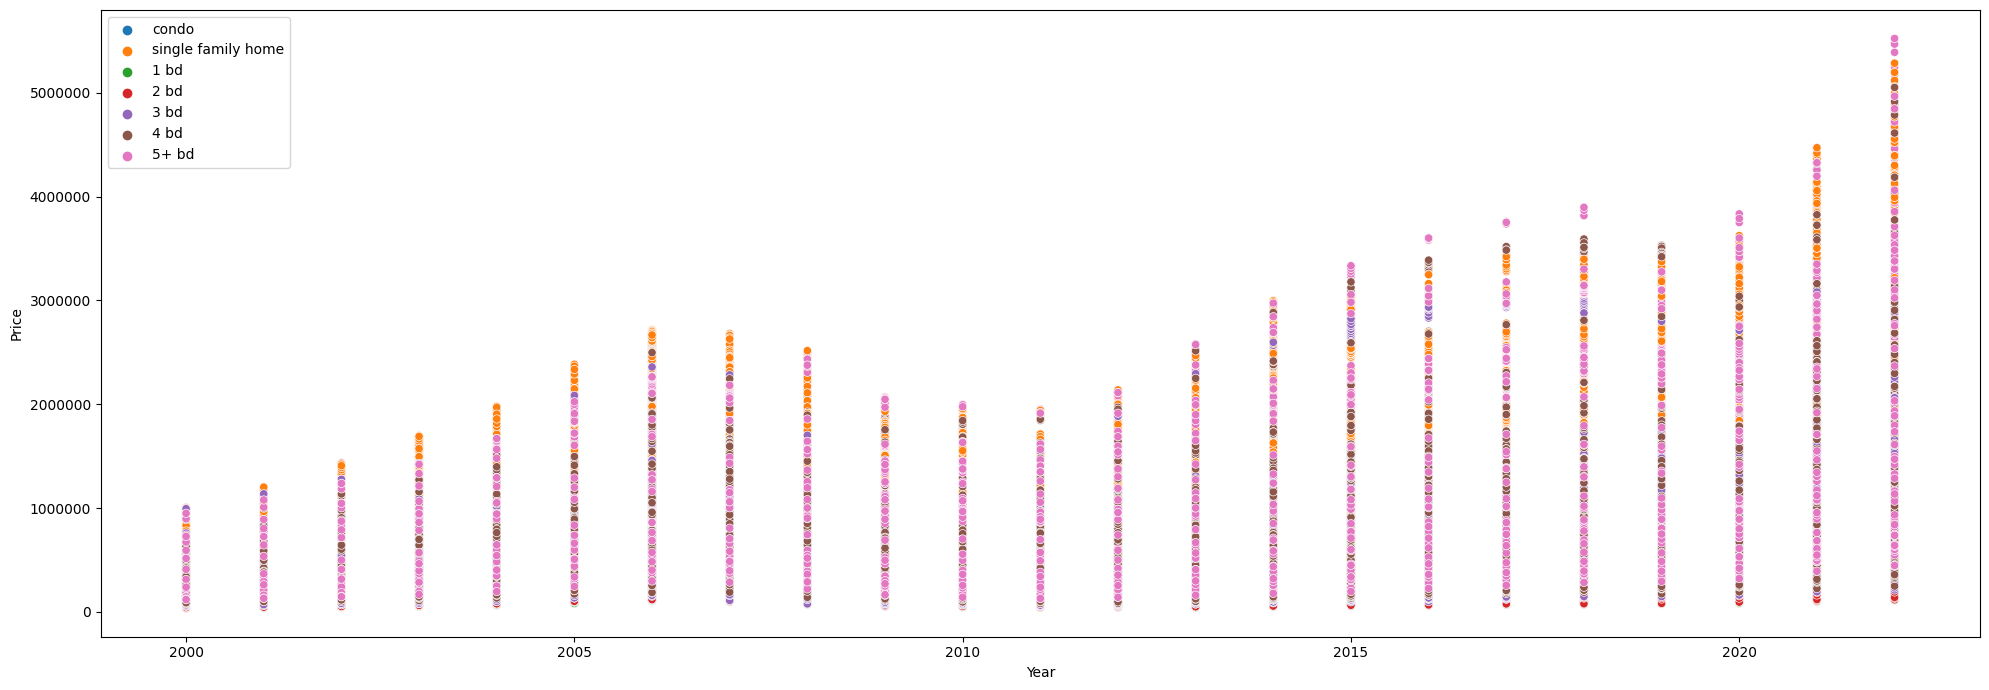

In [148]:
# Scatter plot - Outliers Removed

# By date
sns.scatterplot(x="Date", y="Price", hue='HouseType', data=house_prices_df_melted_clean, legend=True)
plt.legend(loc='upper left')
axes.set_title(f'Scatter Plot- by Date\nOutliers Removed')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# By year
sns.scatterplot(x="Year", y="Price", hue='HouseType', data=house_prices_df_melted_clean, legend=True)
plt.legend(loc='upper left')
axes.set_title(f'Scatter Plot - by Year\nOutliers Removed')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2000\nOutliers Removed')

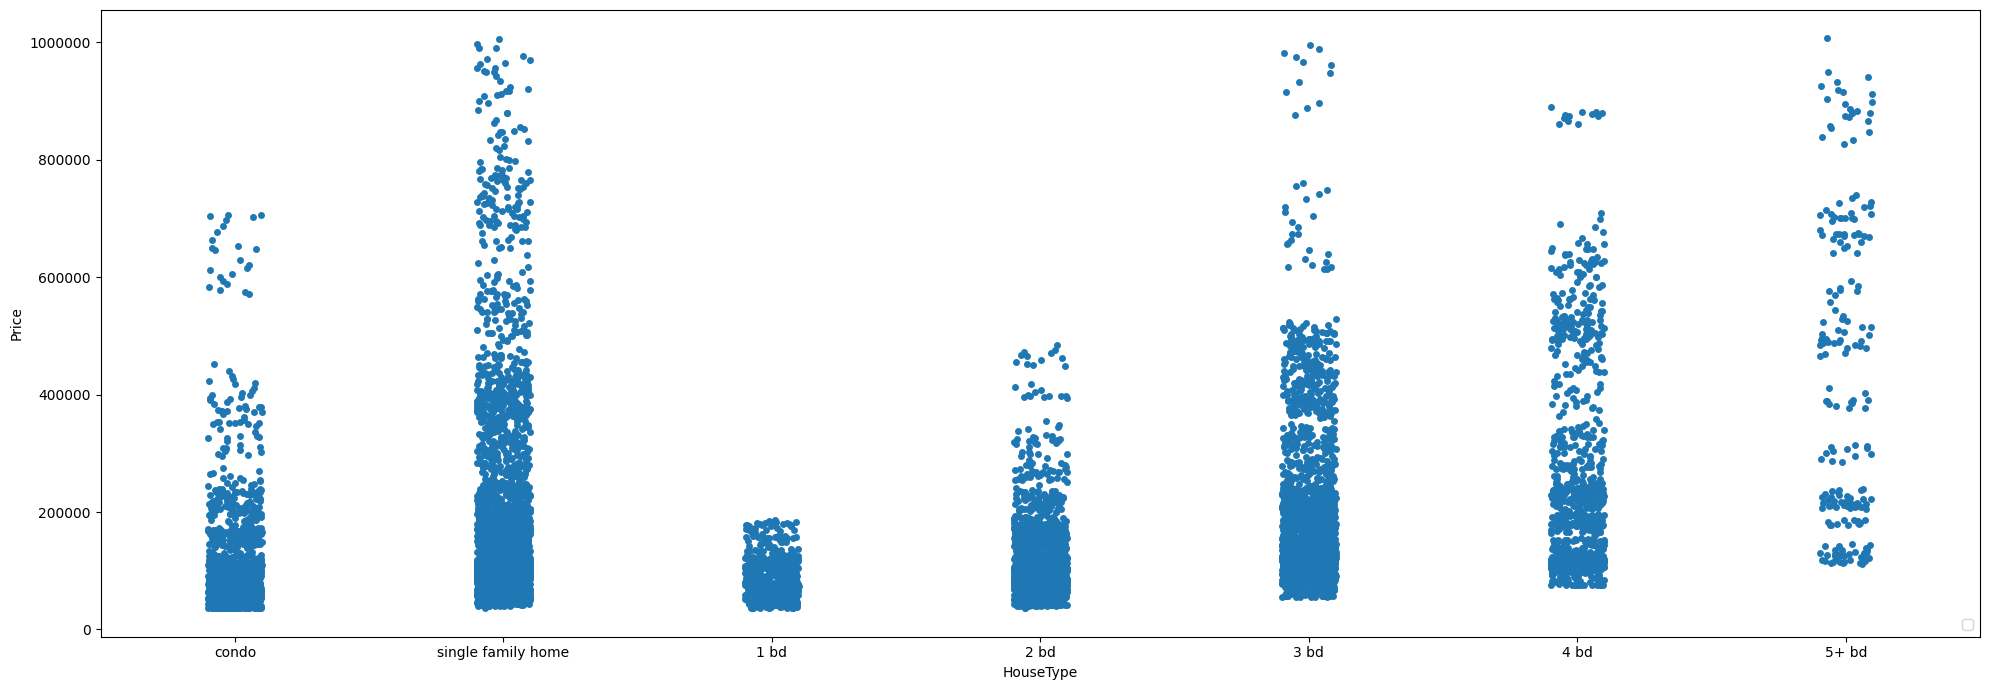

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2001\nOutliers Removed')

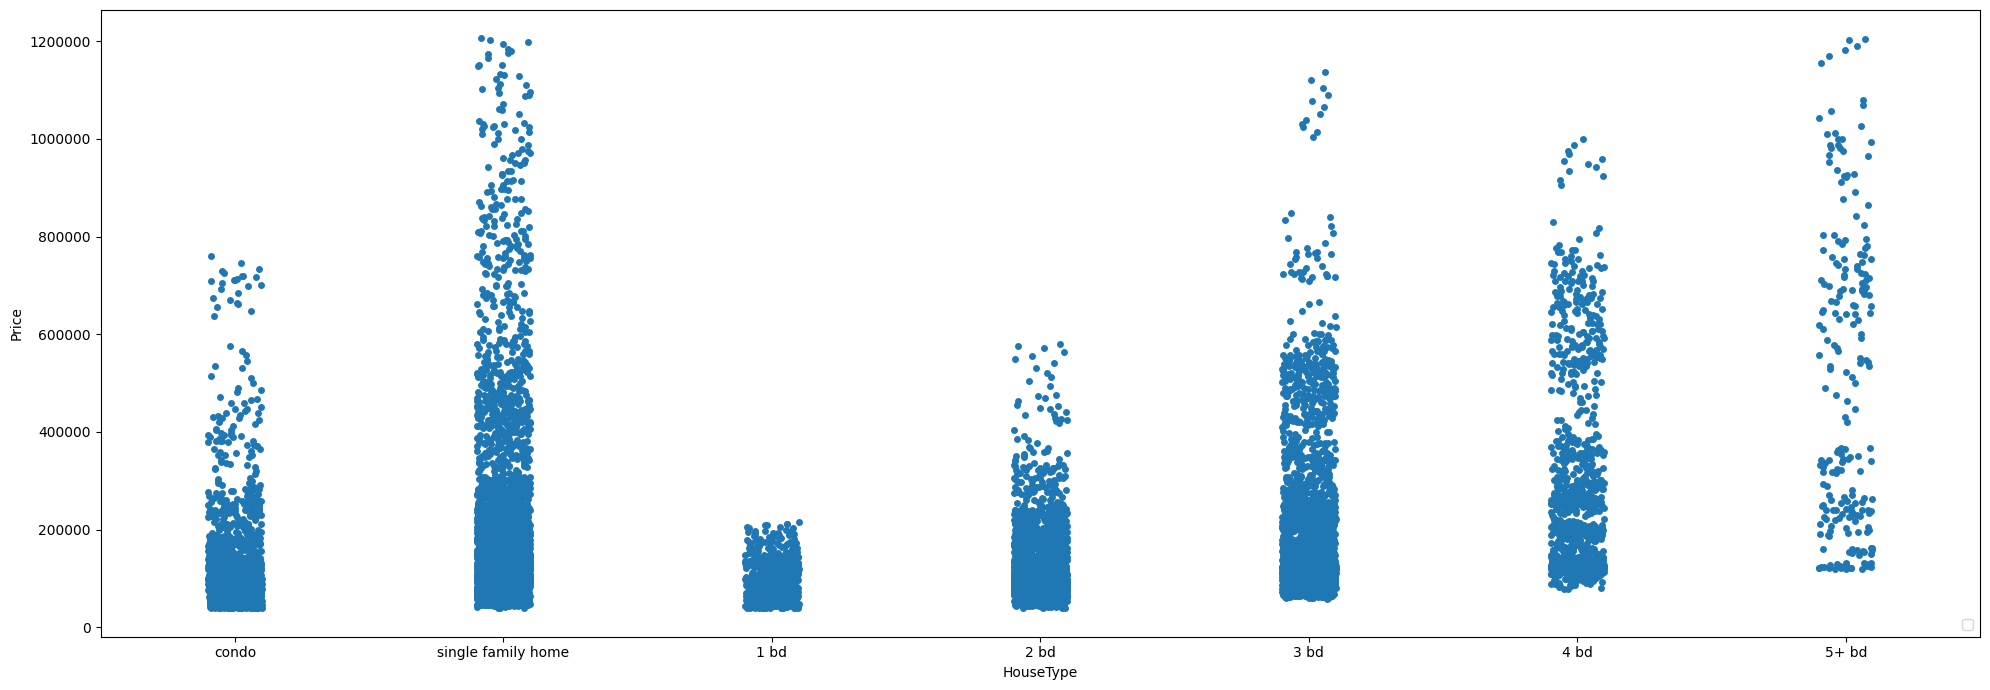

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2002\nOutliers Removed')

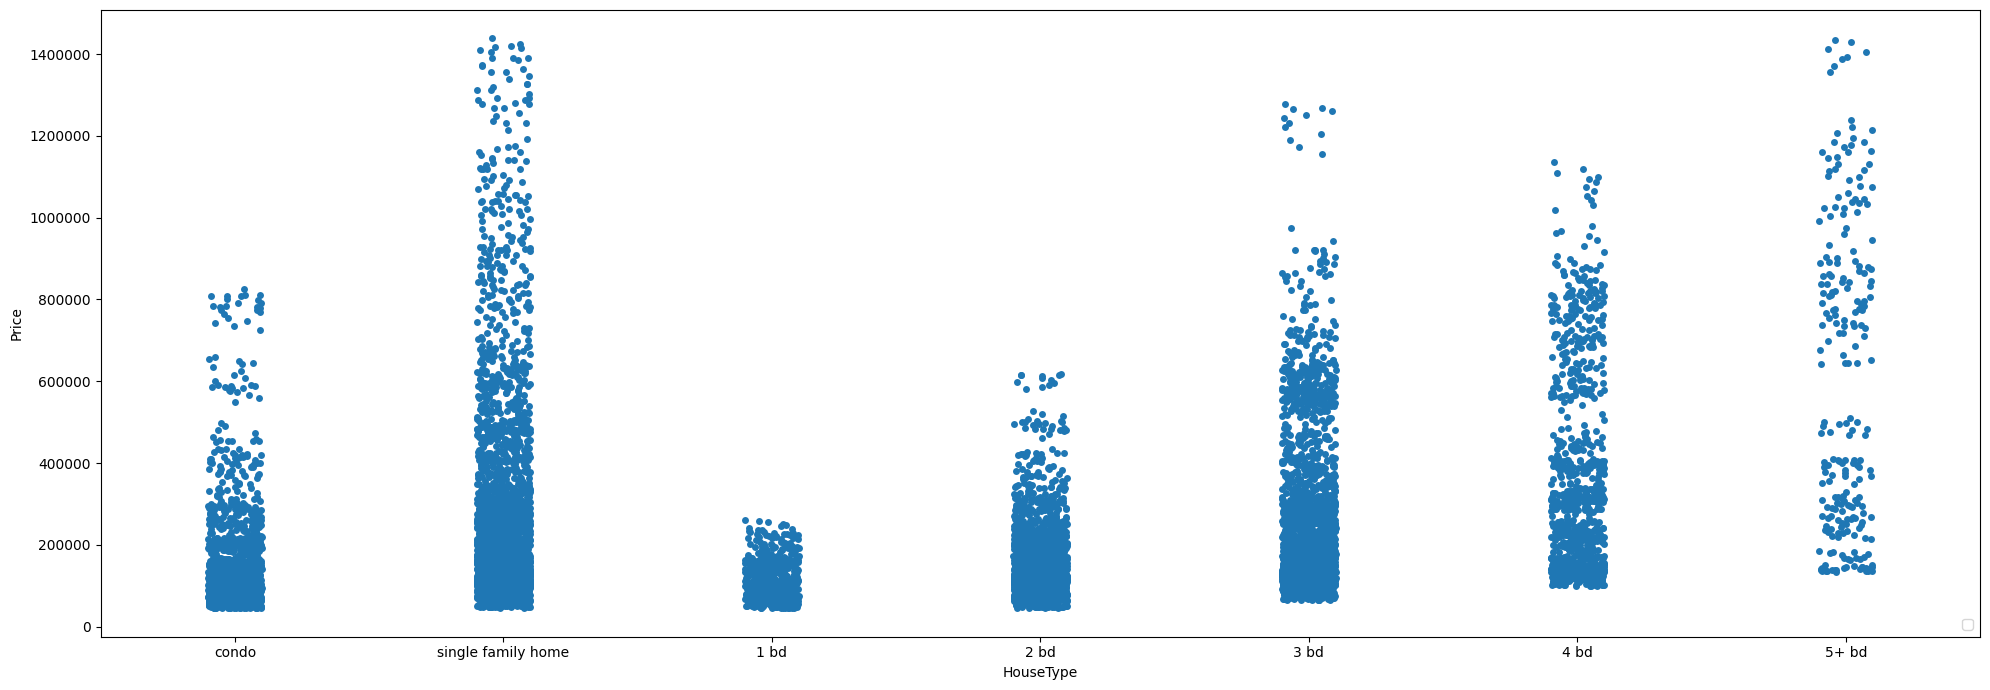

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2003\nOutliers Removed')

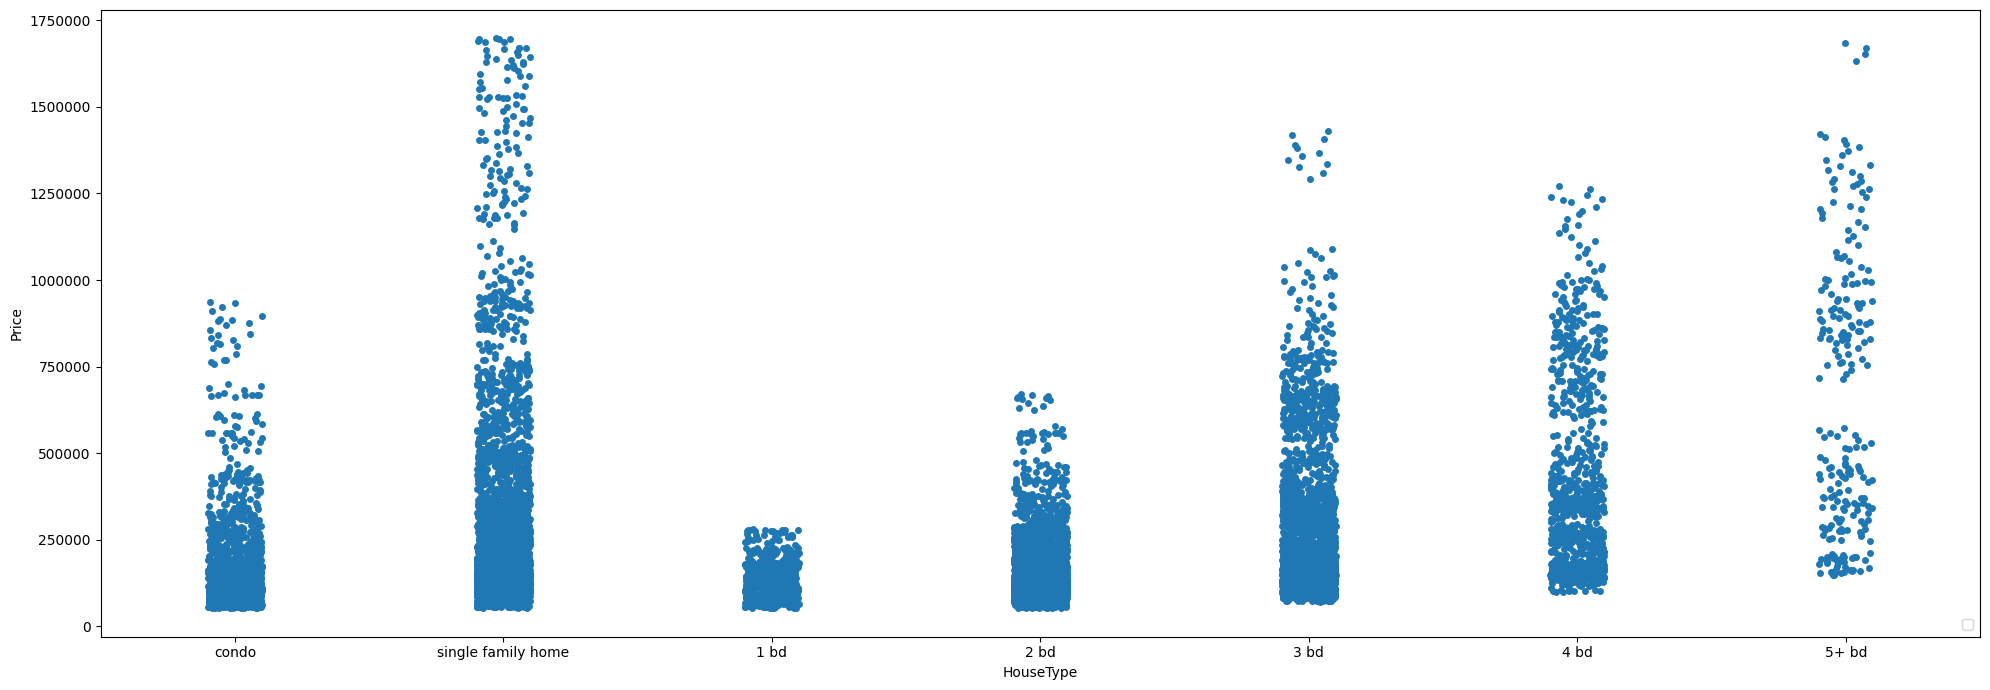

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2004\nOutliers Removed')

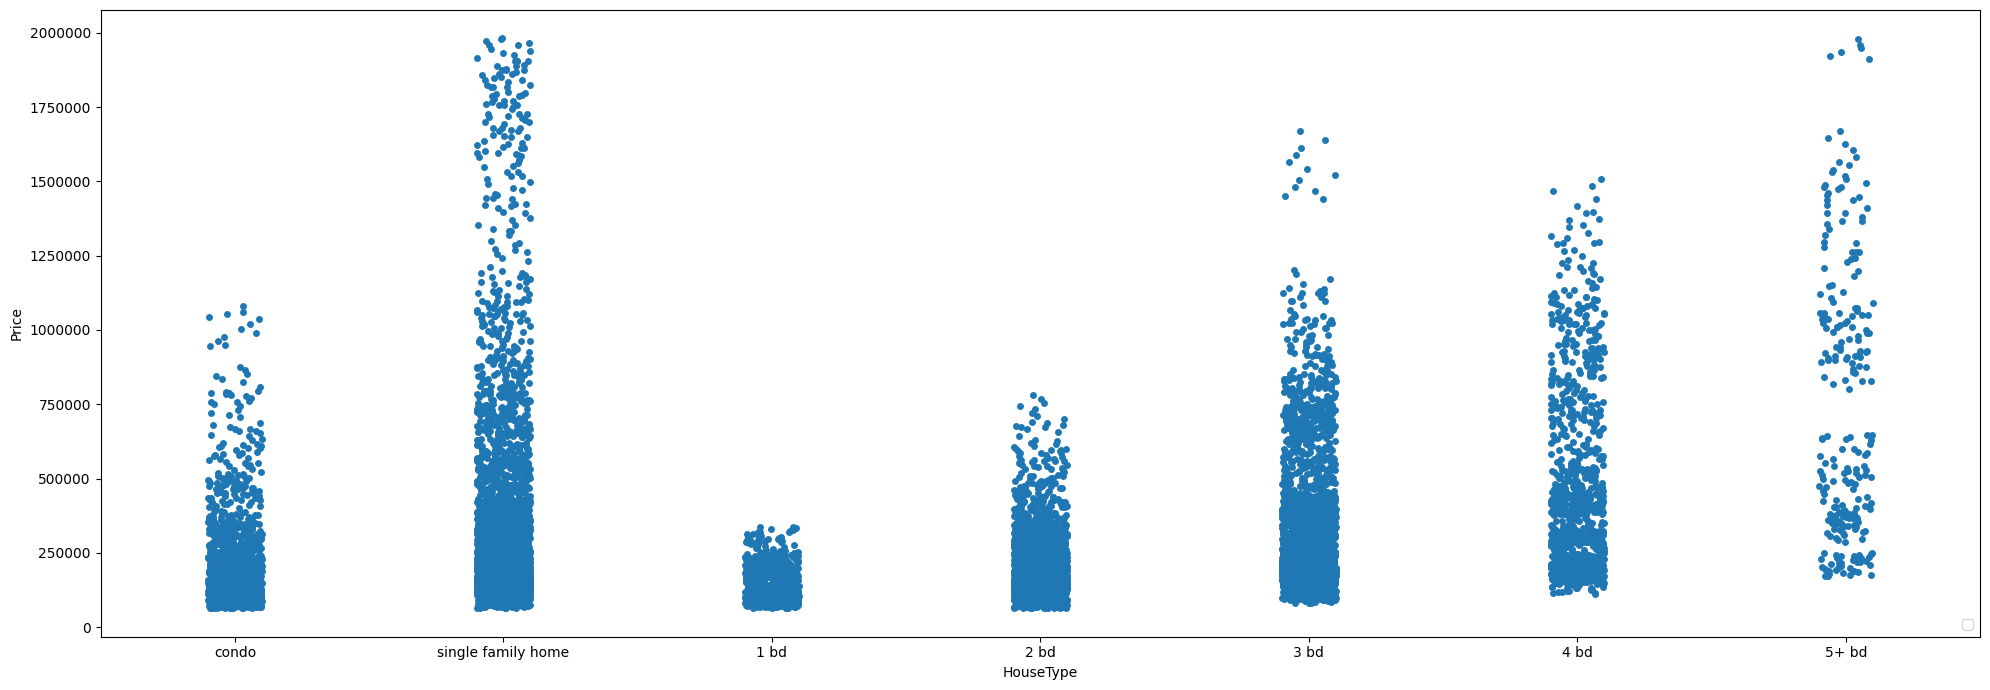

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2005\nOutliers Removed')

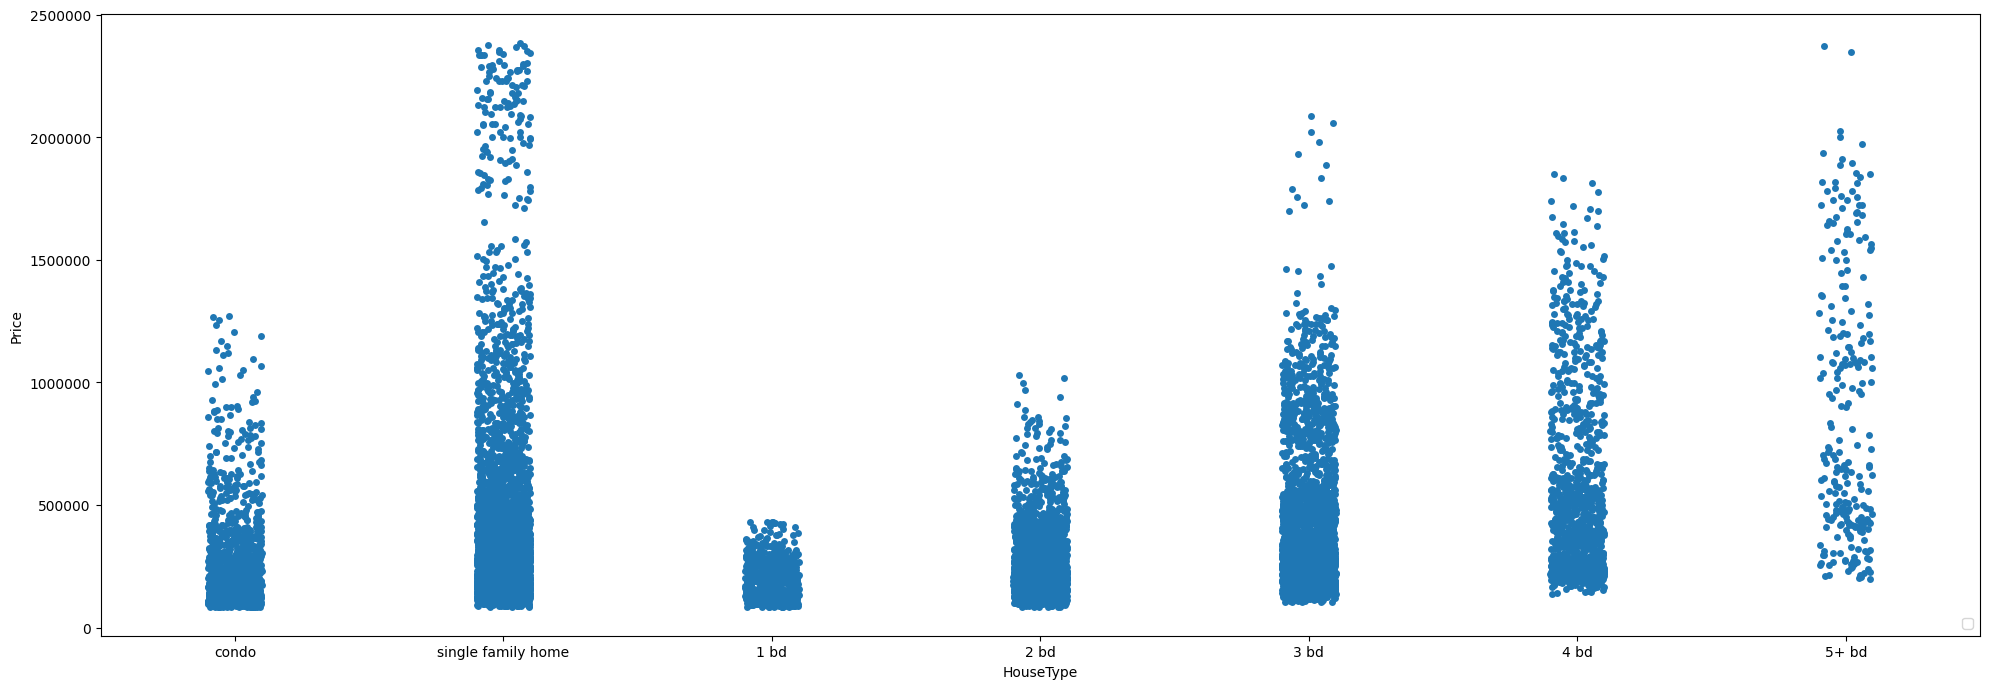

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2006\nOutliers Removed')

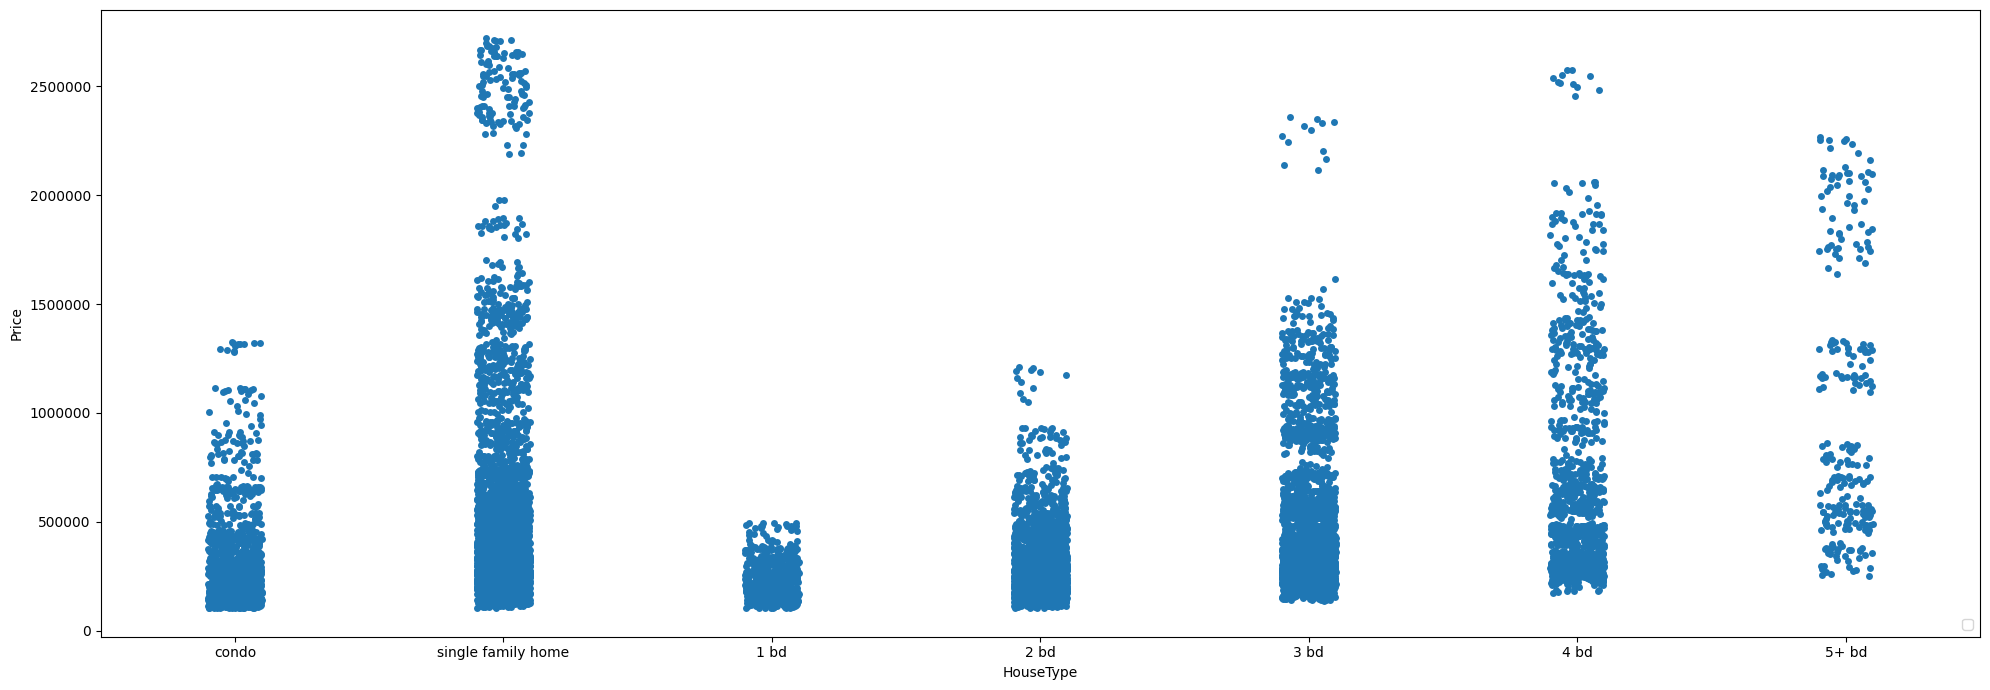

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2007\nOutliers Removed')

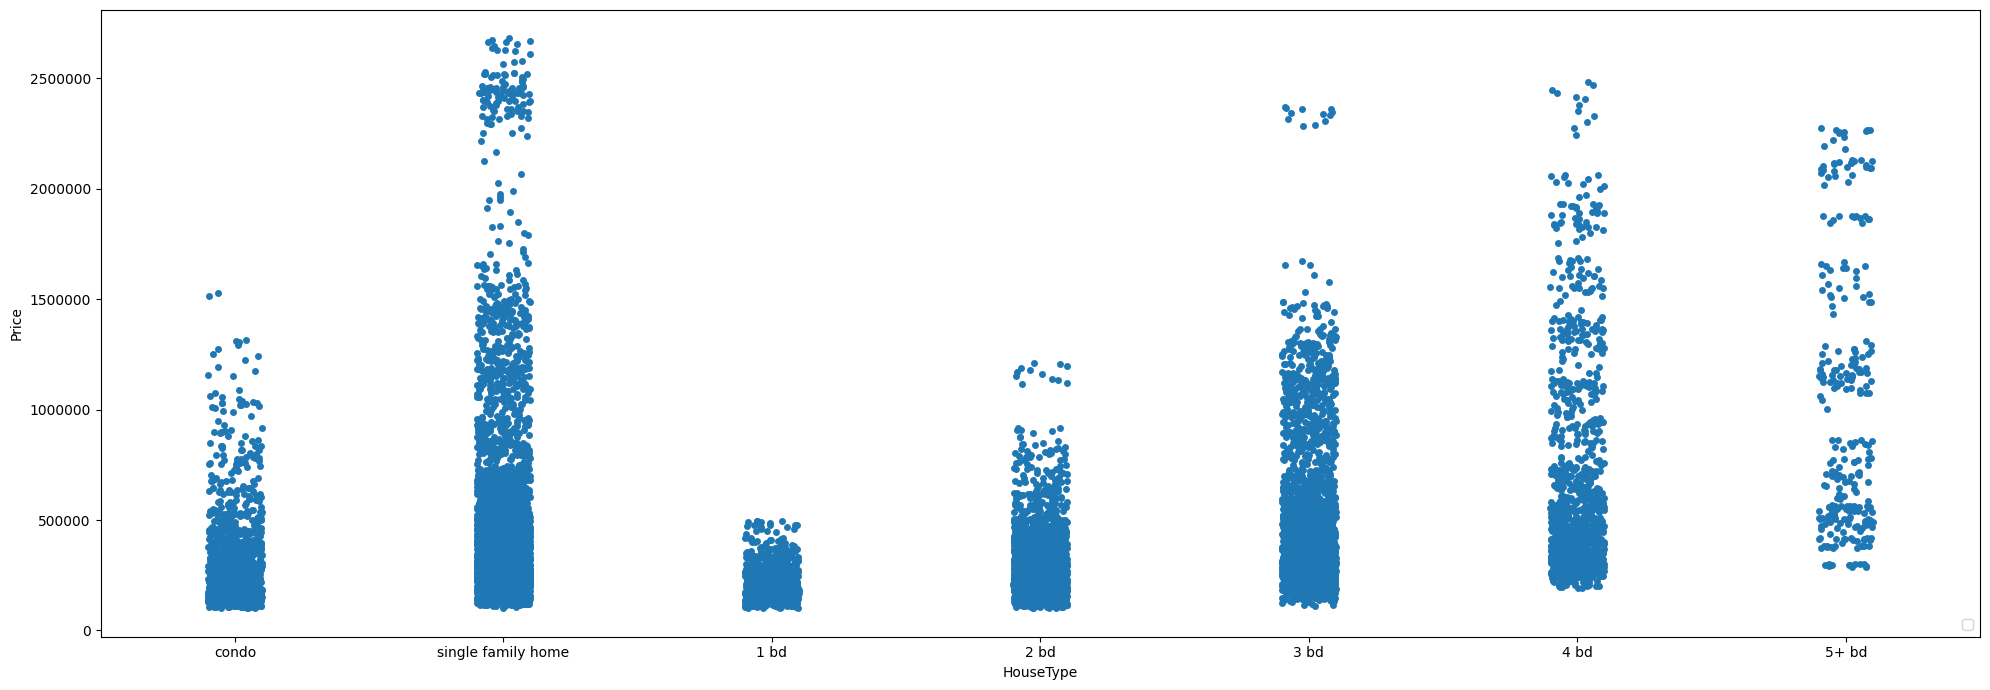

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2008\nOutliers Removed')

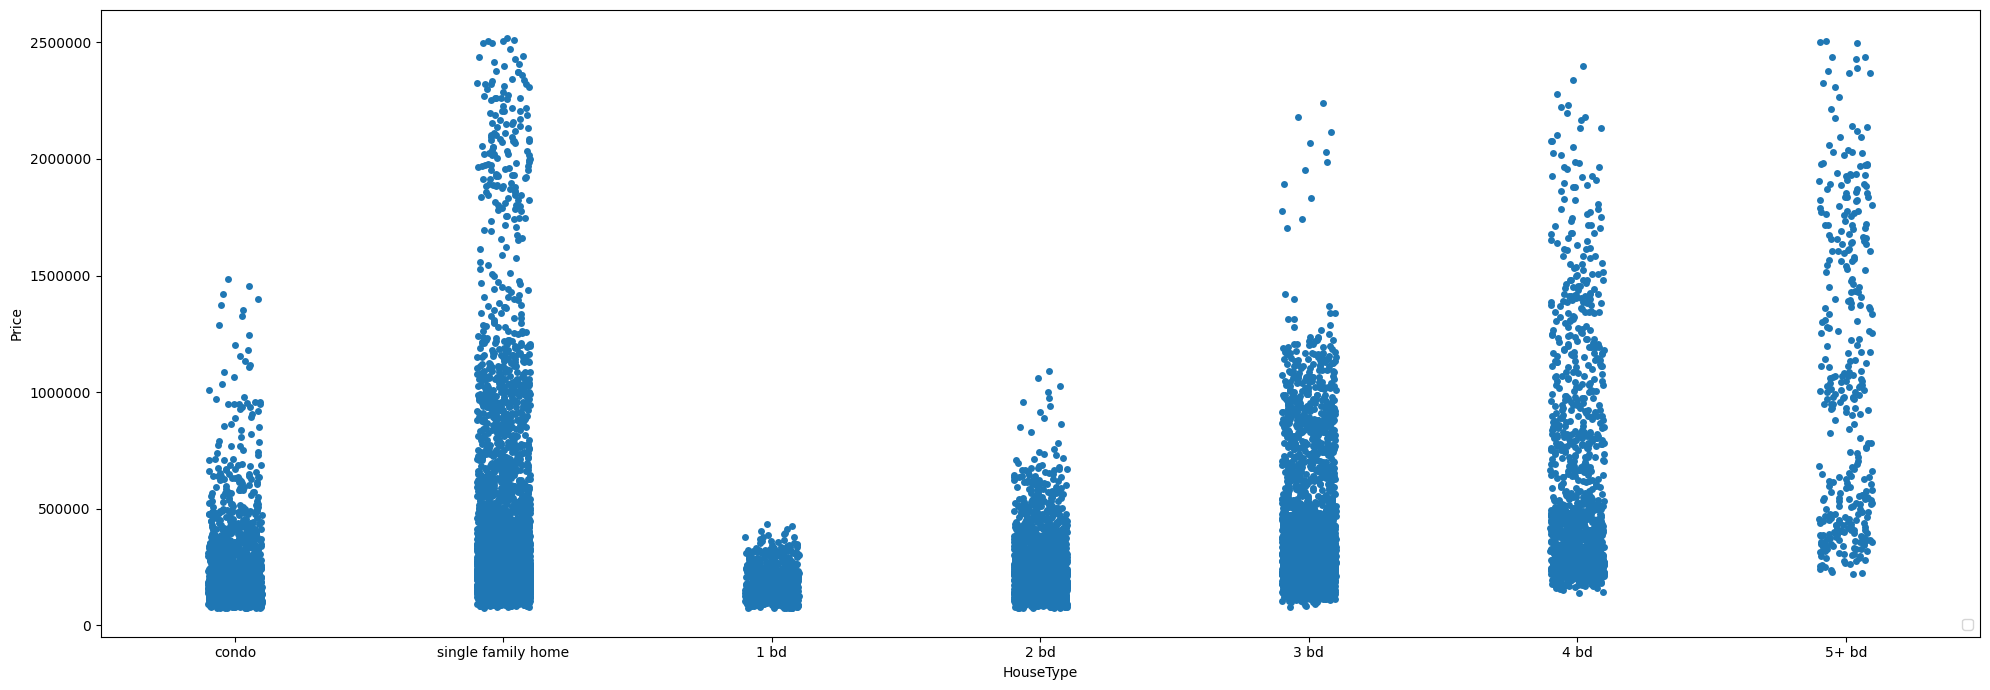

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2009\nOutliers Removed')

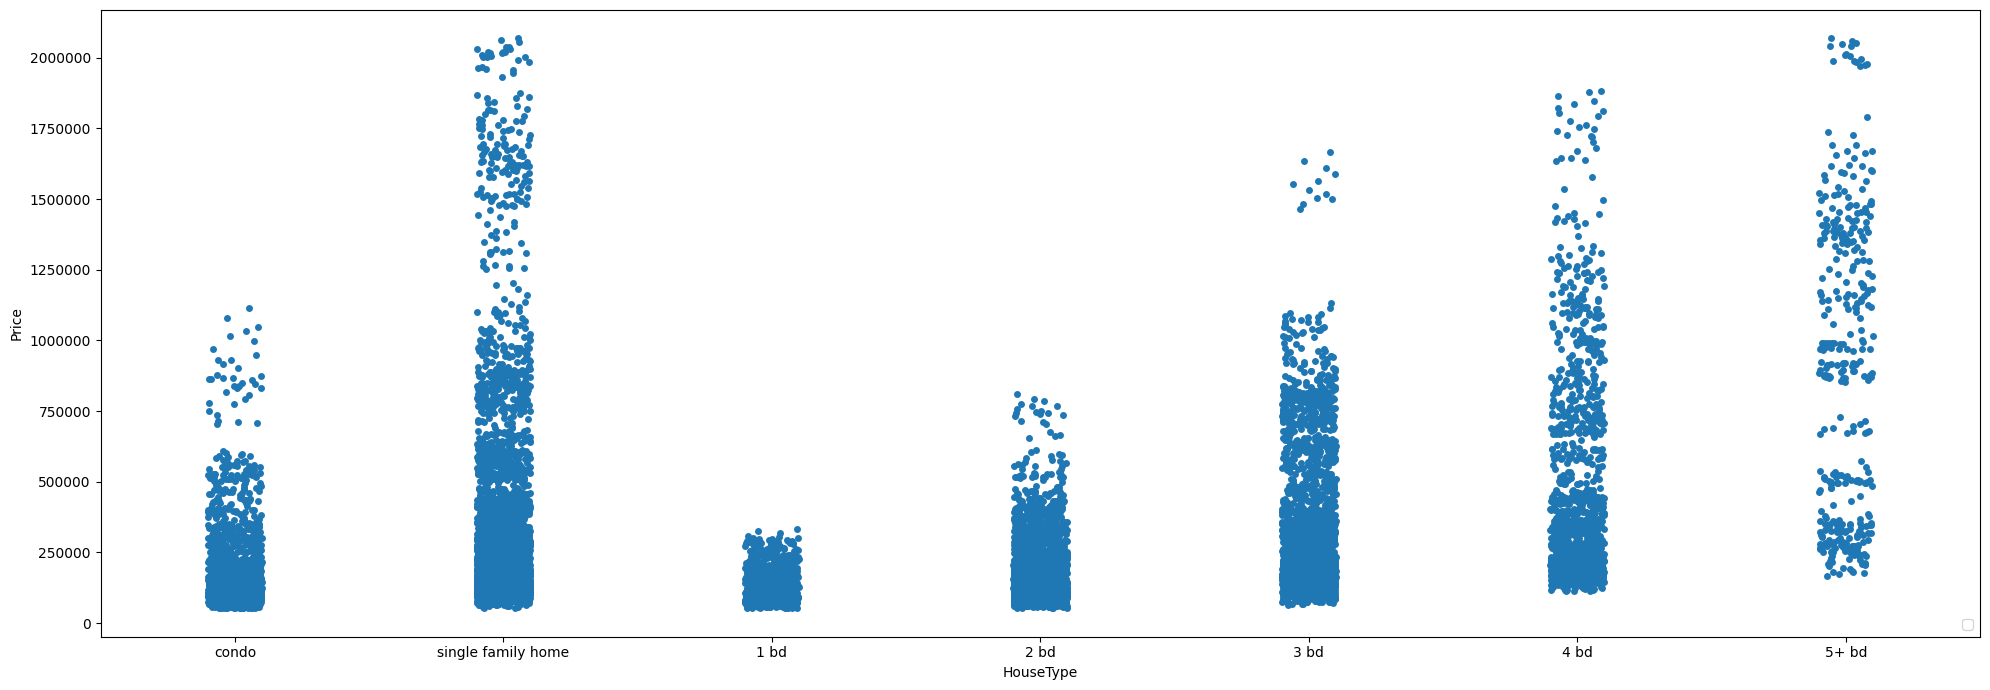

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2010\nOutliers Removed')

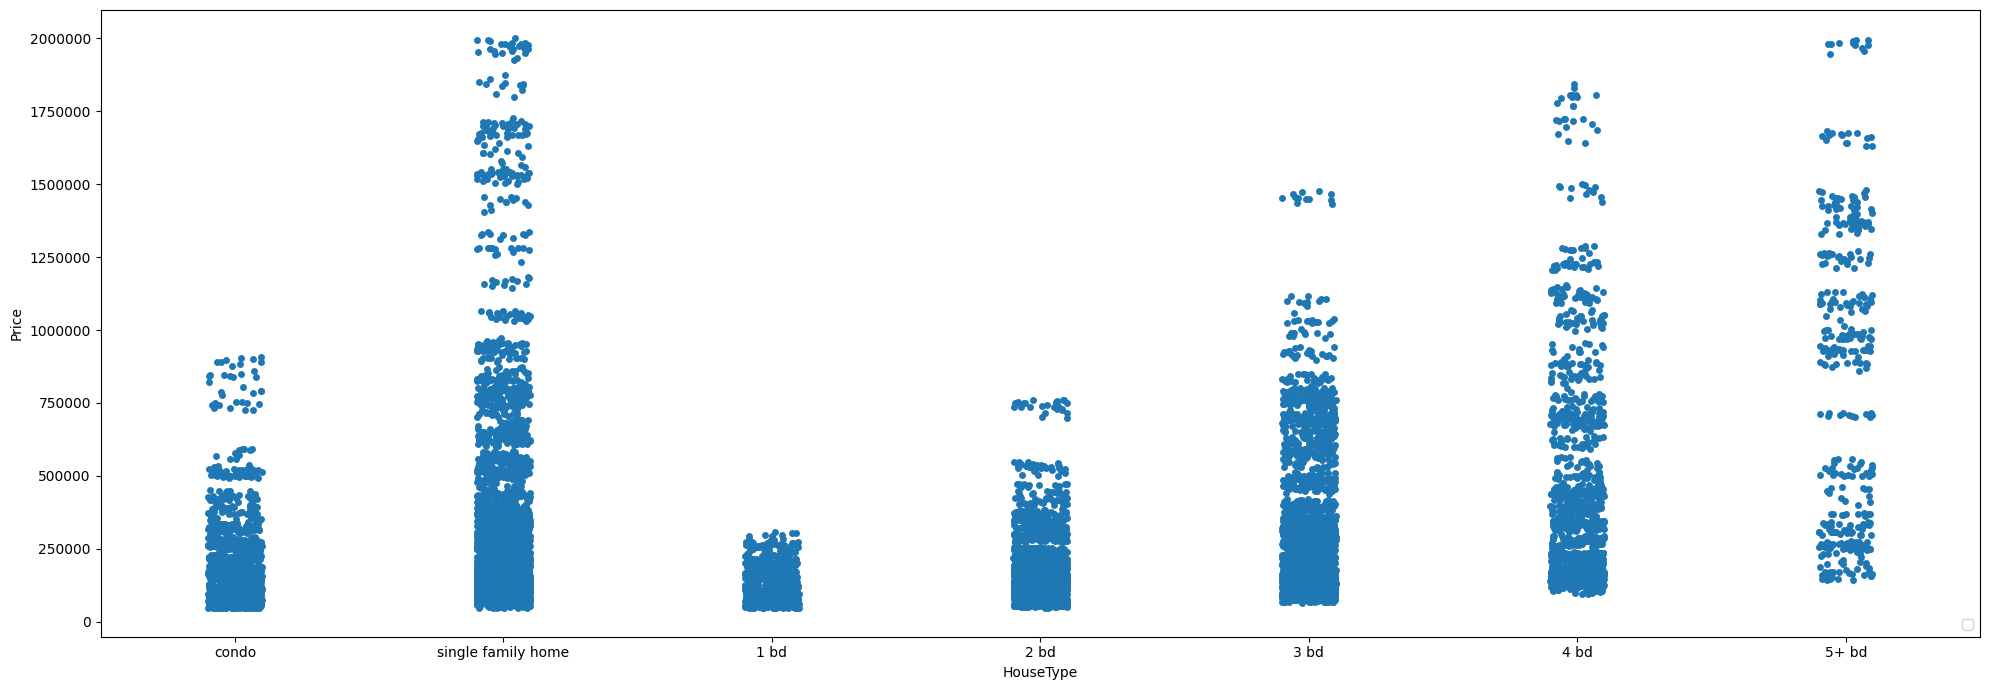

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2011\nOutliers Removed')

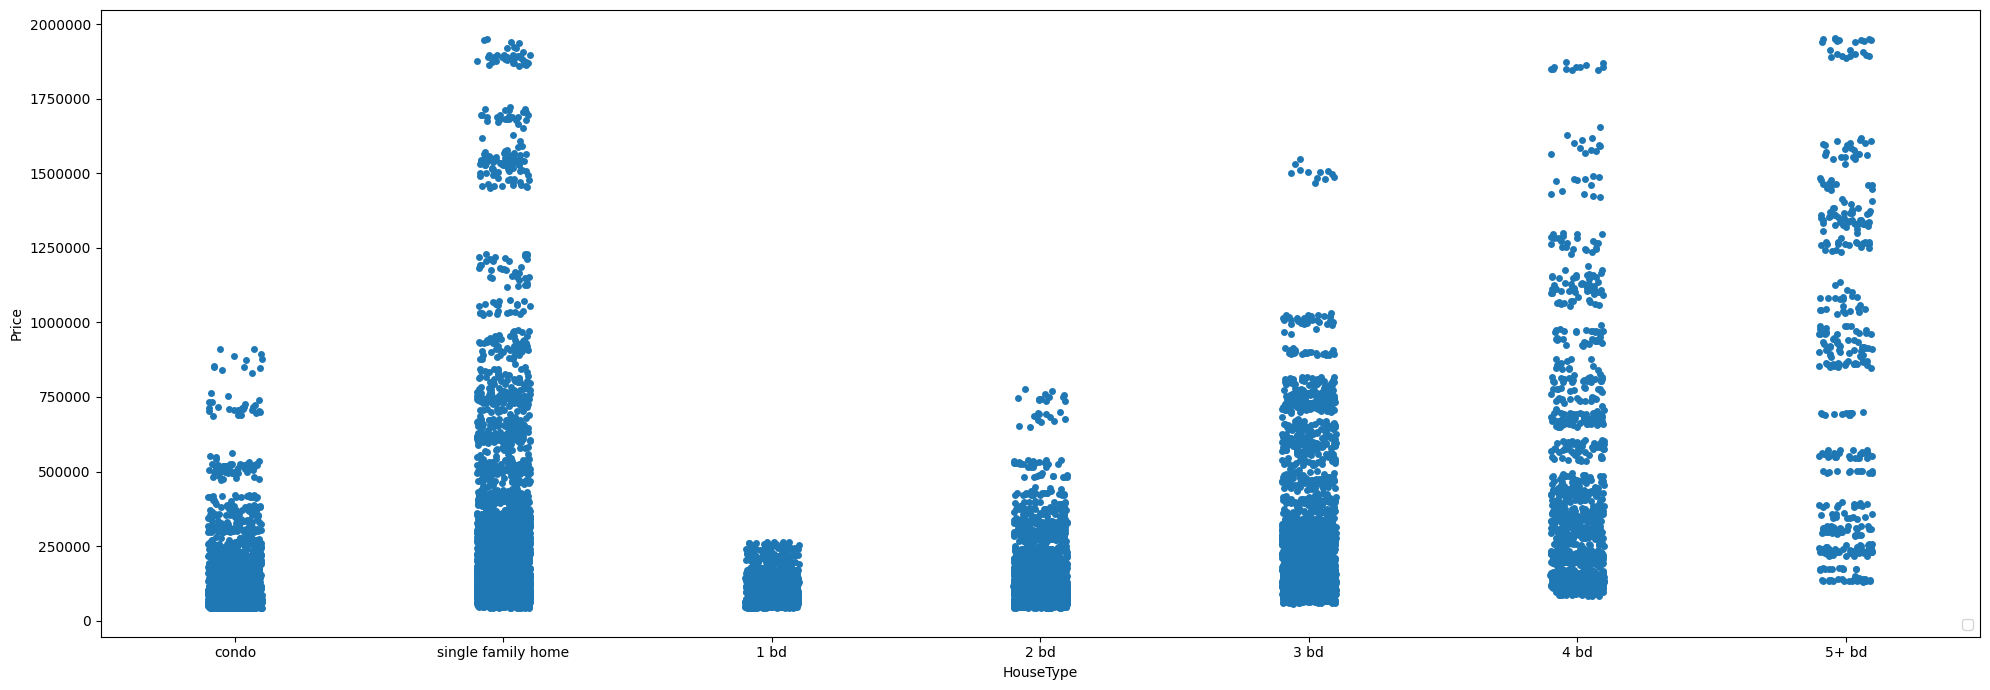

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2012\nOutliers Removed')

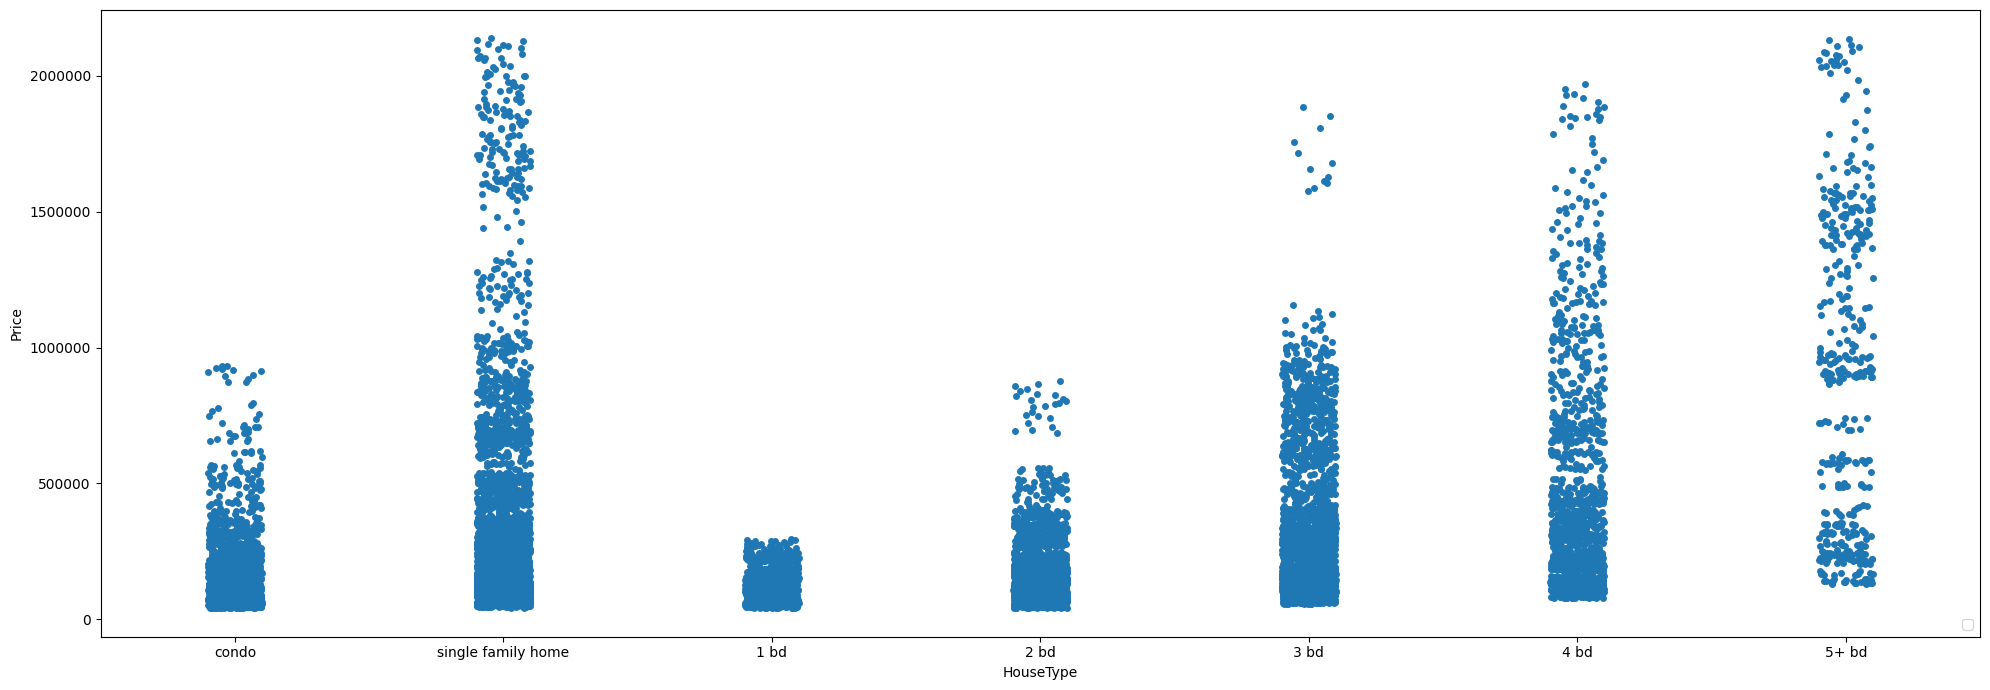

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2013\nOutliers Removed')

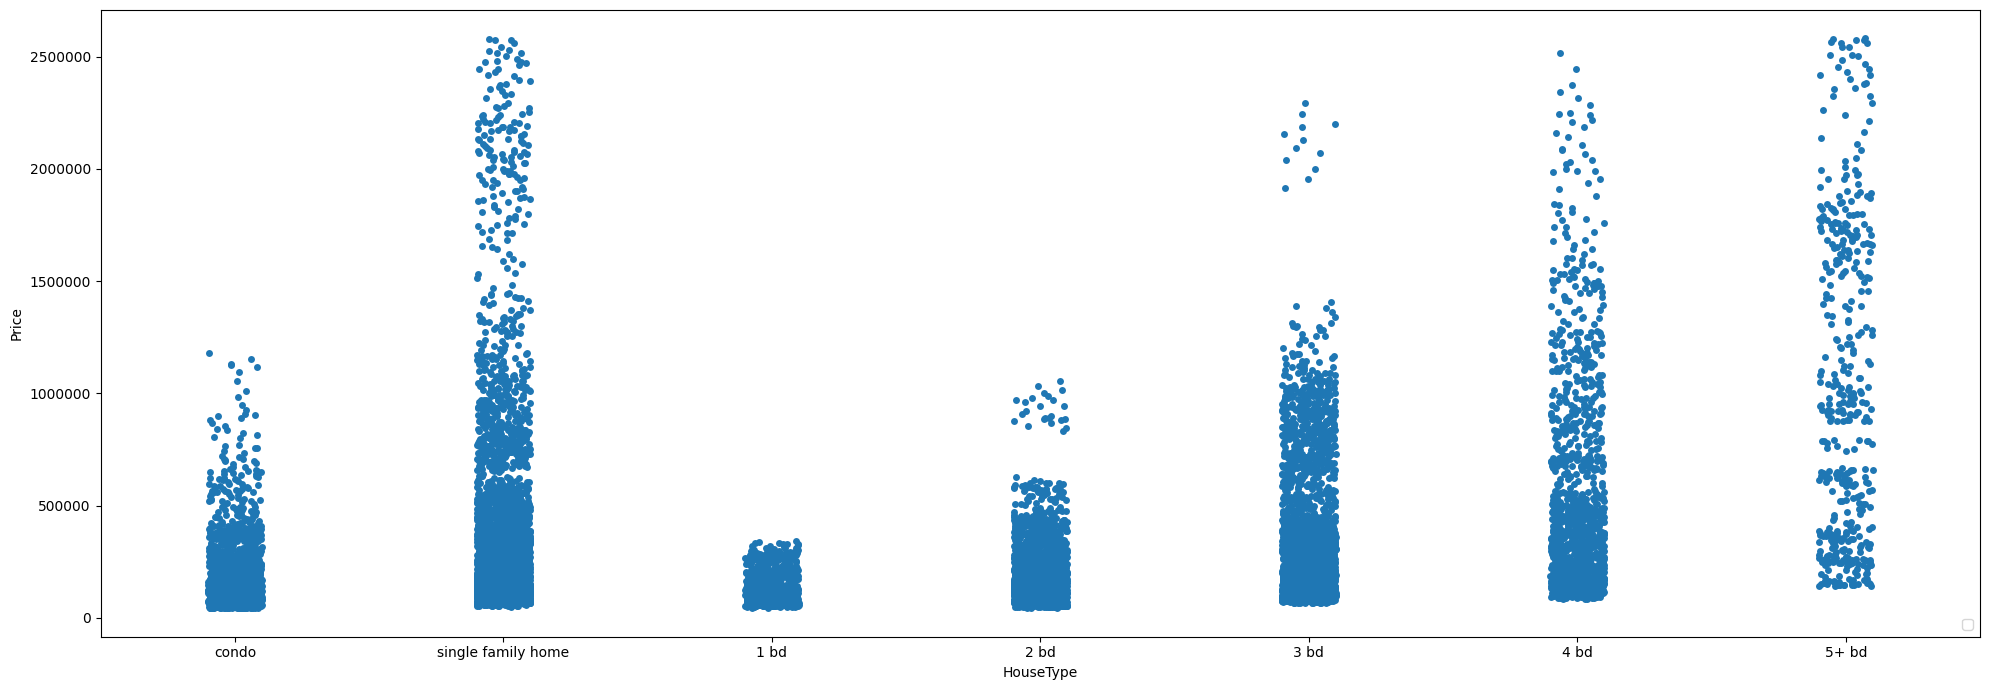

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2014\nOutliers Removed')

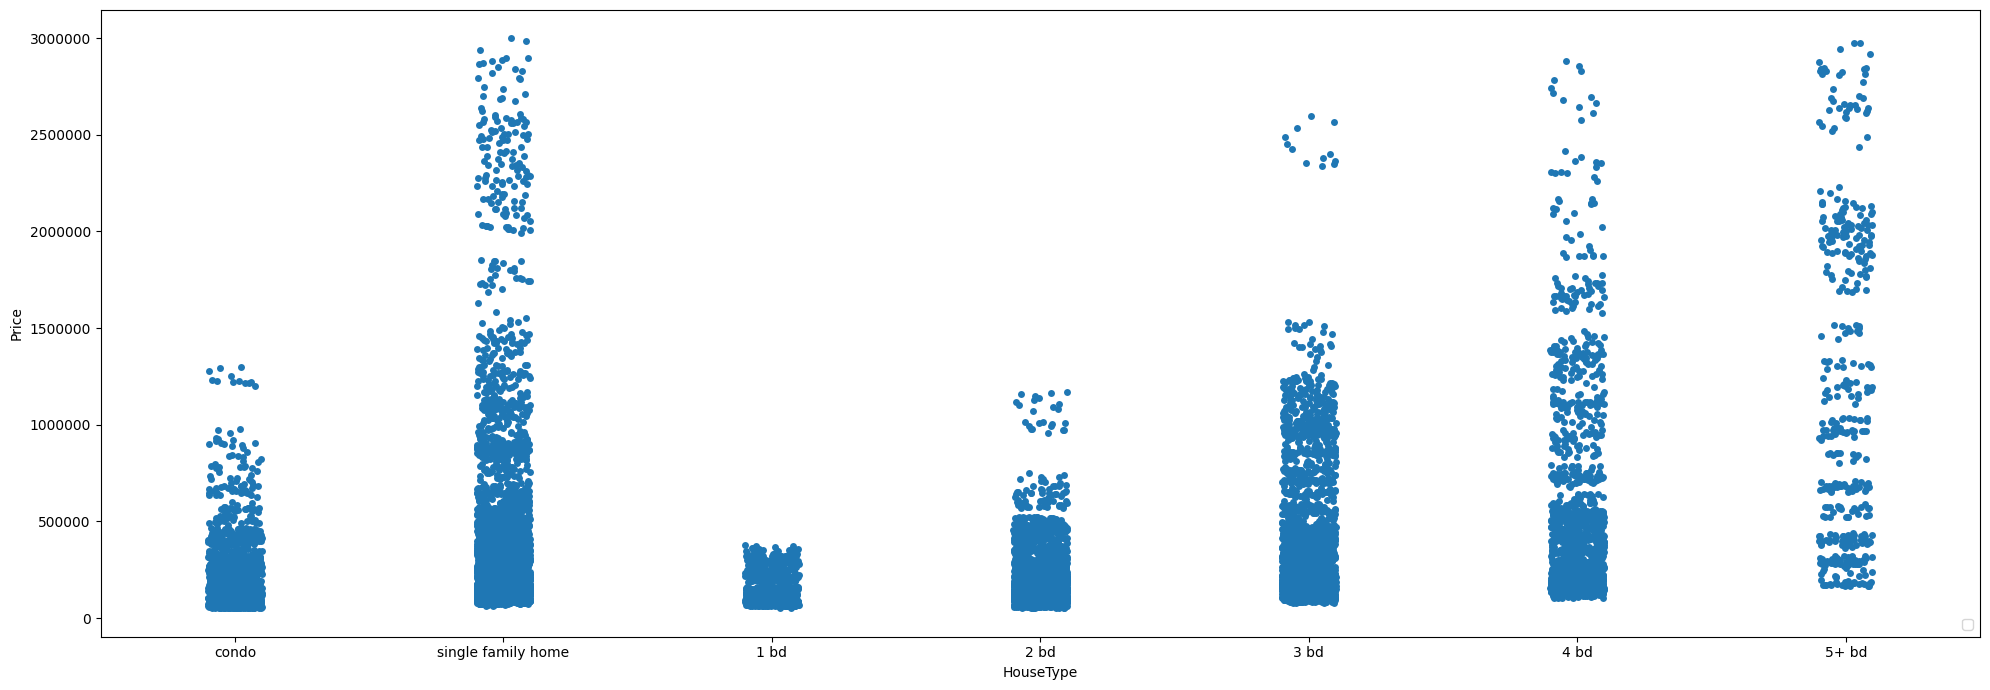

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2015\nOutliers Removed')

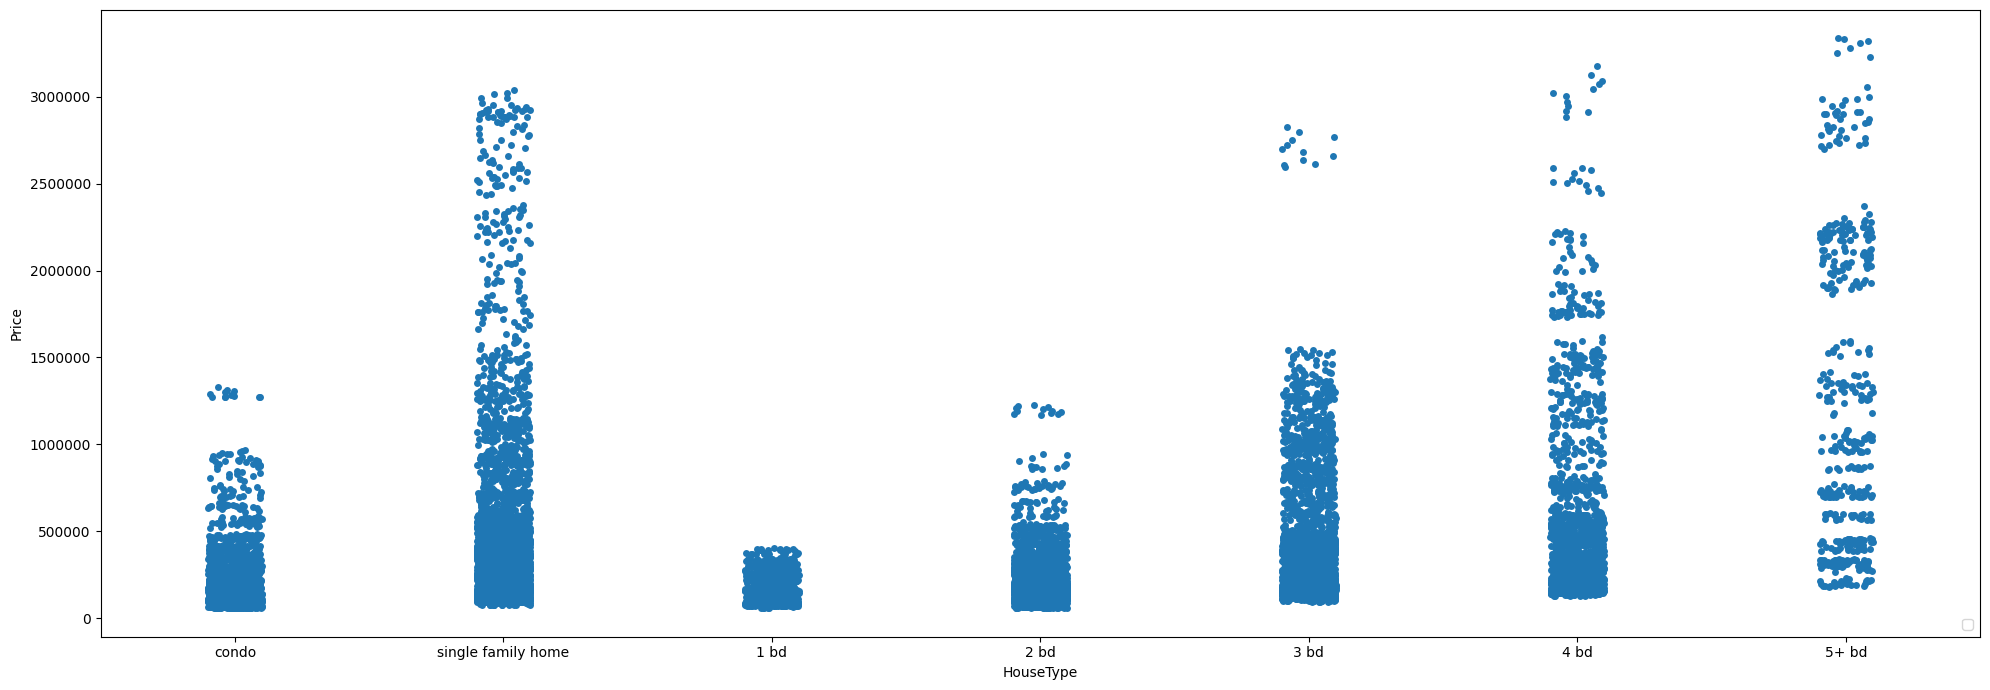

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2016\nOutliers Removed')

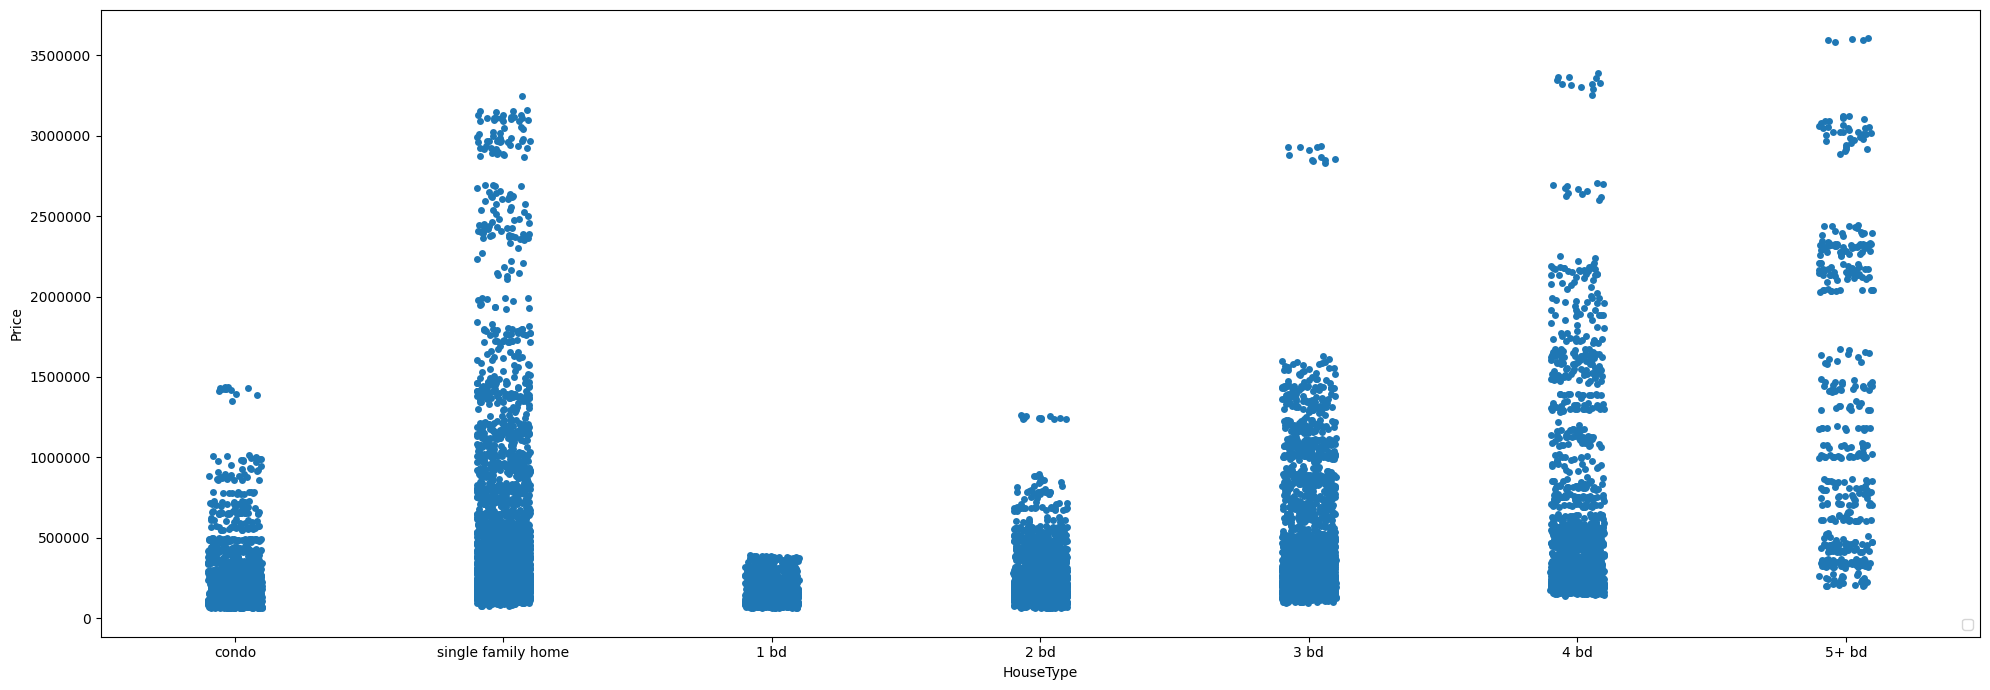

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2017\nOutliers Removed')

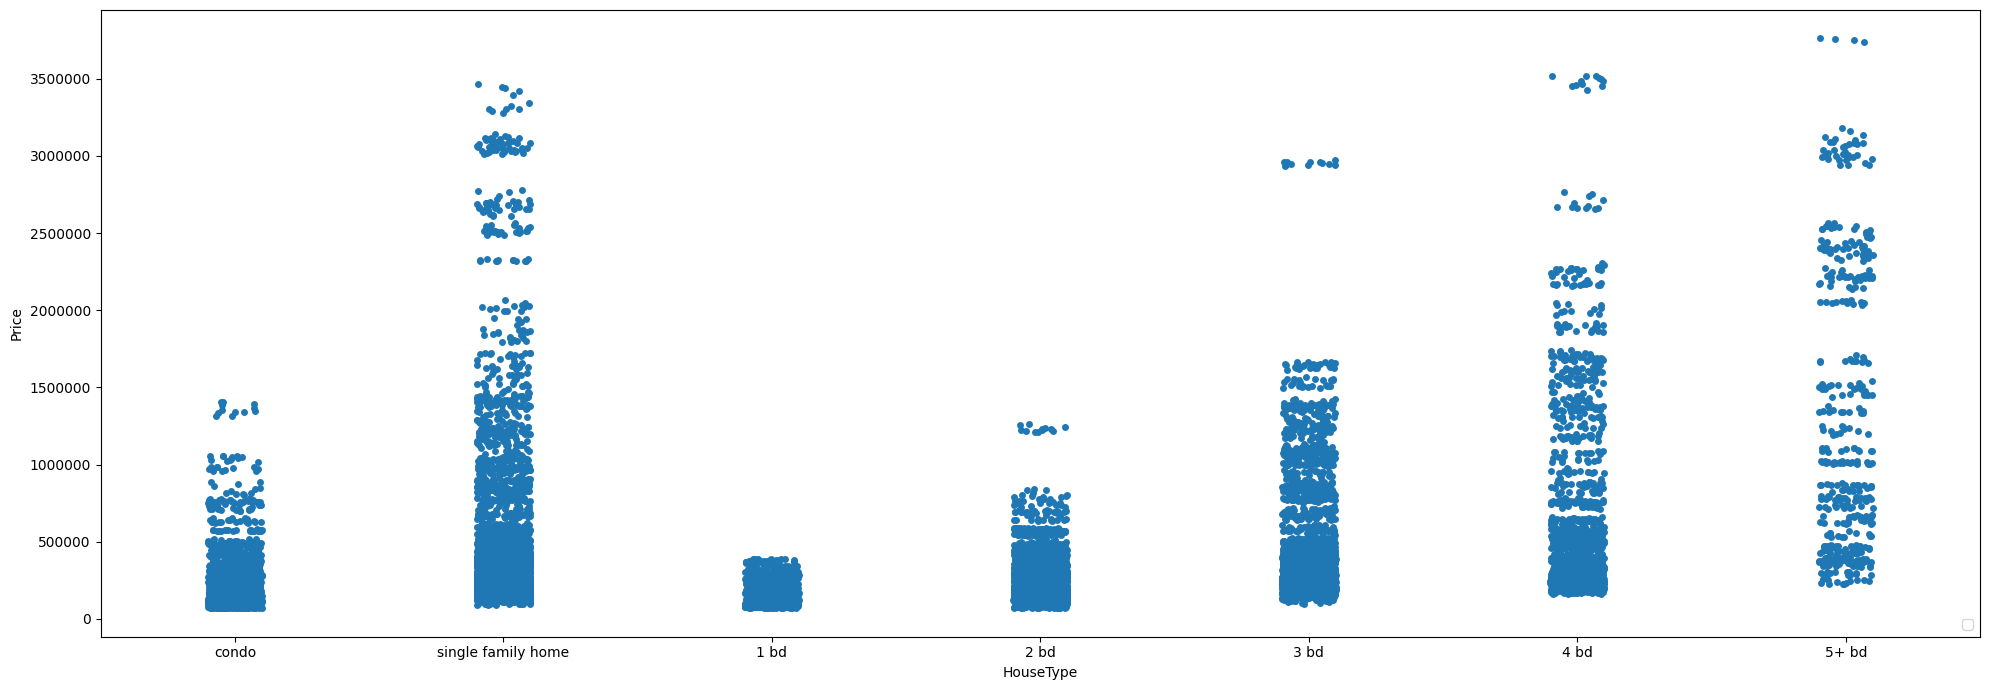

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2018\nOutliers Removed')

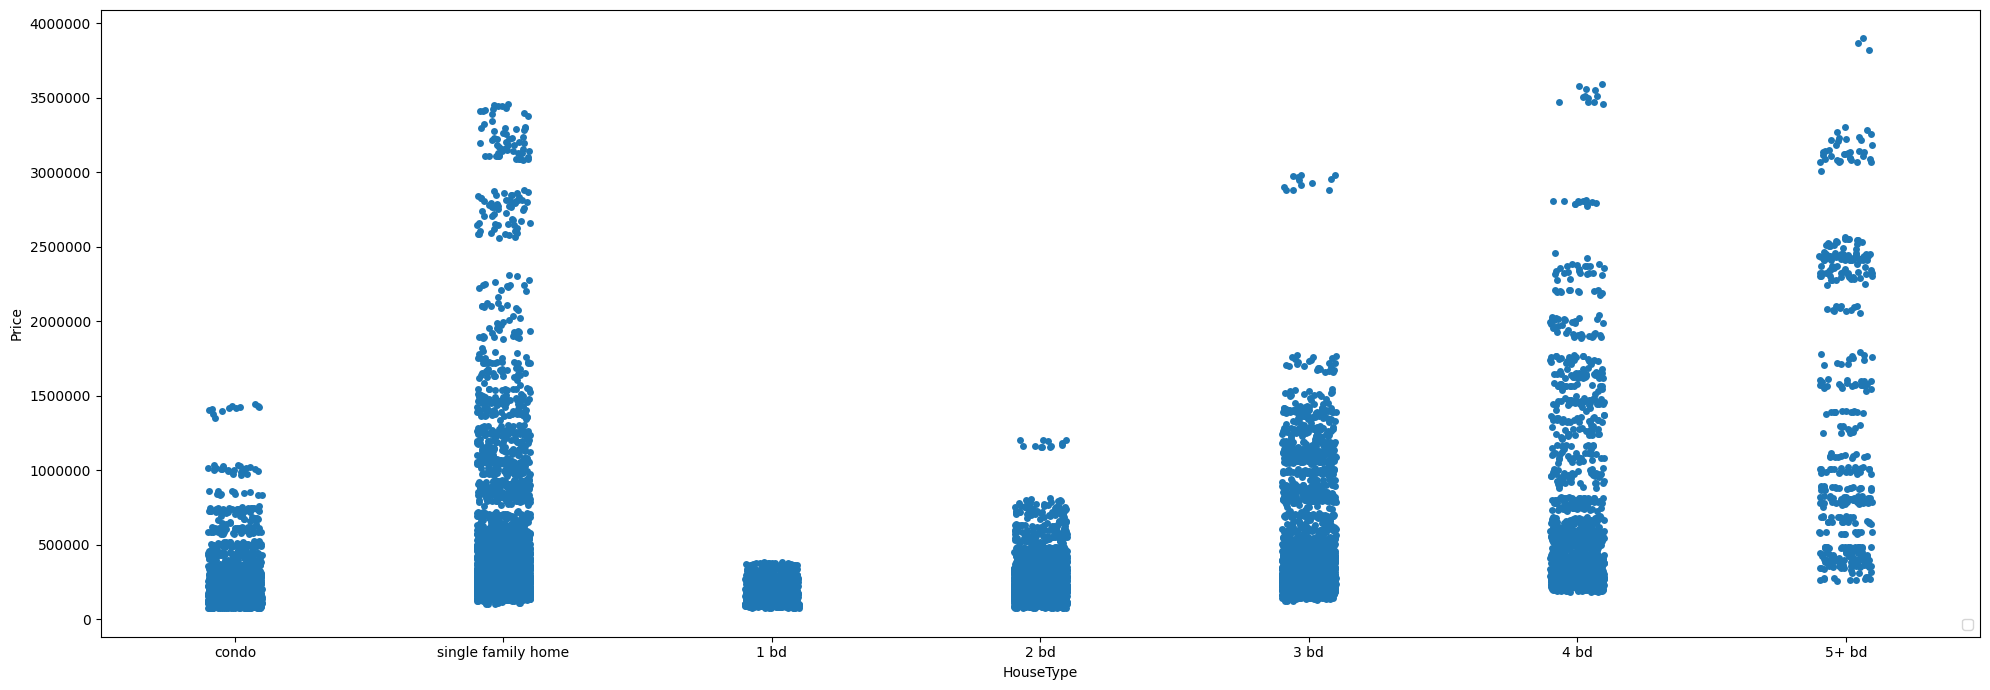

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2019\nOutliers Removed')

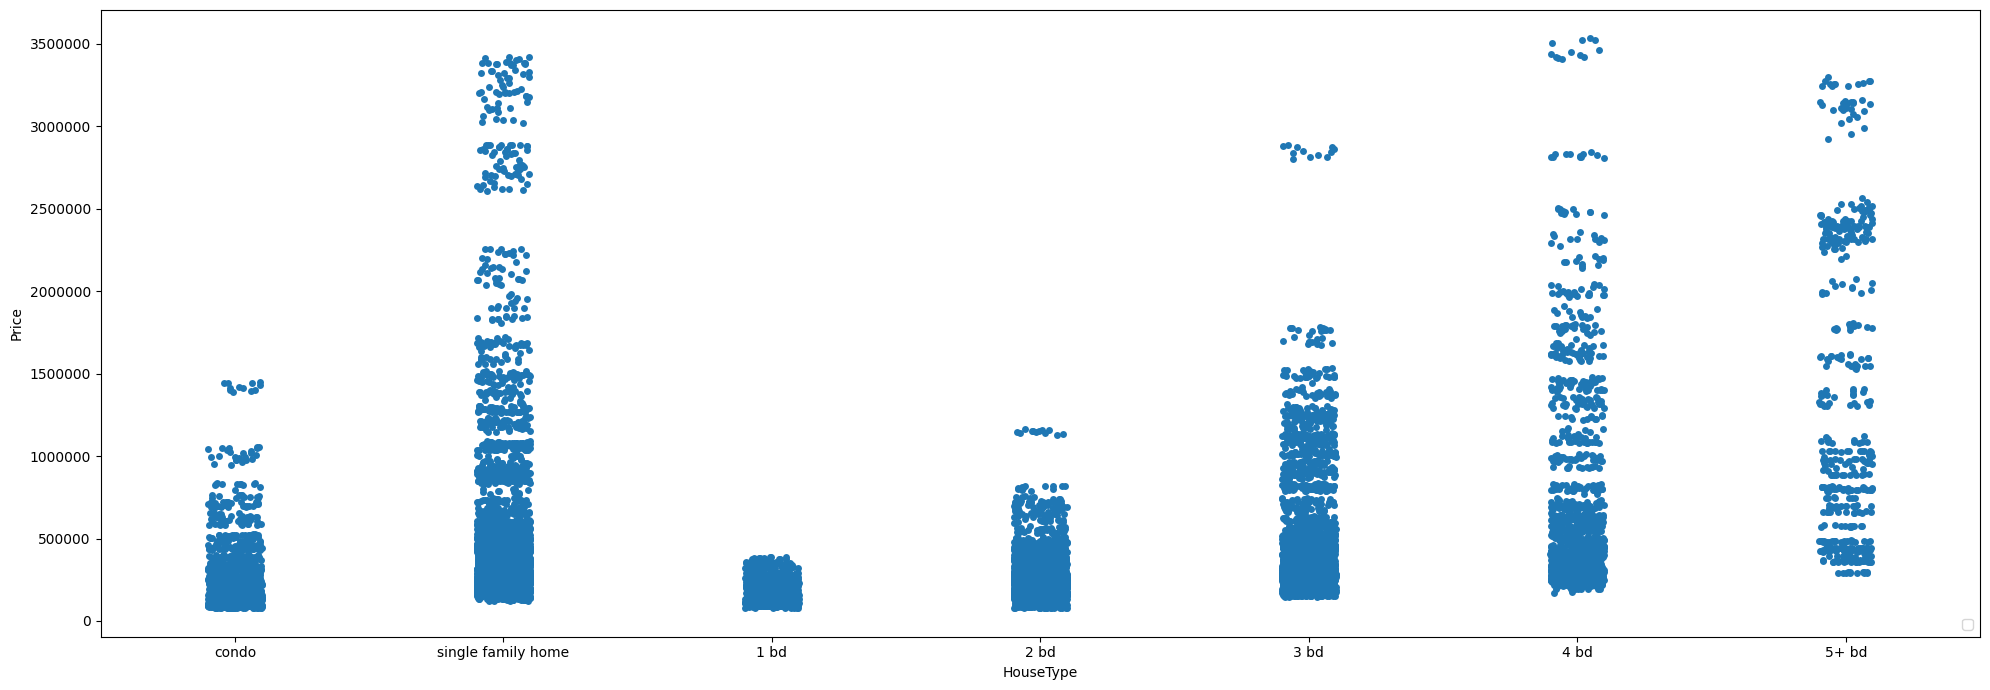

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2020\nOutliers Removed')

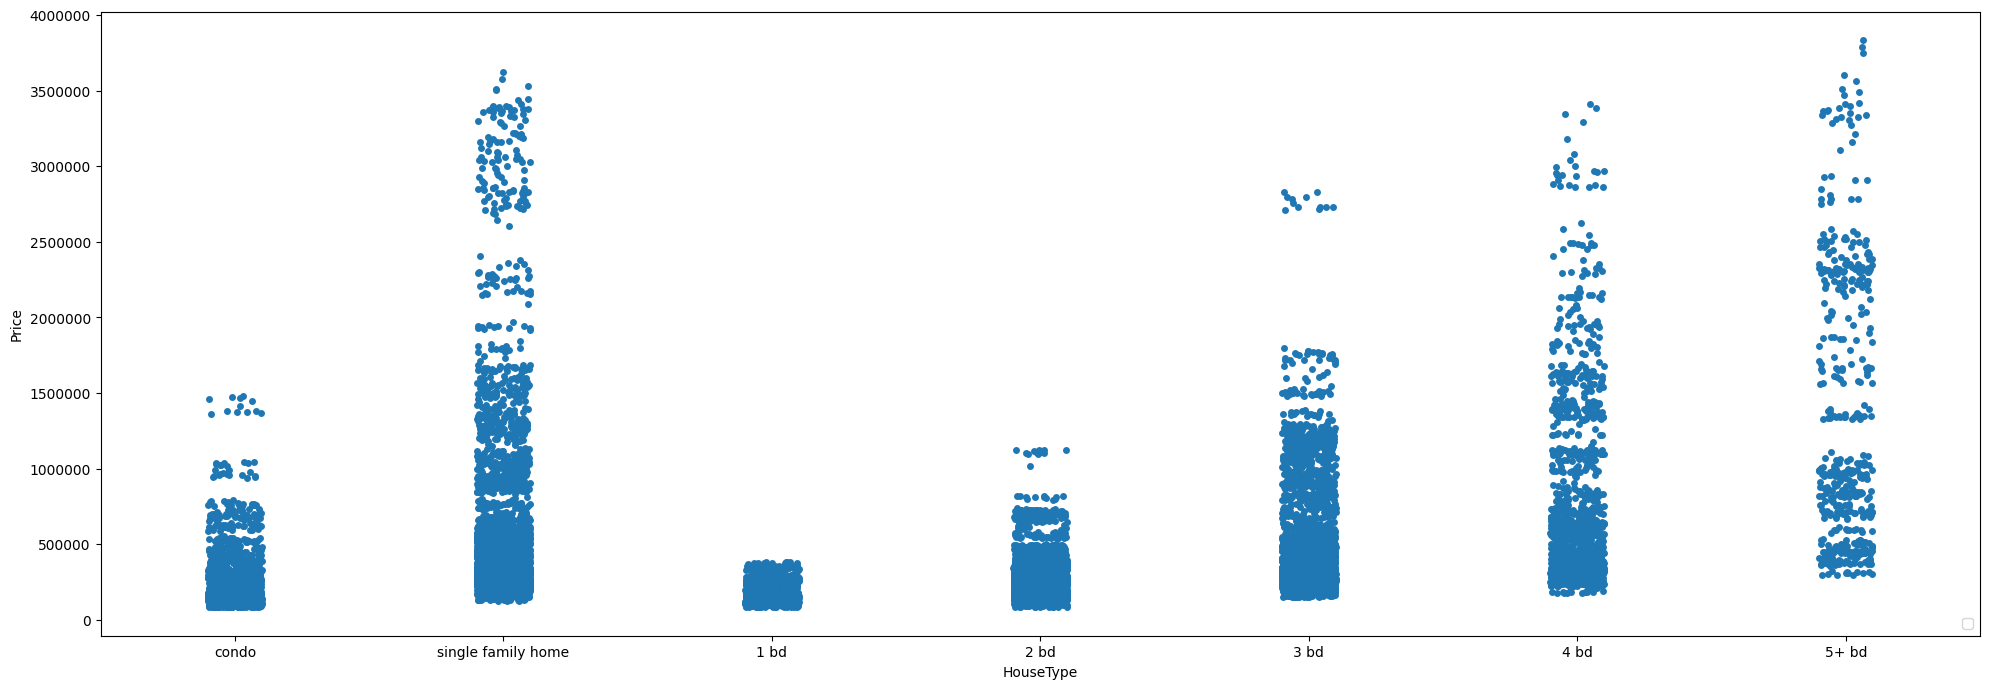

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2021\nOutliers Removed')

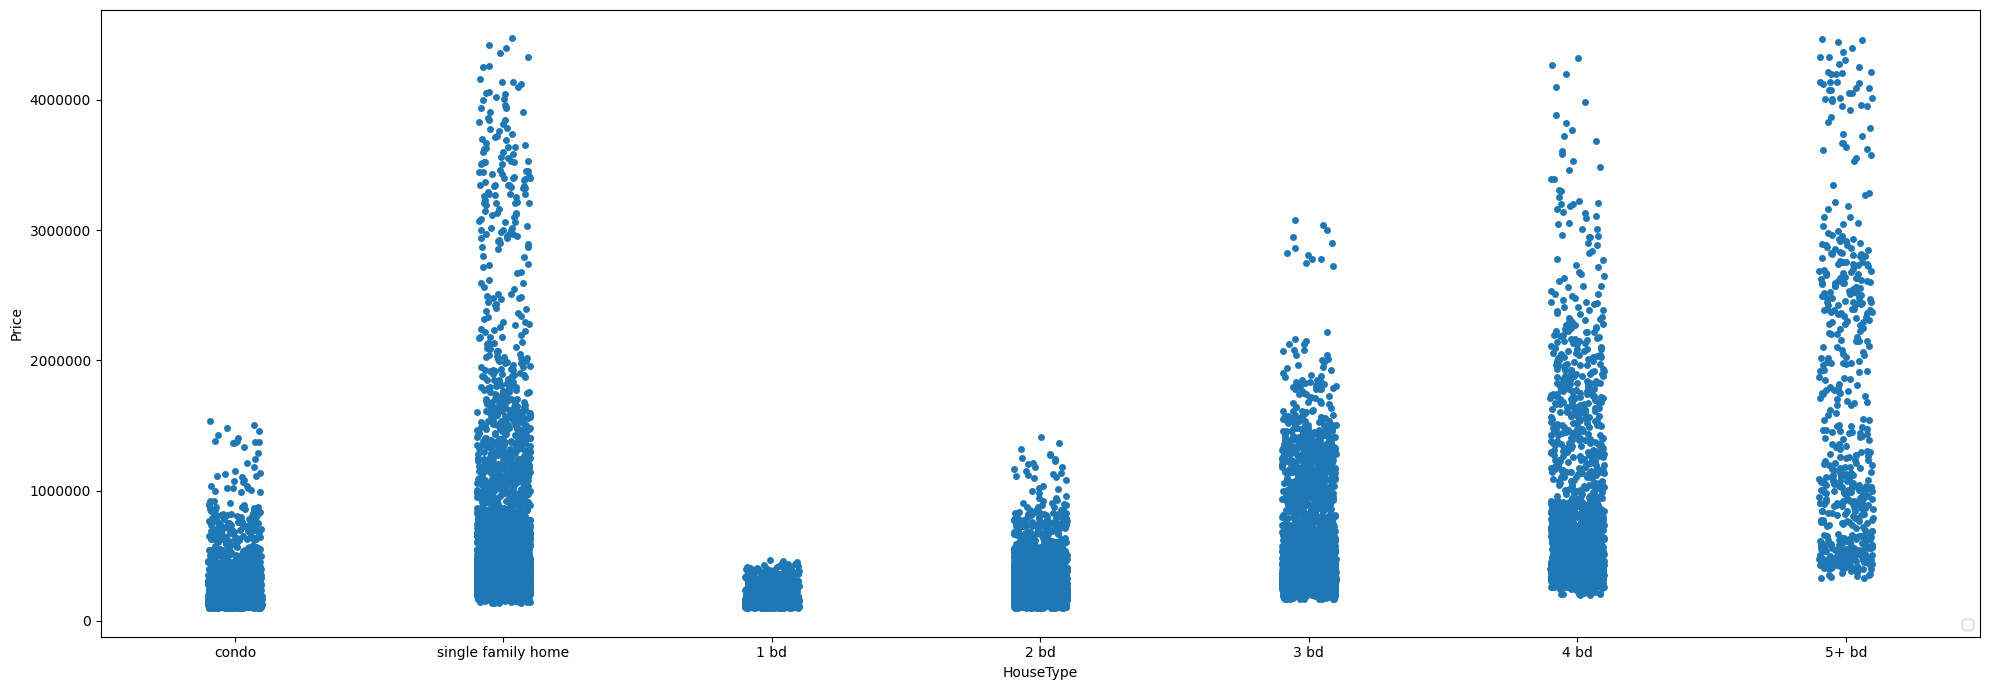

<AxesSubplot: xlabel='HouseType', ylabel='Price'>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Scatter Plot - 2022\nOutliers Removed')

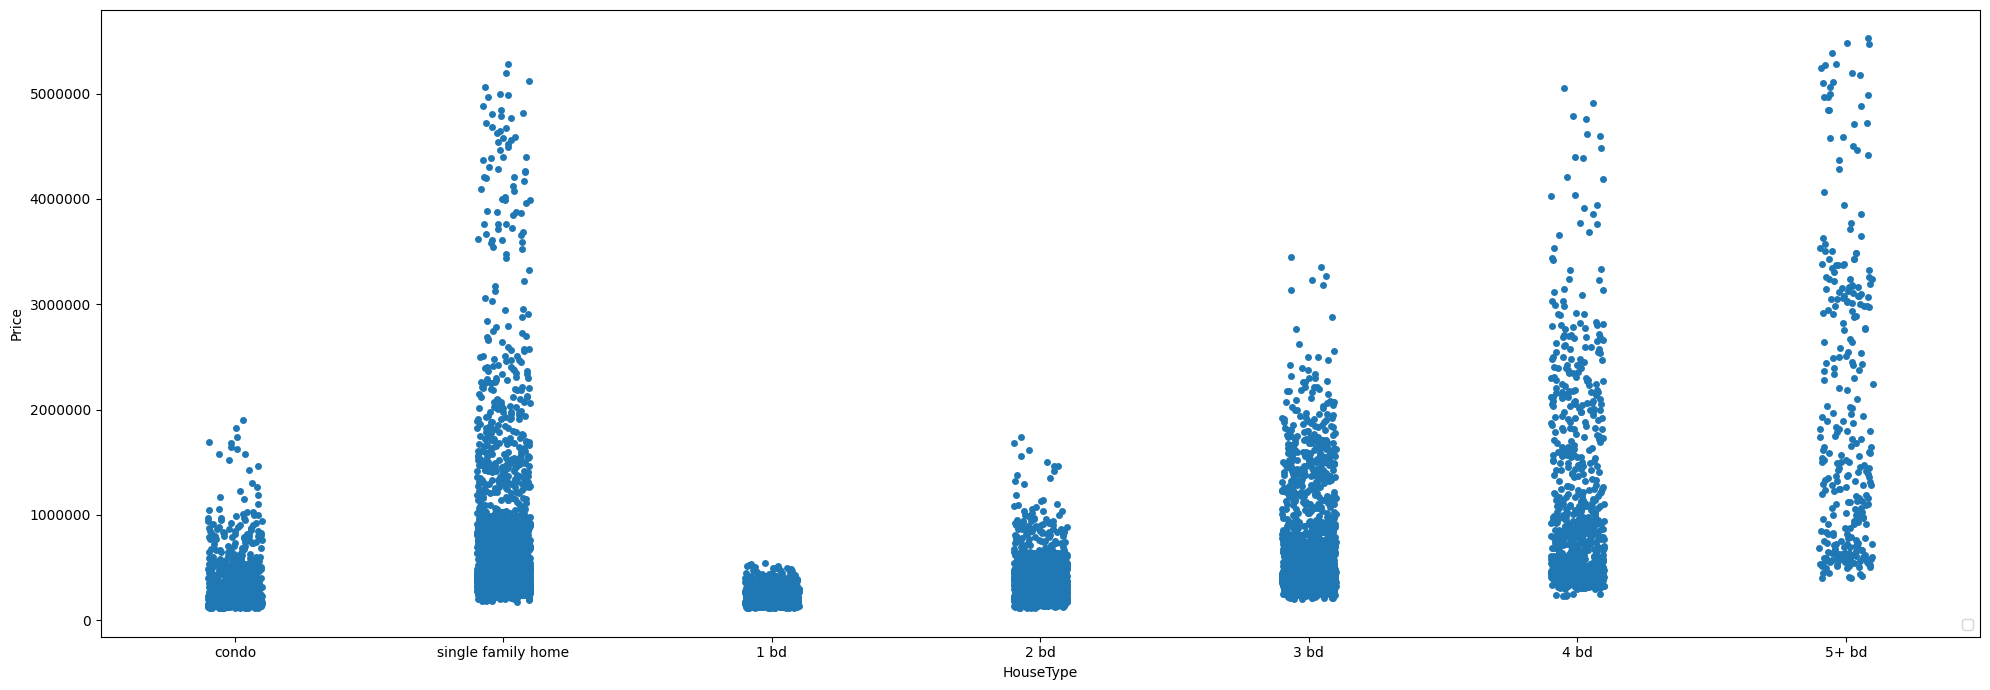

In [163]:
# Scatterplot per year, by house type
# NOTE: Not much value in plot compared to othrs
for year in years:
    house_price__cleaned_year_df = house_prices_df_melted_clean[house_prices_df_melted_clean.Year == year]
    
    # Draw Plot
    sns.stripplot(x="HouseType", y="Price", data=house_price__cleaned_year_df, legend=False)

    # Move the legend to an empty part of the plot
    plt.legend(loc='lower right')

    # Set Title
    axes.set_title(f'Scatter Plot - {year}\nOutliers Removed')
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

Text(0.5, 1.0, 'Line Plot- by Year\nOutliers Removed')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Price')

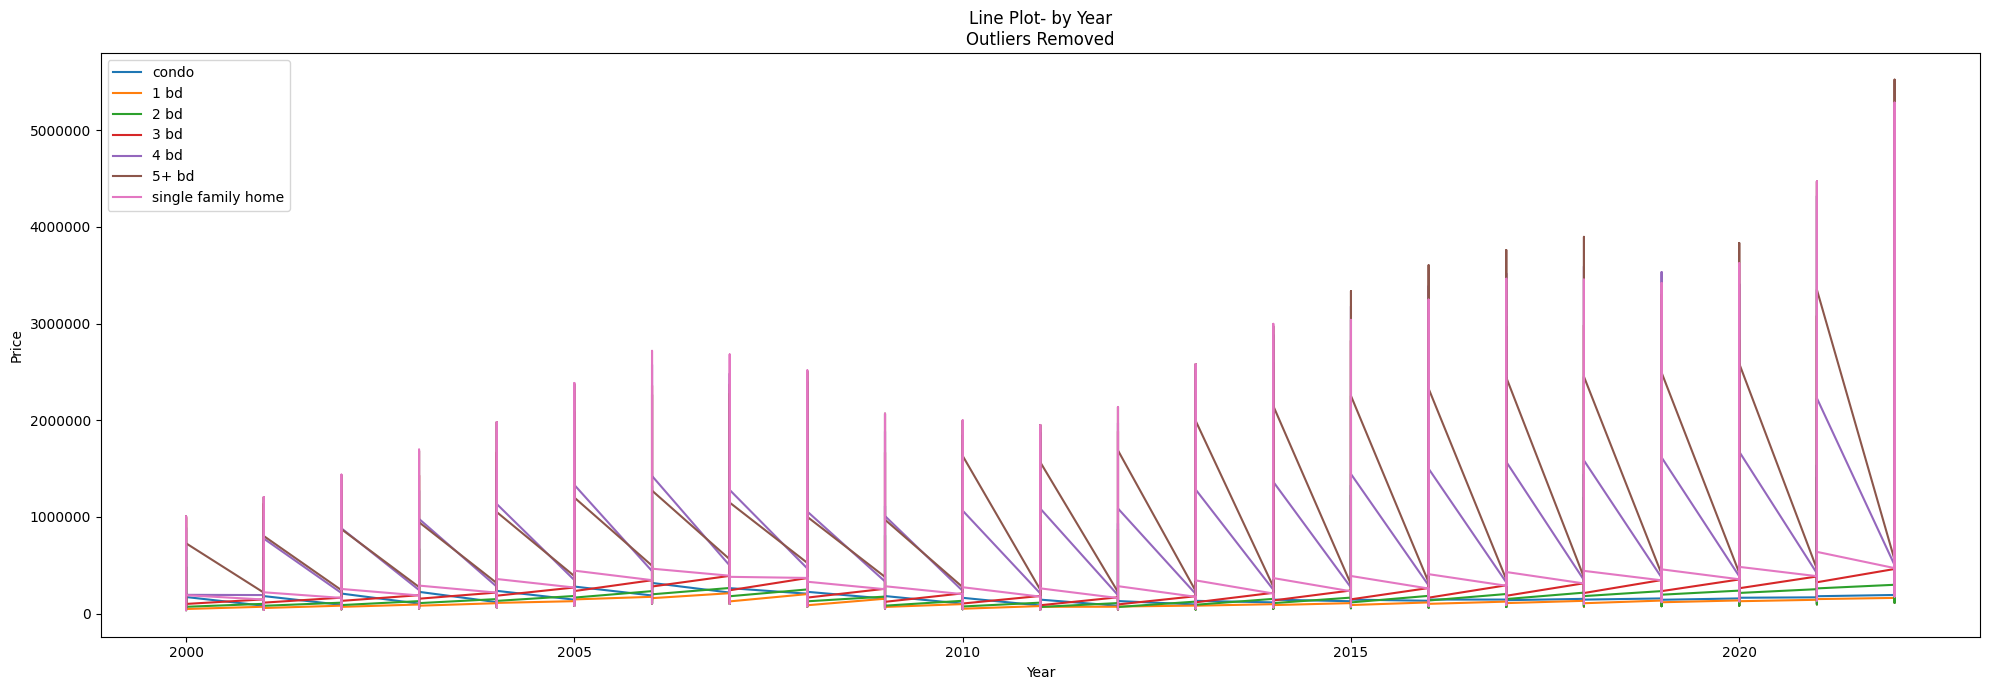

In [192]:
# Line plot house prices

# fig, axes = plt.subplots(1, figsize=(20,7), dpi= 80)

for housetype in houseTypes:
    house_price_cleaned_houseType_df = house_prices_df_melted_clean[house_prices_df_melted_clean.HouseType == housetype]
    
    # Draw Plot
    plt.plot(house_price_cleaned_houseType_df["Year"], house_price_cleaned_houseType_df["Price"], label=housetype)

plt.legend(loc='upper left')
plt.title(f'Line Plot- by Year\nOutliers Removed')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# # Early 2000s Recession
# ax.axvspan(date2num(datetime(2001,3,1)), date2num(datetime(2001,11,30)), 
#            label="Early 2000s Recession",color="grey", alpha=0.3)
# # Great Recession
# ax.axvspan(date2num(datetime(2007,12,1)), date2num(datetime(2009,6,30)), 
#            label="Great Recession",color="grey", alpha=0.3)
# # COVID-19 Recession
# ax.axvspan(date2num(datetime(2020,1,2)), date2num(datetime(2020,4,30)), 
#            label="COVID-19 Recession",color="grey", alpha=0.3)

# # Rotates and right aligns the x labels. 
# # Also moves the bottom of the axes up to make room for them.
# fig.autofmt_xdate()

<AxesSubplot: >

Text(0.5, 1.0, 'Housing Prices - Histogram')

Text(0.5, 0, 'Price')

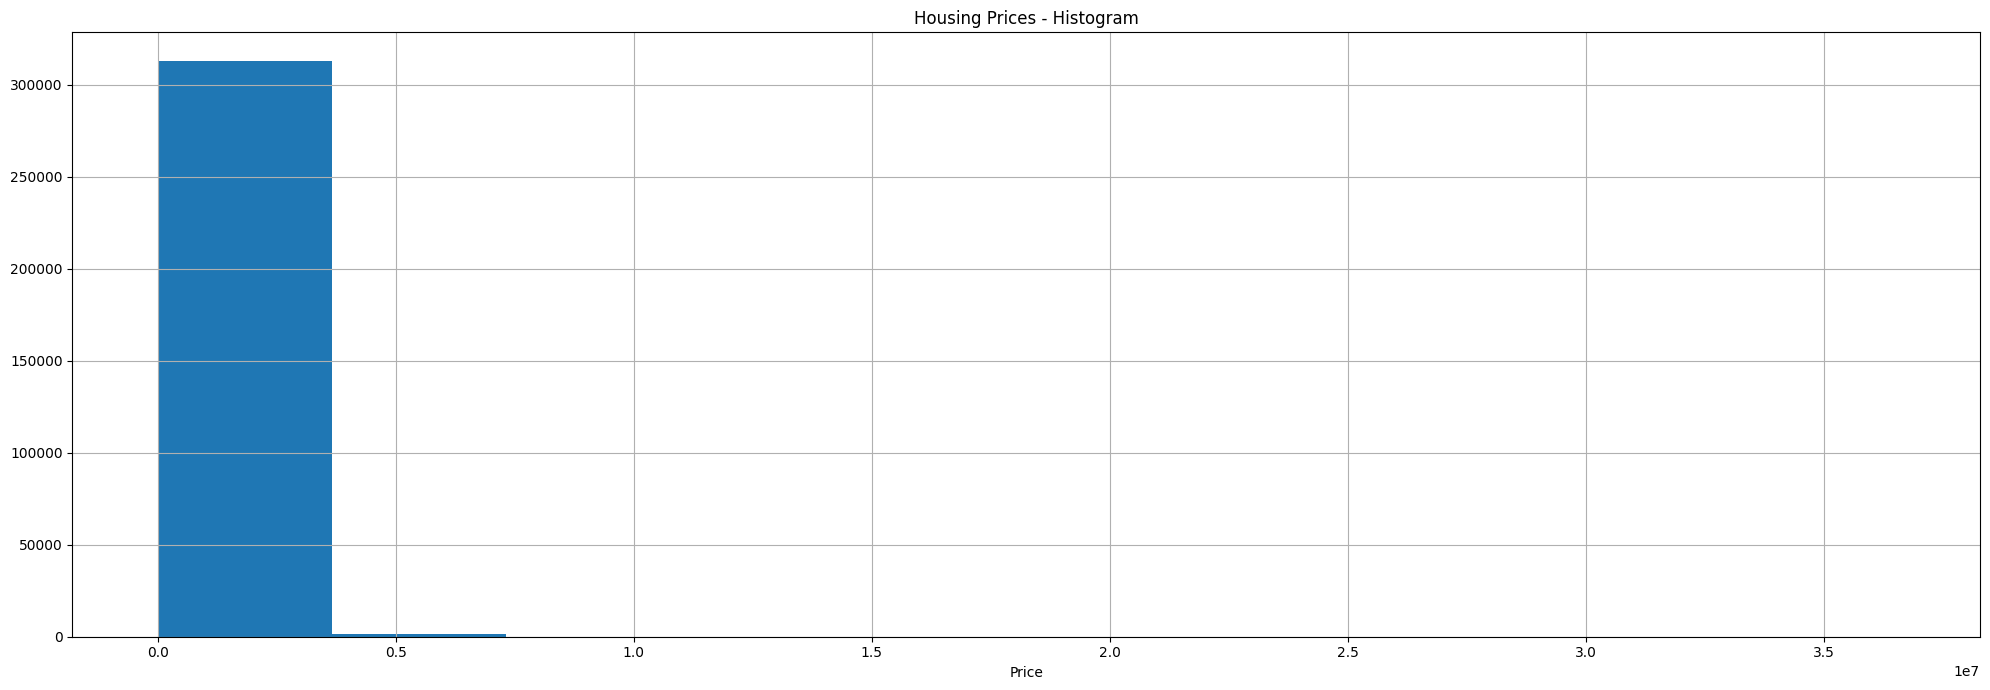

<AxesSubplot: >

Text(0.5, 1.0, 'Housing Prices - Histogram')

Text(0.5, 0, 'Price')

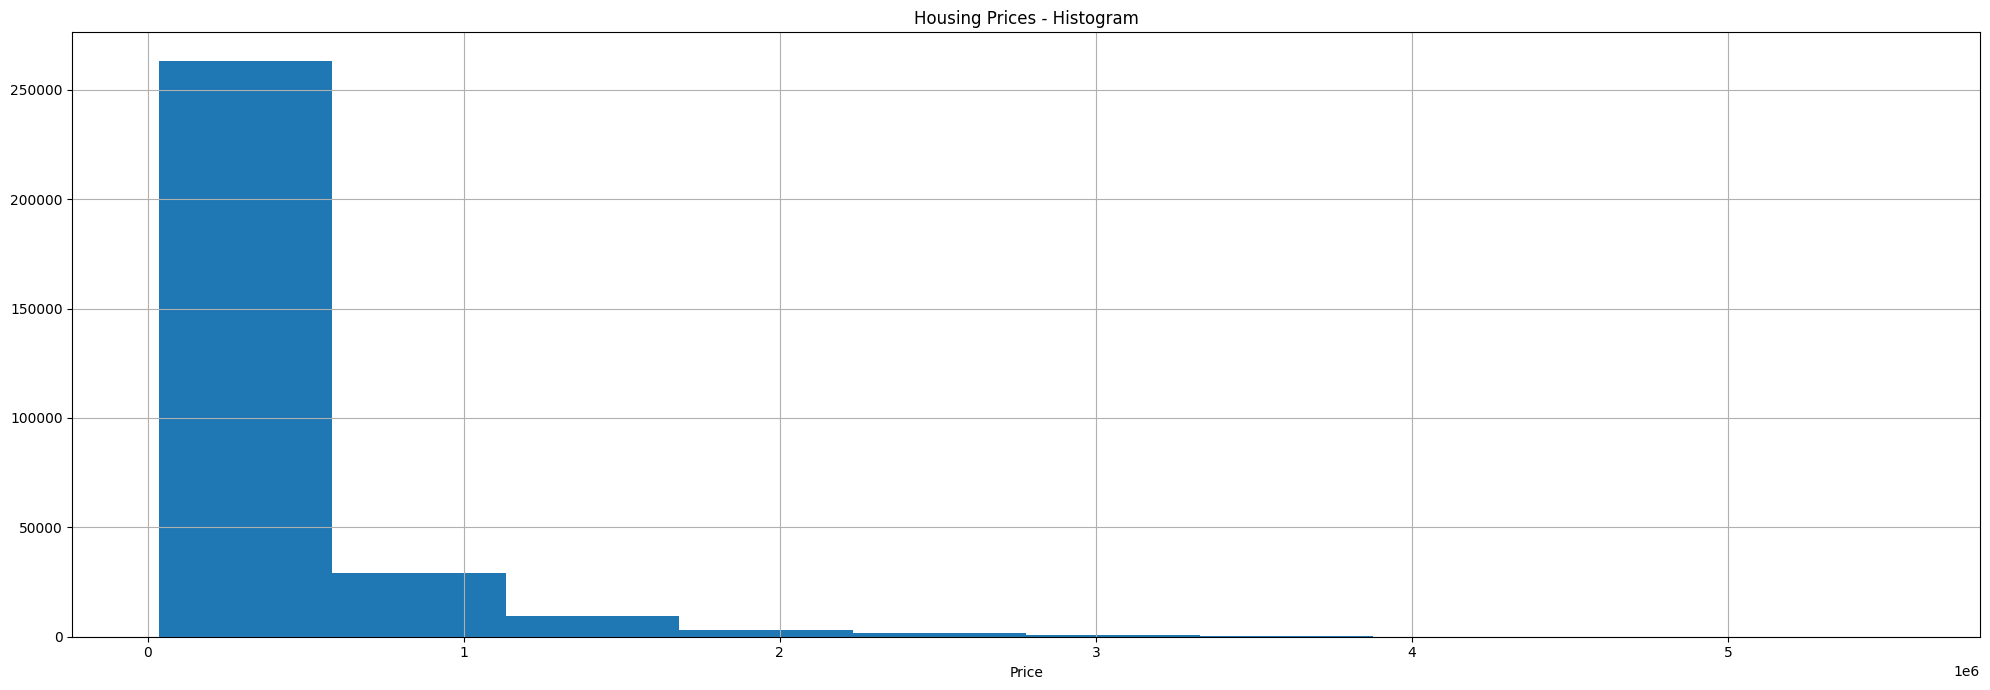

In [203]:
# Histogram of prices
house_prices_df_melted.Price.hist()
plt.title('Housing Prices - Histogram')
plt.xlabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Histogram of prices - no outliers
house_prices_df_melted_clean.Price.hist()
plt.title('Housing Prices - Histogram')
plt.xlabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

<AxesSubplot: >

Text(0.5, 1.0, 'Housing Prices - Histogram')

Text(0.5, 0, 'Price')

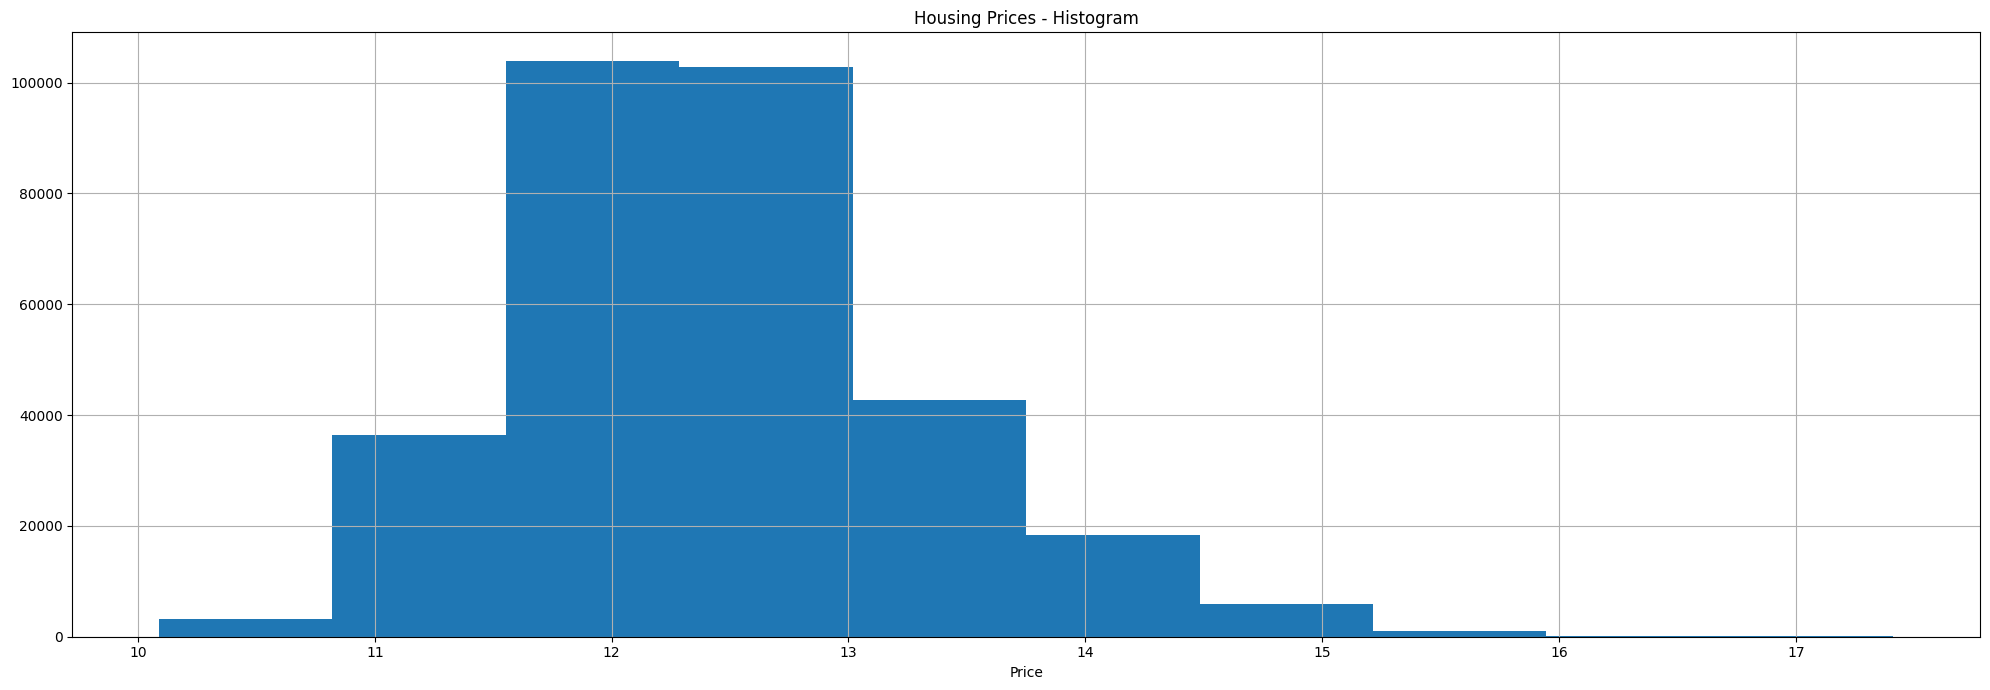

<AxesSubplot: >

Text(0.5, 1.0, 'Housing Prices - Histogram')

Text(0.5, 0, 'Price')

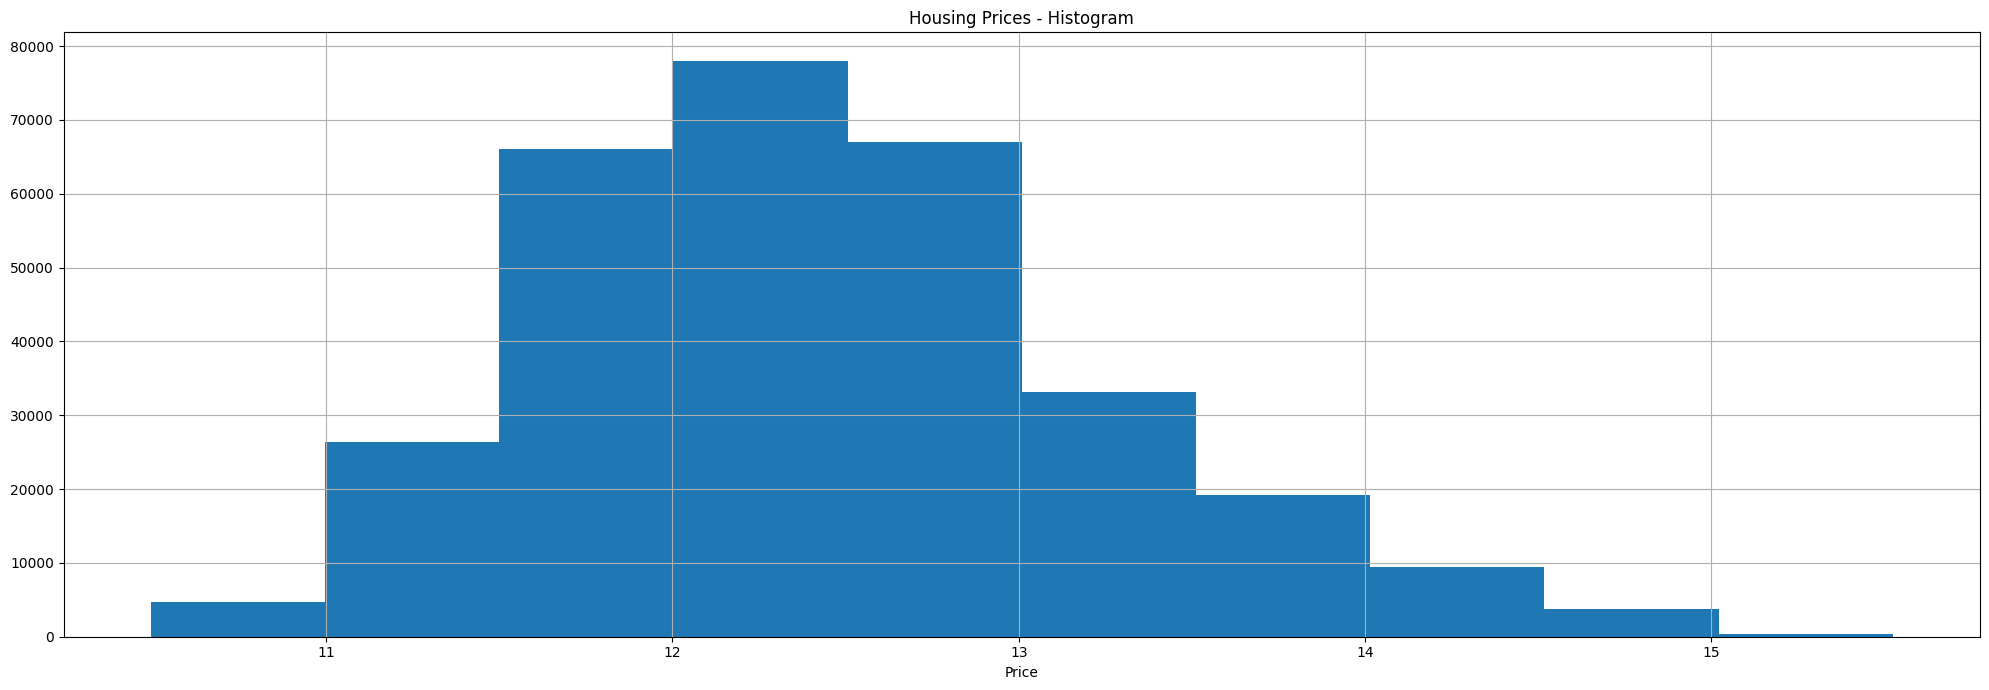

In [204]:
# Histogram of prices - log
log_prices = log(house_prices_df_melted.Price)
log_prices.hist()
plt.title('Housing Prices - Histogram')
plt.xlabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Histogram of prices - log - no outliers
log_prices = log(house_prices_df_melted_clean.Price)
log_prices.hist()
plt.title('Housing Prices - Histogram')
plt.xlabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()